In [1]:
import random
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from state_pred_models import NextStateQuantileNetwork, quantile_loss, get_mid_quantile


Graph of number of values below the different quantiles graph and calculation functions


In [2]:
def plot_nb_below_quantiles(prob, nb_belowq1_list, nb_belowq2_list, nb_belowq3_list, nb_belowq4_list, nb_belowq5_list, nb_belowq6_list, nb_belowq7_list, nb_belowq8_list, nb_belowq9_list, nb_belowq10_list, variable):
    
    var = variable
    
    if variable == "theta":
        variable = r"$\theta$"
    if variable == "omega":
        variable = r"$\omega$"
    if variable == "costheta":
        variable = r"$\cos(\theta)$"
    if variable == "sintheta":
        variable = r"$\sin(\theta)$"
    if variable == "costheta1":
        variable = r"$\cos(\theta_1)$"
    if variable == "sintheta1":
        variable = r"$\sin(\theta_1)$"
    if variable == "costheta2":
        variable = r"$\cos(\theta_2)$"
    if variable == "sintheta2":
        variable = r"$\sin(\theta_2)$"
    if variable == "omega1":
        variable = r"$\omega_1$"
    if variable == "omega2":
        variable = r"$\omega_2$"
    if variable == "omegax":
        variable = r"$\omega_x$"
    if variable == "omegay":
        variable = r"$\omega_y$"
    if variable == "xdist":
        variable = r"$x_{dist}$"
    if variable == "ydist":
        variable = r"$y_{dist}$"
    if variable == "right contact":
        variable = r"$RL$"
    if variable == "left contact":
        variable = r"$LL$"
    if variable == "vx":
        variable = r"$v_x$"
    if variable == "vy":
        variable = r"$v_y$"
    if variable == "vz":
        variable = r"$v_z$"
    if variable == "cos1":
        variable = r"$\cos(\theta_1)$"
    if variable == "sin1":
        variable = r"$\sin(\theta_1)$"
    if variable == "cos2":
        variable = r"$\cos(\theta_2)$"
    if variable == "sin2":
        variable = r"$\sin(\theta_2)$" 
        
    plt.figure(1)
    plt.plot(nb_belowq1_list, label=f'Q1_{variable}', color='red')
    plt.plot(nb_belowq2_list, label=f'Q2_{variable}', color='blue')
    plt.plot(nb_belowq3_list, label=f'Q3_{variable}', color='green')
    plt.plot(nb_belowq4_list, label=f'Q4_{variable}', color='magenta')
    plt.plot(nb_belowq5_list, label=f'Q5_{variable}', color='aqua')
    plt.plot(nb_belowq6_list, label=f'Q6_{variable}', color='limegreen')
    plt.plot(nb_belowq7_list, label=f'Q7_{variable}', color='purple')
    plt.plot(nb_belowq8_list, label=f'Q8_{variable}', color='deeppink')
    plt.plot(nb_belowq9_list, label=f'Q9_{variable}', color='orange')
    plt.plot(nb_belowq10_list, label=f'Q10_{variable}', color='olive')
    plt.hlines(0.1, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile1'
    plt.hlines(0.2, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile2'
    plt.hlines(0.3, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile3'
    plt.hlines(0.4, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile4'
    plt.hlines(0.5, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile5'
    plt.hlines(0.6, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile6'
    plt.hlines(0.7, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile7'
    plt.hlines(0.8, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile8'
    plt.hlines(0.9, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile9'
    plt.hlines(1.0, 0, len(nb_belowq1_list), colors='black', linestyles='dashed') # , label='quantile10'
    plt.xlabel('Number of steps')
    plt.ylabel(f'Percentage of steps with env \n prediction below quantile {variable} prediction')
    plt.legend(bbox_to_anchor=(1.05, 1))
    
    plt.savefig(f'Graphs/{prob}_quantile_{var}_below_test.png', bbox_inches='tight')

    

In [3]:
def nb_below_quantile(env, quantile0, quantile1, quantile2, quantile3, quantile4, quantile5, quantile6, quantile7, quantile8, quantile9, quantile10):
    
    nb_belowq1 = 0
    nb_belowq2 = 0
    nb_belowq3 = 0
    nb_belowq4 = 0
    nb_belowq5 = 0
    nb_belowq6 = 0
    nb_belowq7 = 0
    nb_belowq8 = 0
    nb_belowq9 = 0
    nb_belowq10 = 0
    
    nb_belowq1_list = [0]
    nb_belowq2_list = [0]
    nb_belowq3_list = [0]
    nb_belowq4_list = [0]
    nb_belowq5_list = [0]
    nb_belowq6_list = [0]
    nb_belowq7_list = [0]
    nb_belowq8_list = [0]
    nb_belowq9_list = [0]
    nb_belowq10_list = [0]
    
    
    for i in range(len(quantile0)):
        
        if env[i] < quantile1[i]:
            nb_belowq1 += 1
            
        if env[i] < quantile2[i]:
            nb_belowq2 += 1
            
        if env[i] < quantile3[i]:
            nb_belowq3 += 1
            
        if env[i] < quantile4[i]:
            nb_belowq4 += 1
            
        if env[i] < quantile5[i]:
            nb_belowq5 += 1
            
        if env[i] < quantile6[i]:
            nb_belowq6 += 1
            
        if env[i] < quantile7[i]:
            nb_belowq7 += 1
            
        if env[i] < quantile8[i]:
            nb_belowq8 += 1
            
        if env[i] < quantile9[i]:
            nb_belowq9 += 1
            
        if env[i] < quantile10[i]:
            nb_belowq10 += 1

        nb_belowq1_list.append(nb_belowq1/(i+1))
        nb_belowq2_list.append(nb_belowq2/(i+1))
        nb_belowq3_list.append(nb_belowq3/(i+1))
        nb_belowq4_list.append(nb_belowq4/(i+1))
        nb_belowq5_list.append(nb_belowq5/(i+1))
        nb_belowq6_list.append(nb_belowq6/(i+1))
        nb_belowq7_list.append(nb_belowq7/(i+1))
        nb_belowq8_list.append(nb_belowq8/(i+1))
        nb_belowq9_list.append(nb_belowq9/(i+1))
        nb_belowq10_list.append(nb_belowq10/(i+1))
        
        

    return nb_belowq1_list, nb_belowq2_list, nb_belowq3_list, nb_belowq4_list, nb_belowq5_list, nb_belowq6_list, nb_belowq7_list, nb_belowq8_list, nb_belowq9_list, nb_belowq10_list


## Acrobot

In [4]:
prob = "Acrobot"

When taking a step in the env, the state variables are $\cos{(\theta_1)}, \sin{(\theta_1)}, \cos{(\theta_2)}, \sin{(\theta_2)}, \omega_1, \omega_2$.

When using env.state, we have $\theta_1, \theta_2, \omega_1, \omega_2$. This allows us to have more precision in the angles which is needed in the MPC cost function.

Trying different PF and pre-trained using rnd actions QRNN - Feb 5


- Train on randomly sampled actions

In [5]:
error_magnitudes_costheta1 = []
error_magnitudes_sintheta1 = []
error_magnitudes_costheta2 = []
error_magnitudes_sintheta2 = []
error_magnitudes_omega1 = []
error_magnitudes_omega2 = []

env_costheta1 = []
env_sintheta1 = []
env_costheta2 = []
env_sintheta2 = []
env_omega1 = []
env_omega2 = []

pred_costheta1 = []
pred_sintheta1 = []
pred_costheta2 = []
pred_sintheta2 = []
pred_omega1 = []
pred_omega2 = []

actions_list_episode = []
actions_list_all = []
rewards_list = []

# quantile 0 data
quantile0_costheta1 = []
quantile0_sintheta1 = []
quantile0_costheta2 = []
quantile0_sintheta2 = []
quantile0_omega1 = []
quantile0_omega2 = []

# quantile 1 data
quantile1_costheta1 = []
quantile1_sintheta1 = []
quantile1_costheta2 = []
quantile1_sintheta2 = []
quantile1_omega1 = []
quantile1_omega2 = []

# quantile 2 data
quantile2_costheta1 = []
quantile2_sintheta1 = []
quantile2_costheta2 = []
quantile2_sintheta2 = []
quantile2_omega1 = []
quantile2_omega2 = []

# quantile 3 data
quantile3_costheta1 = []
quantile3_sintheta1 = []
quantile3_costheta2 = []
quantile3_sintheta2 = []
quantile3_omega1 = []
quantile3_omega2 = []

# quantile 4 data
quantile4_costheta1 = []
quantile4_sintheta1 = []
quantile4_costheta2 = []
quantile4_sintheta2 = []
quantile4_omega1 = []
quantile4_omega2 = []

# quantile 5 data
quantile5_costheta1 = []
quantile5_sintheta1 = []
quantile5_costheta2 = []
quantile5_sintheta2 = []
quantile5_omega1 = []
quantile5_omega2 = []

# quantile 6 data
quantile6_costheta1 = []
quantile6_sintheta1 = []
quantile6_costheta2 = []
quantile6_sintheta2 = []
quantile6_omega1 = []
quantile6_omega2 = []

# quantile 7 data
quantile7_costheta1 = []
quantile7_sintheta1 = []
quantile7_costheta2 = []
quantile7_sintheta2 = []
quantile7_omega1 = []
quantile7_omega2 = []

# quantile 8 data
quantile8_costheta1 = []
quantile8_sintheta1 = []
quantile8_costheta2 = []
quantile8_sintheta2 = []
quantile8_omega1 = []
quantile8_omega2 = []

# quantile 9 data
quantile9_costheta1 = []
quantile9_sintheta1 = []
quantile9_costheta2 = []
quantile9_sintheta2 = []
quantile9_omega1 = []
quantile9_omega2 = []

# quantile 10 data
quantile10_costheta1 = []
quantile10_sintheta1 = []
quantile10_costheta2 = []
quantile10_sintheta2 = []
quantile10_omega1 = []
quantile10_omega2 = []

seed = 0
env = gym.make('Acrobot-v1').unwrapped
sim_env = gym.make('Acrobot-v1').unwrapped  # Additional simulation model for MPC
sim_env.reset(seed=seed)
env.reset(seed=seed)

# Hyperparameters
state_dim = env.observation_space.shape[0]

action_dim=1
# Define your quantiles
quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

# num_quantiles = 4  # Example with 4 quantiles
num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32
num_test_steps = 20000

state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False
truncated = False

states_low = torch.tensor([-1, -1, -1, -1, -12.566371, -28.274334])
states_high = torch.tensor([1, 1, 1, 1, 12.566371, 28.274334])
actions_taken = np.zeros(num_test_steps)

env.action_space.seed(seed)

for step in range(num_test_steps):

    action = env.action_space.sample()
    actions_taken[step] = action
    
    # Apply the first action from the optimized sequence
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    actions_list.append(action)
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_costheta1 = np.append(pred_costheta1, mid_quantile[0][0])
        pred_sintheta1 = np.append(pred_sintheta1, mid_quantile[0][1])
        pred_costheta2 = np.append(pred_costheta2, mid_quantile[0][2]) 
        pred_sintheta2 = np.append(pred_sintheta2, mid_quantile[0][3])
        pred_omega1 = np.append(pred_omega1, mid_quantile[0][4])
        pred_omega2 = np.append(pred_omega2, mid_quantile[0][5])
        
        ########################
        
        # Quantile 0 data
        quantile0_costheta1 = np.append(quantile0_costheta1, predicted_quantiles[0][0][0].item())
        quantile0_sintheta1 = np.append(quantile0_sintheta1, predicted_quantiles[0][0][1].item())
        quantile0_costheta2 = np.append(quantile0_costheta2, predicted_quantiles[0][0][2].item())
        quantile0_sintheta2 = np.append(quantile0_sintheta2, predicted_quantiles[0][0][3].item())
        quantile0_omega1 = np.append(quantile0_omega1, predicted_quantiles[0][0][4].item())
        quantile0_omega2 = np.append(quantile0_omega2, predicted_quantiles[0][0][5].item())
        
        # Quantile 1 data
        quantile1_costheta1 = np.append(quantile1_costheta1, predicted_quantiles[0][1][0].item())
        quantile1_sintheta1 = np.append(quantile1_sintheta1, predicted_quantiles[0][1][1].item())
        quantile1_costheta2 = np.append(quantile1_costheta2, predicted_quantiles[0][1][2].item())
        quantile1_sintheta2 = np.append(quantile1_sintheta2, predicted_quantiles[0][1][3].item())
        quantile1_omega1 = np.append(quantile1_omega1, predicted_quantiles[0][1][4].item())
        quantile1_omega2 = np.append(quantile1_omega2, predicted_quantiles[0][1][5].item())
        
        # Quantile 2 data
        quantile2_costheta1 = np.append(quantile2_costheta1, predicted_quantiles[0][2][0].item())
        quantile2_sintheta1 = np.append(quantile2_sintheta1, predicted_quantiles[0][2][1].item())
        quantile2_costheta2 = np.append(quantile2_costheta2, predicted_quantiles[0][2][2].item())
        quantile2_sintheta2 = np.append(quantile2_sintheta2, predicted_quantiles[0][2][3].item())
        quantile2_omega1 = np.append(quantile2_omega1, predicted_quantiles[0][2][4].item())
        quantile2_omega2 = np.append(quantile2_omega2, predicted_quantiles[0][2][5].item())
        
        # Quantile 3 data
        quantile3_costheta1 = np.append(quantile3_costheta1, predicted_quantiles[0][3][0].item())
        quantile3_sintheta1 = np.append(quantile3_sintheta1, predicted_quantiles[0][3][1].item())
        quantile3_costheta2 = np.append(quantile3_costheta2, predicted_quantiles[0][3][2].item())
        quantile3_sintheta2 = np.append(quantile3_sintheta2, predicted_quantiles[0][3][3].item())
        quantile3_omega1 = np.append(quantile3_omega1, predicted_quantiles[0][3][4].item())
        quantile3_omega2 = np.append(quantile3_omega2, predicted_quantiles[0][3][5].item())
        
        # Quantile 4 data
        quantile4_costheta1 = np.append(quantile4_costheta1, predicted_quantiles[0][4][0].item())
        quantile4_sintheta1 = np.append(quantile4_sintheta1, predicted_quantiles[0][4][1].item())
        quantile4_costheta2 = np.append(quantile4_costheta2, predicted_quantiles[0][4][2].item())
        quantile4_sintheta2 = np.append(quantile4_sintheta2, predicted_quantiles[0][4][3].item())
        quantile4_omega1 = np.append(quantile4_omega1, predicted_quantiles[0][4][4].item())
        quantile4_omega2 = np.append(quantile4_omega2, predicted_quantiles[0][4][5].item())
        
        # Quantile 5 data
        quantile5_costheta1 = np.append(quantile5_costheta1, predicted_quantiles[0][5][0].item())
        quantile5_sintheta1 = np.append(quantile5_sintheta1, predicted_quantiles[0][5][1].item())
        quantile5_costheta2 = np.append(quantile5_costheta2, predicted_quantiles[0][5][2].item())
        quantile5_sintheta2 = np.append(quantile5_sintheta2, predicted_quantiles[0][5][3].item())
        quantile5_omega1 = np.append(quantile5_omega1, predicted_quantiles[0][5][4].item())
        quantile5_omega2 = np.append(quantile5_omega2, predicted_quantiles[0][5][5].item())
        
        # Quantile 6 data
        quantile6_costheta1 = np.append(quantile6_costheta1, predicted_quantiles[0][6][0].item())
        quantile6_sintheta1 = np.append(quantile6_sintheta1, predicted_quantiles[0][6][1].item())
        quantile6_costheta2 = np.append(quantile6_costheta2, predicted_quantiles[0][6][2].item())
        quantile6_sintheta2 = np.append(quantile6_sintheta2, predicted_quantiles[0][6][3].item())
        quantile6_omega1 = np.append(quantile6_omega1, predicted_quantiles[0][6][4].item())
        quantile6_omega2 = np.append(quantile6_omega2, predicted_quantiles[0][6][5].item())
        
        # Quantile 7 data
        quantile7_costheta1 = np.append(quantile7_costheta1, predicted_quantiles[0][7][0].item())
        quantile7_sintheta1 = np.append(quantile7_sintheta1, predicted_quantiles[0][7][1].item())
        quantile7_costheta2 = np.append(quantile7_costheta2, predicted_quantiles[0][7][2].item())
        quantile7_sintheta2 = np.append(quantile7_sintheta2, predicted_quantiles[0][7][3].item())
        quantile7_omega1 = np.append(quantile7_omega1, predicted_quantiles[0][7][4].item())
        quantile7_omega2 = np.append(quantile7_omega2, predicted_quantiles[0][7][5].item())
        
        # Quantile 8 data
        quantile8_costheta1 = np.append(quantile8_costheta1, predicted_quantiles[0][8][0].item())
        quantile8_sintheta1 = np.append(quantile8_sintheta1, predicted_quantiles[0][8][1].item())
        quantile8_costheta2 = np.append(quantile8_costheta2, predicted_quantiles[0][8][2].item())
        quantile8_sintheta2 = np.append(quantile8_sintheta2, predicted_quantiles[0][8][3].item())
        quantile8_omega1 = np.append(quantile8_omega1, predicted_quantiles[0][8][4].item())
        quantile8_omega2 = np.append(quantile8_omega2, predicted_quantiles[0][8][5].item())
        
        # Quantile 9 data
        quantile9_costheta1 = np.append(quantile9_costheta1, predicted_quantiles[0][9][0].item())
        quantile9_sintheta1 = np.append(quantile9_sintheta1, predicted_quantiles[0][9][1].item())
        quantile9_costheta2 = np.append(quantile9_costheta2, predicted_quantiles[0][9][2].item())
        quantile9_sintheta2 = np.append(quantile9_sintheta2, predicted_quantiles[0][9][3].item())
        quantile9_omega1 = np.append(quantile9_omega1, predicted_quantiles[0][9][4].item())
        quantile9_omega2 = np.append(quantile9_omega2, predicted_quantiles[0][9][5].item())
        
        # Quantile 10 data
        quantile10_costheta1 = np.append(quantile10_costheta1, predicted_quantiles[0][10][0].item())
        quantile10_sintheta1 = np.append(quantile10_sintheta1, predicted_quantiles[0][10][1].item())
        quantile10_costheta2 = np.append(quantile10_costheta2, predicted_quantiles[0][10][2].item())
        quantile10_sintheta2 = np.append(quantile10_sintheta2, predicted_quantiles[0][10][3].item())
        quantile10_omega1 = np.append(quantile10_omega1, predicted_quantiles[0][10][4].item())
        quantile10_omega2 = np.append(quantile10_omega2, predicted_quantiles[0][10][5].item())
        
        ########################

        deltacostheta1 = test_next_state[0] - mid_quantile[0][0]
        deltasintheta1 = test_next_state[1] - mid_quantile[0][1]
        deltacostheta2 = test_next_state[2] - mid_quantile[0][2]
        deltasintheta2 = test_next_state[3] - mid_quantile[0][3]
        deltaomega1 = test_next_state[4] - mid_quantile[0][4]
        deltaomega2 = test_next_state[5] - mid_quantile[0][5]

        error_magnitudes_costheta1.append(np.abs(deltacostheta1.detach().numpy()))
        error_magnitudes_sintheta1.append(np.abs(deltasintheta1.detach().numpy()))
        error_magnitudes_costheta2.append(np.abs(deltacostheta2.detach().numpy()))
        error_magnitudes_sintheta2.append(np.abs(deltasintheta2.detach().numpy()))
        error_magnitudes_omega1.append(np.abs(deltaomega1.detach().numpy()))
        error_magnitudes_omega2.append(np.abs(deltaomega2.detach().numpy()))

        env_costheta1.append(test_next_state[0])
        env_sintheta1.append(test_next_state[1])
        env_costheta2.append(test_next_state[2])
        env_sintheta2.append(test_next_state[3])
        env_omega1.append(test_next_state[4])
        env_omega2.append(test_next_state[5])

    # Store experience in replay buffer
    replay_buffer.append((state, np.array([action]), reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)
        
        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    state = next_state
    
    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False
        truncated = False


C:\Users\nicle\AppData\Local\Temp\ipykernel_5904\3959955362.py:302: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  states = torch.tensor(states, dtype=torch.float32)


### Graph of the number of values below the different quantiles


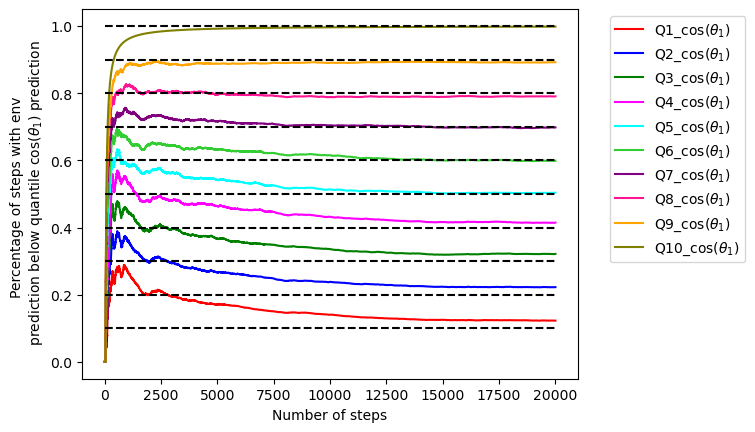

In [6]:
# costheta1
variable = 'costheta1'
nb_belowq1_list_costheta1, nb_belowq2_list_costheta1, nb_belowq3_list_costheta1, nb_belowq4_list_costheta1, nb_belowq5_list_costheta1, nb_belowq6_list_costheta1, nb_belowq7_list_costheta1, nb_belowq8_list_costheta1, nb_belowq9_list_costheta1, nb_belowq10_list_costheta1 = nb_below_quantile(env_costheta1, quantile0_costheta1, quantile1_costheta1, quantile2_costheta1, quantile3_costheta1, quantile4_costheta1, quantile5_costheta1, quantile6_costheta1, quantile7_costheta1, quantile8_costheta1, quantile9_costheta1, quantile10_costheta1)
plot_nb_below_quantiles(prob, nb_belowq1_list_costheta1, nb_belowq2_list_costheta1, nb_belowq3_list_costheta1, nb_belowq4_list_costheta1, nb_belowq5_list_costheta1, nb_belowq6_list_costheta1, nb_belowq7_list_costheta1, nb_belowq8_list_costheta1, nb_belowq9_list_costheta1, nb_belowq10_list_costheta1, variable)



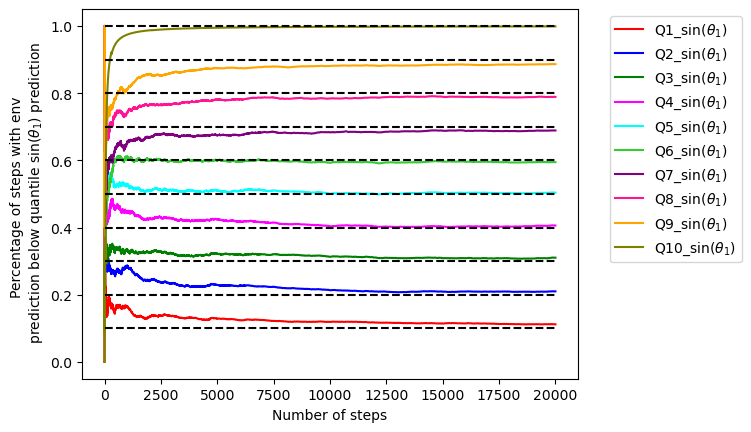

In [10]:
# sintheta1
variable = 'sintheta1'
nb_belowq1_list_sintheta1, nb_belowq2_list_sintheta1, nb_belowq3_list_sintheta1, nb_belowq4_list_sintheta1, nb_belowq5_list_sintheta1, nb_belowq6_list_sintheta1, nb_belowq7_list_sintheta1, nb_belowq8_list_sintheta1, nb_belowq9_list_sintheta1, nb_belowq10_list_sintheta1 = nb_below_quantile(env_sintheta1, quantile0_sintheta1, quantile1_sintheta1, quantile2_sintheta1, quantile3_sintheta1, quantile4_sintheta1, quantile5_sintheta1, quantile6_sintheta1, quantile7_sintheta1, quantile8_sintheta1, quantile9_sintheta1, quantile10_sintheta1)
plot_nb_below_quantiles(prob, nb_belowq1_list_sintheta1, nb_belowq2_list_sintheta1, nb_belowq3_list_sintheta1, nb_belowq4_list_sintheta1, nb_belowq5_list_sintheta1, nb_belowq6_list_sintheta1, nb_belowq7_list_sintheta1, nb_belowq8_list_sintheta1, nb_belowq9_list_sintheta1, nb_belowq10_list_sintheta1, variable)



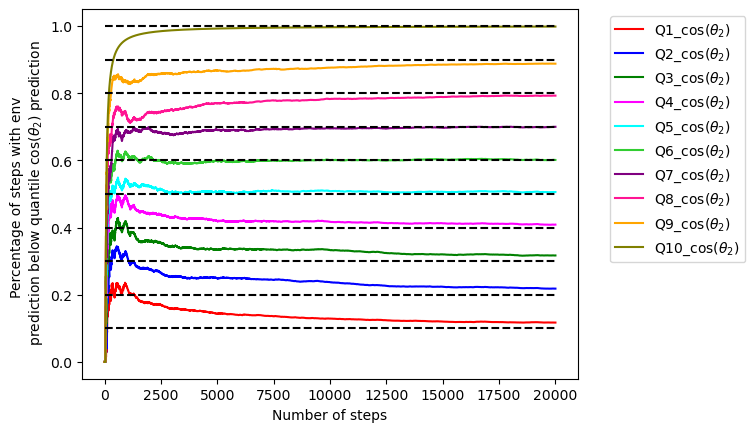

In [11]:
# costheta2
variable = 'costheta2'
nb_belowq1_list_costheta2, nb_belowq2_list_costheta2, nb_belowq3_list_costheta2, nb_belowq4_list_costheta2, nb_belowq5_list_costheta2, nb_belowq6_list_costheta2, nb_belowq7_list_costheta2, nb_belowq8_list_costheta2, nb_belowq9_list_costheta2, nb_belowq10_list_costheta2 = nb_below_quantile(env_costheta2, quantile0_costheta2, quantile1_costheta2, quantile2_costheta2, quantile3_costheta2, quantile4_costheta2, quantile5_costheta2, quantile6_costheta2, quantile7_costheta2, quantile8_costheta2, quantile9_costheta2, quantile10_costheta2)
plot_nb_below_quantiles(prob, nb_belowq1_list_costheta2, nb_belowq2_list_costheta2, nb_belowq3_list_costheta2, nb_belowq4_list_costheta2, nb_belowq5_list_costheta2, nb_belowq6_list_costheta2, nb_belowq7_list_costheta2, nb_belowq8_list_costheta2, nb_belowq9_list_costheta2, nb_belowq10_list_costheta2, variable)


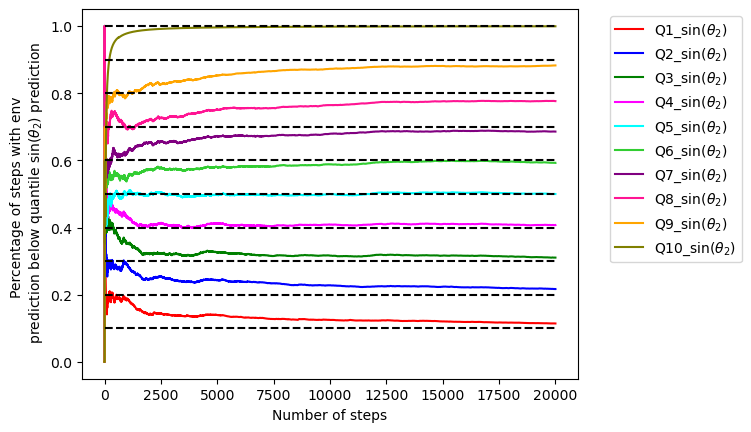

In [12]:
# sintheta2
variable = 'sintheta2'
nb_belowq1_list_sintheta2, nb_belowq2_list_sintheta2, nb_belowq3_list_sintheta2, nb_belowq4_list_sintheta2, nb_belowq5_list_sintheta2, nb_belowq6_list_sintheta2, nb_belowq7_list_sintheta2, nb_belowq8_list_sintheta2, nb_belowq9_list_sintheta2, nb_belowq10_list_sintheta2 = nb_below_quantile(env_sintheta2, quantile0_sintheta2, quantile1_sintheta2, quantile2_sintheta2, quantile3_sintheta2, quantile4_sintheta2, quantile5_sintheta2, quantile6_sintheta2, quantile7_sintheta2, quantile8_sintheta2, quantile9_sintheta2, quantile10_sintheta2)
plot_nb_below_quantiles(prob, nb_belowq1_list_sintheta2, nb_belowq2_list_sintheta2, nb_belowq3_list_sintheta2, nb_belowq4_list_sintheta2, nb_belowq5_list_sintheta2, nb_belowq6_list_sintheta2, nb_belowq7_list_sintheta2, nb_belowq8_list_sintheta2, nb_belowq9_list_sintheta2, nb_belowq10_list_sintheta2, variable)


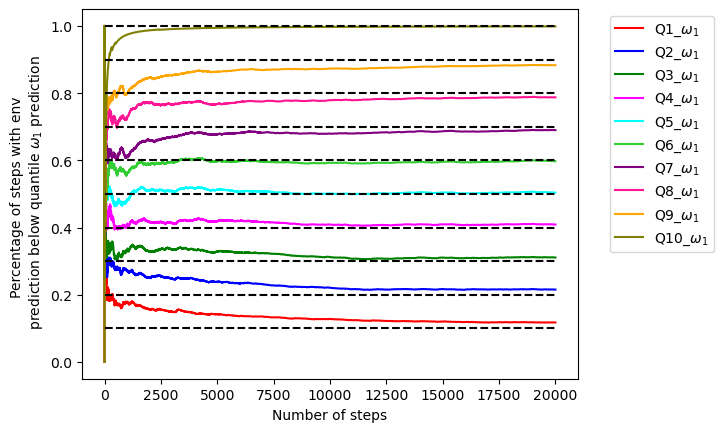

In [13]:
# omega1
variable = 'omega1'
nb_belowq1_list_omega1, nb_belowq2_list_omega1, nb_belowq3_list_omega1, nb_belowq4_list_omega1, nb_belowq5_list_omega1, nb_belowq6_list_omega1, nb_belowq7_list_omega1, nb_belowq8_list_omega1, nb_belowq9_list_omega1, nb_belowq10_list_omega1 = nb_below_quantile(env_omega1, quantile0_omega1, quantile1_omega1, quantile2_omega1, quantile3_omega1, quantile4_omega1, quantile5_omega1, quantile6_omega1, quantile7_omega1, quantile8_omega1, quantile9_omega1, quantile10_omega1)
plot_nb_below_quantiles(prob, nb_belowq1_list_omega1, nb_belowq2_list_omega1, nb_belowq3_list_omega1, nb_belowq4_list_omega1, nb_belowq5_list_omega1, nb_belowq6_list_omega1, nb_belowq7_list_omega1, nb_belowq8_list_omega1, nb_belowq9_list_omega1, nb_belowq10_list_omega1, variable)


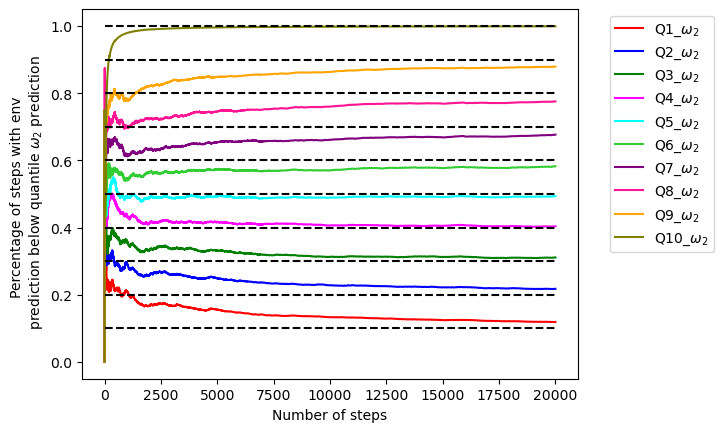

In [14]:
# omega2
variable = 'omega2'
nb_belowq1_list_omega2, nb_belowq2_list_omega2, nb_belowq3_list_omega2, nb_belowq4_list_omega2, nb_belowq5_list_omega2, nb_belowq6_list_omega2, nb_belowq7_list_omega2, nb_belowq8_list_omega2, nb_belowq9_list_omega2, nb_belowq10_list_omega2 = nb_below_quantile(env_omega2, quantile0_omega2, quantile1_omega2, quantile2_omega2, quantile3_omega2, quantile4_omega2, quantile5_omega2, quantile6_omega2, quantile7_omega2, quantile8_omega2, quantile9_omega2, quantile10_omega2)
plot_nb_below_quantiles(prob, nb_belowq1_list_omega2, nb_belowq2_list_omega2, nb_belowq3_list_omega2, nb_belowq4_list_omega2, nb_belowq5_list_omega2, nb_belowq6_list_omega2, nb_belowq7_list_omega2, nb_belowq8_list_omega2, nb_belowq9_list_omega2, nb_belowq10_list_omega2, variable)



## Cart pole

In [15]:
prob = "CartPole"

In [ ]:
error_magnitudes_x = []
error_magnitudes_v = []
error_magnitudes_theta = []
error_magnitudes_omega = []

env_x = []
env_v = []
env_theta = []
env_omega = []
pred_x = []
pred_v = []
pred_theta = []
pred_omega = []

pred_x_bottom_1std = []
pred_x_top_1std = []
pred_x_bottom_2std = []
pred_x_top_2std = []
pred_v_bottom_1std = []
pred_v_top_1std = []
pred_v_bottom_2std = []
pred_v_top_2std = []

pred_theta_bottom_1std = []
pred_theta_top_1std = []
pred_theta_bottom_2std = []
pred_theta_top_2std = []
pred_omega_bottom_1std = []
pred_omega_top_1std = []
pred_omega_bottom_2std = []
pred_omega_top_2std = []

actions_list_episode = []
actions_list_all = []
rewards_list = []

# quantile 0 data
quantile0_x = []
quantile0_v = []
quantile0_theta = []
quantile0_omega = []

# quantile 1 data
quantile1_x = []
quantile1_v = []
quantile1_theta = []
quantile1_omega = []

# quantile 2 data
quantile2_x = []
quantile2_v = []
quantile2_theta = []
quantile2_omega = []

# quantile 3 data
quantile3_x = []
quantile3_v = []
quantile3_theta = []
quantile3_omega = []

# quantile 4 data
quantile4_x = []
quantile4_v = []
quantile4_theta = []
quantile4_omega = []

# quantile 5 data
quantile5_x = []
quantile5_v = []
quantile5_theta = []
quantile5_omega = []

# quantile 6 data
quantile6_x = []
quantile6_v = []
quantile6_theta = []
quantile6_omega = []

# quantile 7 data
quantile7_x = []
quantile7_v = []
quantile7_theta = []
quantile7_omega = []

# quantile 8 data
quantile8_x = []
quantile8_v = []
quantile8_theta = []
quantile8_omega = []

# quantile 9 data
quantile9_x = []
quantile9_v = []
quantile9_theta = []
quantile9_omega = []

# quantile 10 data
quantile10_x = []
quantile10_v = []
quantile10_theta = []
quantile10_omega = []

seed = 0
env = gym.make('CartPole-v0').unwrapped
env.reset(seed=seed)

# Hyperparameters
state_dim = env.observation_space.shape[0]
action_dim=1
quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32

num_particles = 100

# usingEnv = True
usingEnv=False

num_test_steps = 20000

states_low = torch.tensor([-4.8, -torch.inf, -0.41887903, -torch.inf])
states_high = torch.tensor([4.8, torch.inf, 0.41887903, torch.inf])

state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False

actions_taken = np.zeros(num_test_steps)
env.action_space.seed(seed)
discrete = True
for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
        
    # Apply the first action from the optimized sequence
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    actions_list.append(action)
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        else:
            test_action = torch.tensor(action, dtype=torch.float32).unsqueeze(0)

        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_x = np.append(pred_x, mid_quantile[0][0])
        pred_v = np.append(pred_v, mid_quantile[0][1])  
        pred_theta = np.append(pred_theta, mid_quantile[0][2])
        pred_omega = np.append(pred_omega, mid_quantile[0][3])
        
        ######################
        # Quantile 0 data
        quantile0_x = np.append(quantile0_x, predicted_quantiles[0][0][0].item())
        quantile0_v = np.append(quantile0_v, predicted_quantiles[0][0][1].item())
        quantile0_theta = np.append(quantile0_theta, predicted_quantiles[0][0][2].item())
        quantile0_omega = np.append(quantile0_omega, predicted_quantiles[0][0][3].item())
        
        # Quantile 1 data
        quantile1_x = np.append(quantile1_x, predicted_quantiles[0][1][0].item())
        quantile1_v = np.append(quantile1_v, predicted_quantiles[0][1][1].item())
        quantile1_theta = np.append(quantile1_theta, predicted_quantiles[0][1][2].item())
        quantile1_omega = np.append(quantile1_omega, predicted_quantiles[0][1][3].item())
        
        # Quantile 2 data
        quantile2_x = np.append(quantile2_x, predicted_quantiles[0][2][0].item())
        quantile2_v = np.append(quantile2_v, predicted_quantiles[0][2][1].item())
        quantile2_theta = np.append(quantile2_theta, predicted_quantiles[0][2][2].item())
        quantile2_omega = np.append(quantile2_omega, predicted_quantiles[0][2][3].item())
        
        # Quantile 3 data
        quantile3_x = np.append(quantile3_x, predicted_quantiles[0][3][0].item())
        quantile3_v = np.append(quantile3_v, predicted_quantiles[0][3][1].item())
        quantile3_theta = np.append(quantile3_theta, predicted_quantiles[0][3][2].item())
        quantile3_omega = np.append(quantile3_omega, predicted_quantiles[0][3][3].item())
                    
        # Quantile 4 data
        quantile4_x = np.append(quantile4_x, predicted_quantiles[0][4][0].item())
        quantile4_v = np.append(quantile4_v, predicted_quantiles[0][4][1].item())
        quantile4_theta = np.append(quantile4_theta, predicted_quantiles[0][4][2].item())
        quantile4_omega = np.append(quantile4_omega, predicted_quantiles[0][4][3].item())
        
        # Quantile 5 data
        quantile5_x = np.append(quantile5_x, predicted_quantiles[0][5][0].item())
        quantile5_v = np.append(quantile5_v, predicted_quantiles[0][5][1].item())
        quantile5_theta = np.append(quantile5_theta, predicted_quantiles[0][5][2].item())
        quantile5_omega = np.append(quantile5_omega, predicted_quantiles[0][5][3].item())
        
        # Quantile 6 data
        quantile6_x = np.append(quantile6_x, predicted_quantiles[0][6][0].item())
        quantile6_v = np.append(quantile6_v, predicted_quantiles[0][6][1].item())
        quantile6_theta = np.append(quantile6_theta, predicted_quantiles[0][6][2].item())
        quantile6_omega = np.append(quantile6_omega, predicted_quantiles[0][6][3].item())
        
        # Quantile 7 data
        quantile7_x = np.append(quantile7_x, predicted_quantiles[0][7][0].item())
        quantile7_v = np.append(quantile7_v, predicted_quantiles[0][7][1].item())
        quantile7_theta = np.append(quantile7_theta, predicted_quantiles[0][7][2].item())
        quantile7_omega = np.append(quantile7_omega, predicted_quantiles[0][7][3].item())
        
        # Quantile 8 data
        quantile8_x = np.append(quantile8_x, predicted_quantiles[0][8][0].item())
        quantile8_v = np.append(quantile8_v, predicted_quantiles[0][8][1].item())
        quantile8_theta = np.append(quantile8_theta, predicted_quantiles[0][8][2].item())
        quantile8_omega = np.append(quantile8_omega, predicted_quantiles[0][8][3].item())
        
        # Quantile 9 data
        quantile9_x = np.append(quantile9_x, predicted_quantiles[0][9][0].item())
        quantile9_v = np.append(quantile9_v, predicted_quantiles[0][9][1].item())
        quantile9_theta = np.append(quantile9_theta, predicted_quantiles[0][9][2].item())
        quantile9_omega = np.append(quantile9_omega, predicted_quantiles[0][9][3].item())
        
        # Quantile 10 data
        quantile10_x = np.append(quantile10_x, predicted_quantiles[0][10][0].item())
        quantile10_v = np.append(quantile10_v, predicted_quantiles[0][10][1].item())
        quantile10_theta = np.append(quantile10_theta, predicted_quantiles[0][10][2].item())
        quantile10_omega = np.append(quantile10_omega, predicted_quantiles[0][10][3].item())
        
        ######################
        
        deltax = test_next_state[0] - mid_quantile[0][0]
        deltav = test_next_state[1] - mid_quantile[0][1]
        deltatheta = test_next_state[2] - mid_quantile[0][2]
        deltaomega = test_next_state[3] - mid_quantile[0][3]

        error_magnitudes_x.append(np.abs(deltax))
        error_magnitudes_v.append(np.abs(deltav))
        error_magnitudes_theta.append(np.abs(deltatheta))
        error_magnitudes_omega.append(np.abs(deltaomega))
        env_x.append(test_next_state[0])
        env_v.append(test_next_state[1])
        env_theta.append(test_next_state[2])
        env_omega.append(test_next_state[3])
    
    # Store experience in replay buffer
    replay_buffer.append((state, np.array([action]), reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)
        
        states = torch.clip(states, states_low, states_high)
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states
        
        # Compute the target quantiles (e.g., replicate next state across the quantile dimension)
        # target_quantiles = next_states.unsqueeze(-1).repeat(1, 1, num_quantiles)

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    state = next_state

    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False


c:\Users\nicle\anaconda3\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


### Graph of number of values below the different quantiles


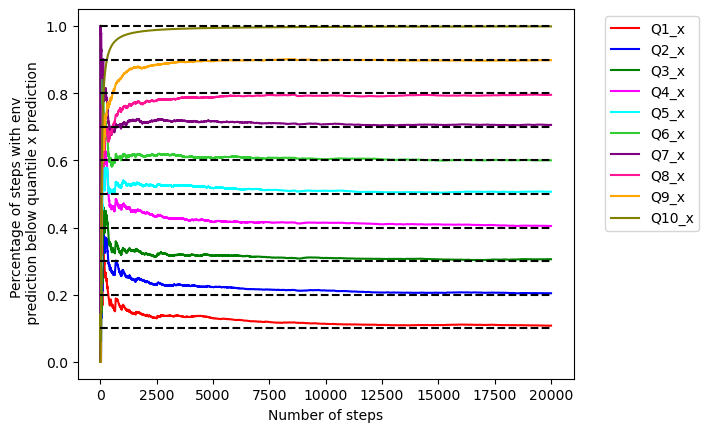

In [18]:
# x 
variable = "x"
nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x = nb_below_quantile(env_x, quantile0_x, quantile1_x, quantile2_x, quantile3_x, quantile4_x, quantile5_x, quantile6_x, quantile7_x, quantile8_x, quantile9_x, quantile10_x)
plot_nb_below_quantiles(prob, nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x, variable)



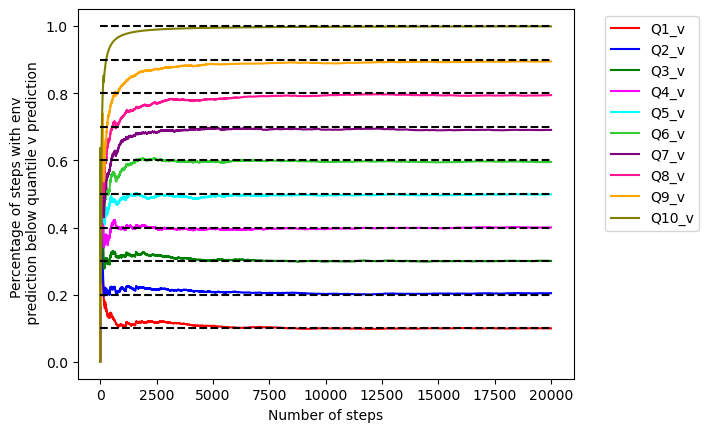

In [19]:
# v
variable = "v"
nb_belowq1_list_v, nb_belowq2_list_v, nb_belowq3_list_v, nb_belowq4_list_v, nb_belowq5_list_v, nb_belowq6_list_v, nb_belowq7_list_v, nb_belowq8_list_v, nb_belowq9_list_v, nb_belowq10_list_v = nb_below_quantile(env_v, quantile0_v, quantile1_v, quantile2_v, quantile3_v, quantile4_v, quantile5_v, quantile6_v, quantile7_v, quantile8_v, quantile9_v, quantile10_v)
plot_nb_below_quantiles(prob, nb_belowq1_list_v, nb_belowq2_list_v, nb_belowq3_list_v, nb_belowq4_list_v, nb_belowq5_list_v, nb_belowq6_list_v, nb_belowq7_list_v, nb_belowq8_list_v, nb_belowq9_list_v, nb_belowq10_list_v, variable)


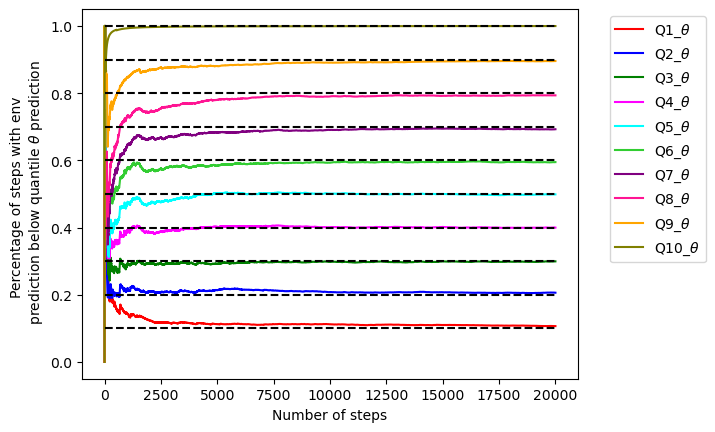

In [20]:
# theta
variable = "theta"
nb_belowq1_list_theta, nb_belowq2_list_theta, nb_belowq3_list_theta, nb_belowq4_list_theta, nb_belowq5_list_theta, nb_belowq6_list_theta, nb_belowq7_list_theta, nb_belowq8_list_theta, nb_belowq9_list_theta, nb_belowq10_list_theta = nb_below_quantile(env_theta, quantile0_theta, quantile1_theta, quantile2_theta, quantile3_theta, quantile4_theta, quantile5_theta, quantile6_theta, quantile7_theta, quantile8_theta, quantile9_theta, quantile10_theta)
plot_nb_below_quantiles(prob, nb_belowq1_list_theta, nb_belowq2_list_theta, nb_belowq3_list_theta, nb_belowq4_list_theta, nb_belowq5_list_theta, nb_belowq6_list_theta, nb_belowq7_list_theta, nb_belowq8_list_theta, nb_belowq9_list_theta, nb_belowq10_list_theta, variable)


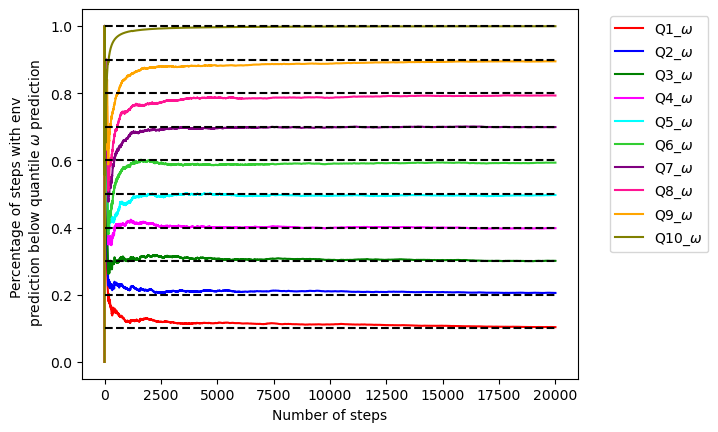

In [21]:
# omega
variable = "omega"
nb_belowq1_list_omega, nb_belowq2_list_omega, nb_belowq3_list_omega, nb_belowq4_list_omega, nb_belowq5_list_omega, nb_belowq6_list_omega, nb_belowq7_list_omega, nb_belowq8_list_omega, nb_belowq9_list_omega, nb_belowq10_list_omega = nb_below_quantile(env_omega, quantile0_omega, quantile1_omega, quantile2_omega, quantile3_omega, quantile4_omega, quantile5_omega, quantile6_omega, quantile7_omega, quantile8_omega, quantile9_omega, quantile10_omega)
plot_nb_below_quantiles(prob, nb_belowq1_list_omega, nb_belowq2_list_omega, nb_belowq3_list_omega, nb_belowq4_list_omega, nb_belowq5_list_omega, nb_belowq6_list_omega, nb_belowq7_list_omega, nb_belowq8_list_omega, nb_belowq9_list_omega, nb_belowq10_list_omega, variable)


## Pendulum 

In [22]:
prob = "Pendulum"

In [ ]:
seed = 0
max_episodes = 100
max_episode_steps = 200
env = gym.make('Pendulum-v1').unwrapped
env.reset(seed=seed)

error_magnitudes_x = []
error_magnitudes_y = []
error_magnitudes_omega = []

env_x = []
env_y = []
env_omega = []
pred_x = []
pred_y = []
pred_omega = []

# quantile 0 data
quantile0_x = []
quantile0_y = []
quantile0_omega = []

# quantile 1 data
quantile1_x = []
quantile1_y = []
quantile1_omega = []

# quantile 2 data
quantile2_x = []
quantile2_y = []
quantile2_omega = []

# quantile 3 data
quantile3_x = []
quantile3_y = []
quantile3_omega = []

# quantile 4 data
quantile4_x = []
quantile4_y = []
quantile4_omega = []

# quantile 5 data
quantile5_x = []
quantile5_y = []
quantile5_omega = []

# quantile 6 data
quantile6_x = []
quantile6_y = []
quantile6_omega = []

# quantile 7 data
quantile7_x = []
quantile7_y = []
quantile7_omega = []

# quantile 8 data
quantile8_x = []
quantile8_y = []
quantile8_omega = []

# quantile 9 data
quantile9_x = []
quantile9_y = []
quantile9_omega = []

# quantile 10 data
quantile10_x = []
quantile10_y = []
quantile10_omega = []

# Hyperparameters
state_dim = env.observation_space.shape[0]
action_dim=1
quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32

usingEnv = True

num_test_steps = 20000

state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []

states_low = torch.tensor([-1, -1, -8])
states_high = torch.tensor([1, 1, 8])

actions_taken = np.zeros(num_test_steps)
env.action_space.seed(seed)

discrete = False

for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
    
    # Apply the first action from the optimized sequence
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        else:
            test_action = torch.tensor(action, dtype=torch.float32)
            
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_x = np.append(pred_x, mid_quantile[0][0])
        pred_y = np.append(pred_y, mid_quantile[0][1])
        pred_omega = np.append(pred_omega, mid_quantile[0][2])
        
        ########################
        
        # Quantile 0 data
        quantile0_x = np.append(quantile0_x, predicted_quantiles[0][0][0].item())
        quantile0_y = np.append(quantile0_y, predicted_quantiles[0][0][1].item())
        quantile0_omega = np.append(quantile0_omega, predicted_quantiles[0][0][2].item())
        
        # Quantile 1 data
        quantile1_x = np.append(quantile1_x, predicted_quantiles[0][1][0].item())
        quantile1_y = np.append(quantile1_y, predicted_quantiles[0][1][1].item())
        quantile1_omega = np.append(quantile1_omega, predicted_quantiles[0][1][2].item())
        
        # Quantile 2 data
        quantile2_x = np.append(quantile2_x, predicted_quantiles[0][2][0].item())
        quantile2_y = np.append(quantile2_y, predicted_quantiles[0][2][1].item())
        quantile2_omega = np.append(quantile2_omega, predicted_quantiles[0][2][2].item())
        
        # Quantile 3 data
        quantile3_x = np.append(quantile3_x, predicted_quantiles[0][3][0].item())
        quantile3_y = np.append(quantile3_y, predicted_quantiles[0][3][1].item())
        quantile3_omega = np.append(quantile3_omega, predicted_quantiles[0][3][2].item())
        
        # Quantile 4 data
        quantile4_x = np.append(quantile4_x, predicted_quantiles[0][4][0].item())
        quantile4_y = np.append(quantile4_y, predicted_quantiles[0][4][1].item())
        quantile4_omega = np.append(quantile4_omega, predicted_quantiles[0][4][2].item())
        
        # Quantile 5 data
        quantile5_x = np.append(quantile5_x, predicted_quantiles[0][5][0].item())
        quantile5_y = np.append(quantile5_y, predicted_quantiles[0][5][1].item())
        quantile5_omega = np.append(quantile5_omega, predicted_quantiles[0][5][2].item())
        
        # Quantile 6 data
        quantile6_x = np.append(quantile6_x, predicted_quantiles[0][6][0].item())
        quantile6_y = np.append(quantile6_y, predicted_quantiles[0][6][1].item())
        quantile6_omega = np.append(quantile6_omega, predicted_quantiles[0][6][2].item())
        
        # Quantile 7 data
        quantile7_x = np.append(quantile7_x, predicted_quantiles[0][7][0].item())
        quantile7_y = np.append(quantile7_y, predicted_quantiles[0][7][1].item())
        quantile7_omega = np.append(quantile7_omega, predicted_quantiles[0][7][2].item())
        
        # Quantile 8 data
        quantile8_x = np.append(quantile8_x, predicted_quantiles[0][8][0].item())
        quantile8_y = np.append(quantile8_y, predicted_quantiles[0][8][1].item())
        quantile8_omega = np.append(quantile8_omega, predicted_quantiles[0][8][2].item())
        
        # Quantile 9 data
        quantile9_x = np.append(quantile9_x, predicted_quantiles[0][9][0].item())
        quantile9_y = np.append(quantile9_y, predicted_quantiles[0][9][1].item())
        quantile9_omega = np.append(quantile9_omega, predicted_quantiles[0][9][2].item())

        # Quantile 10 data
        quantile10_x = np.append(quantile10_x, predicted_quantiles[0][10][0].item())
        quantile10_y = np.append(quantile10_y, predicted_quantiles[0][10][1].item())
        quantile10_omega = np.append(quantile10_omega, predicted_quantiles[0][10][2].item())
        
        deltax = test_next_state[0] - mid_quantile[0][0]
        deltay = test_next_state[1] - mid_quantile[0][1]
        deltaomega = test_next_state[2] - mid_quantile[0][2]

        error_magnitudes_x.append(np.abs(deltax))
        error_magnitudes_y.append(np.abs(deltay))
        error_magnitudes_omega.append(np.abs(deltaomega))
        
        env_x.append(test_next_state[0])
        env_y.append(test_next_state[1])
        env_omega.append(test_next_state[2])
    
    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)

        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    state = next_state

    # Terminate if done
    if done or truncated: # Done does nothing here
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        state = env.state.copy()



C:\Users\nicle\AppData\Local\Temp\ipykernel_79428\123562110.py:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actions_taken[step] = action


### Graph of number of values below the different quantiles


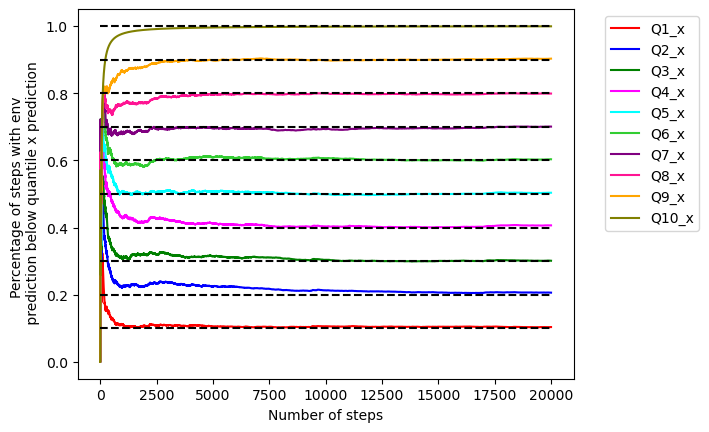

In [25]:
# x
variable = "x"
nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x = nb_below_quantile(env_x, quantile0_x, quantile1_x, quantile2_x, quantile3_x, quantile4_x, quantile5_x, quantile6_x, quantile7_x, quantile8_x, quantile9_x, quantile10_x)
plot_nb_below_quantiles(prob, nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x, variable)


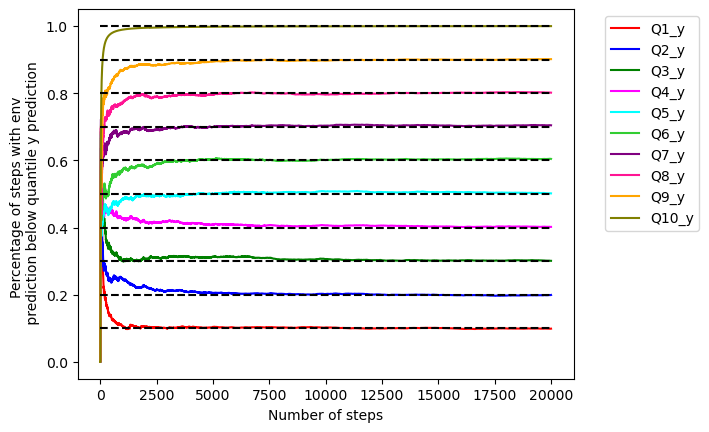

In [26]:
# y
variable = "y"
nb_belowq1_list_y, nb_belowq2_list_y, nb_belowq3_list_y, nb_belowq4_list_y, nb_belowq5_list_y, nb_belowq6_list_y, nb_belowq7_list_y, nb_belowq8_list_y, nb_belowq9_list_y, nb_belowq10_list_y = nb_below_quantile(env_y, quantile0_y, quantile1_y, quantile2_y, quantile3_y, quantile4_y, quantile5_y, quantile6_y, quantile7_y, quantile8_y, quantile9_y, quantile10_y)
plot_nb_below_quantiles(prob, nb_belowq1_list_y, nb_belowq2_list_y, nb_belowq3_list_y, nb_belowq4_list_y, nb_belowq5_list_y, nb_belowq6_list_y, nb_belowq7_list_y, nb_belowq8_list_y, nb_belowq9_list_y, nb_belowq10_list_y, variable)


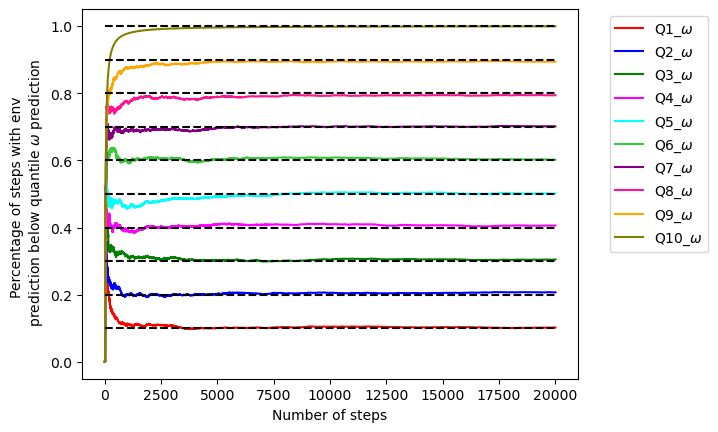

In [27]:
# omega
variable = "omega"
nb_belowq1_list_omega, nb_belowq2_list_omega, nb_belowq3_list_omega, nb_belowq4_list_omega, nb_belowq5_list_omega, nb_belowq6_list_omega, nb_belowq7_list_omega, nb_belowq8_list_omega, nb_belowq9_list_omega, nb_belowq10_list_omega = nb_below_quantile(env_omega, quantile0_omega, quantile1_omega, quantile2_omega, quantile3_omega, quantile4_omega, quantile5_omega, quantile6_omega, quantile7_omega, quantile8_omega, quantile9_omega, quantile10_omega)
plot_nb_below_quantiles(prob, nb_belowq1_list_omega, nb_belowq2_list_omega, nb_belowq3_list_omega, nb_belowq4_list_omega, nb_belowq5_list_omega, nb_belowq6_list_omega, nb_belowq7_list_omega, nb_belowq8_list_omega, nb_belowq9_list_omega, nb_belowq10_list_omega, variable)


## Mountain car

In [28]:
prob = "MountainCar"

In [ ]:
seed = 0
env = gym.make('MountainCarContinuous-v0').unwrapped
env.reset(seed=seed)

error_magnitudes_x = []
error_magnitudes_v = []

env_x = []
env_v = []
pred_x = []
pred_v = []

# quantile 0 data
quantile0_x = []
quantile0_v = []

# quantile 1 data
quantile1_x = []
quantile1_v = []

# quantile 2 data
quantile2_x = []
quantile2_v = []

# quantile 3 data
quantile3_x = []
quantile3_v = []

# quantile 4 data
quantile4_x = []
quantile4_v = []

# quantile 5 data
quantile5_x = []
quantile5_v = []

# quantile 6 data
quantile6_x = []
quantile6_v = []

# quantile 7 data
quantile7_x = []
quantile7_v = []

# quantile 8 data
quantile8_x = []
quantile8_v = []

# quantile 9 data
quantile9_x = []
quantile9_v = []

# quantile 10 data
quantile10_x = []
quantile10_v = []

# Hyperparameters
state_dim = env.observation_space.shape[0]
action_dim=1
quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32

usingEnv = False

num_test_steps = 20000

state, _ = env.reset(seed=seed)
done = False
truncated = False
episode_reward = 0
actions_list = []

discrete = False
states_low = torch.tensor([-1.2, -0.07])
states_high = torch.tensor([0.6, 0.07])
actions_taken = np.zeros(num_test_steps)
env.action_space.seed(seed)


for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action

    # Apply the first action from the optimized sequence
    next_state, reward, done, terminated, info = env.step(action)
    episode_reward += reward
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        else:
            test_action = torch.tensor(action, dtype=torch.float32)
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)

        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_x = np.append(pred_x, mid_quantile[0][0])
        pred_v = np.append(pred_v, mid_quantile[0][1])
        
        ########################
        
        # Quantile 0 data
        quantile0_x = np.append(quantile0_x, predicted_quantiles[0][0][0].item())
        quantile0_v = np.append(quantile0_v, predicted_quantiles[0][0][1].item())
        
        # Quantile 1 data
        quantile1_x = np.append(quantile1_x, predicted_quantiles[0][1][0].item())
        quantile1_v = np.append(quantile1_v, predicted_quantiles[0][1][1].item())
        
        # Quantile 2 data
        quantile2_x = np.append(quantile2_x, predicted_quantiles[0][2][0].item())
        quantile2_v = np.append(quantile2_v, predicted_quantiles[0][2][1].item())
        
        # Quantile 3 data
        quantile3_x = np.append(quantile3_x, predicted_quantiles[0][3][0].item())
        quantile3_v = np.append(quantile3_v, predicted_quantiles[0][3][1].item())
        
        # Quantile 4 data
        quantile4_x = np.append(quantile4_x, predicted_quantiles[0][4][0].item())
        quantile4_v = np.append(quantile4_v, predicted_quantiles[0][4][1].item())
        
        # Quantile 5 data
        quantile5_x = np.append(quantile5_x, predicted_quantiles[0][5][0].item())
        quantile5_v = np.append(quantile5_v, predicted_quantiles[0][5][1].item())
        
        # Quantile 6 data
        quantile6_x = np.append(quantile6_x, predicted_quantiles[0][6][0].item())
        quantile6_v = np.append(quantile6_v, predicted_quantiles[0][6][1].item())
        
        # Quantile 7 data
        quantile7_x = np.append(quantile7_x, predicted_quantiles[0][7][0].item())
        quantile7_v = np.append(quantile7_v, predicted_quantiles[0][7][1].item())
        
        # Quantile 8 data
        quantile8_x = np.append(quantile8_x, predicted_quantiles[0][8][0].item())
        quantile8_v = np.append(quantile8_v, predicted_quantiles[0][8][1].item())
        
        # Quantile 9 data
        quantile9_x = np.append(quantile9_x, predicted_quantiles[0][9][0].item())
        quantile9_v = np.append(quantile9_v, predicted_quantiles[0][9][1].item())

        # Quantile 10 data
        quantile10_x = np.append(quantile10_x, predicted_quantiles[0][10][0].item())
        quantile10_v = np.append(quantile10_v, predicted_quantiles[0][10][1].item())
    
        
        deltax = test_next_state[0] - mid_quantile[0][0]
        deltav = test_next_state[1] - mid_quantile[0][1]

        error_magnitudes_x.append(np.abs(deltax))
        error_magnitudes_v.append(np.abs(deltav))
        
        env_x.append(test_next_state[0])
        env_v.append(test_next_state[1])

    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    state = next_state

    # Terminate if done
    if done or terminated: # Done does nothing here
        state, _ = env.reset(seed=seed)
        done = False
        truncated = False
    


C:\Users\nicle\AppData\Local\Temp\ipykernel_79428\2531860254.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actions_taken[step] = action


### Graph of number of values below the different quantiles


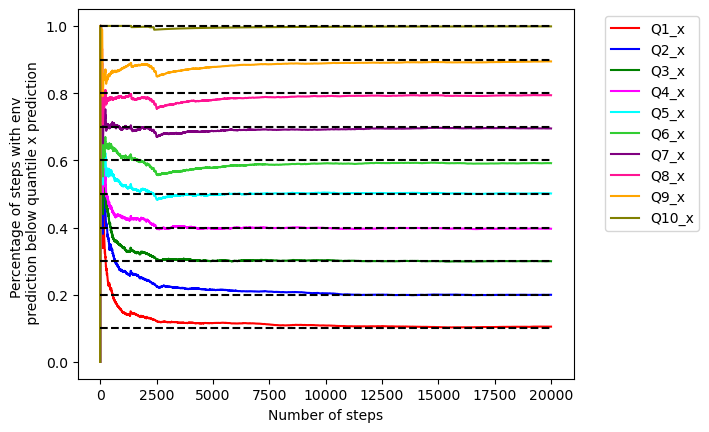

In [31]:
# x 
variable = "x"
nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x = nb_below_quantile(env_x, quantile0_x, quantile1_x, quantile2_x, quantile3_x, quantile4_x, quantile5_x, quantile6_x, quantile7_x, quantile8_x, quantile9_x, quantile10_x)
plot_nb_below_quantiles(prob, nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x, variable)



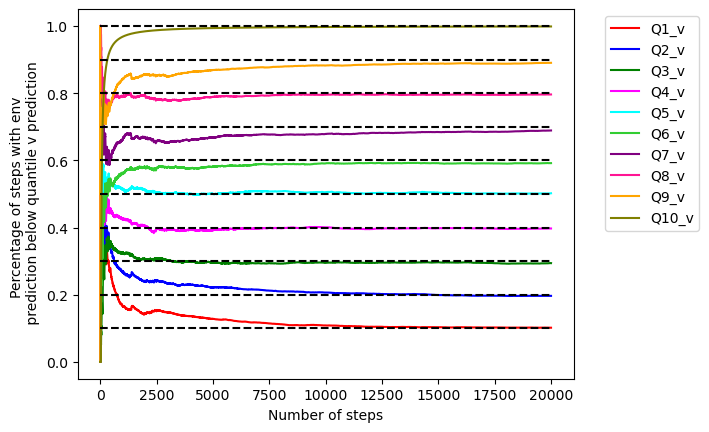

In [32]:
# v
variable = "v"
nb_belowq1_list_v, nb_belowq2_list_v, nb_belowq3_list_v, nb_belowq4_list_v, nb_belowq5_list_v, nb_belowq6_list_v, nb_belowq7_list_v, nb_belowq8_list_v, nb_belowq9_list_v, nb_belowq10_list_v = nb_below_quantile(env_v, quantile0_v, quantile1_v, quantile2_v, quantile3_v, quantile4_v, quantile5_v, quantile6_v, quantile7_v, quantile8_v, quantile9_v, quantile10_v)
plot_nb_below_quantiles(prob, nb_belowq1_list_v, nb_belowq2_list_v, nb_belowq3_list_v, nb_belowq4_list_v, nb_belowq5_list_v, nb_belowq6_list_v, nb_belowq7_list_v, nb_belowq8_list_v, nb_belowq9_list_v, nb_belowq10_list_v, variable)


## Panda Dense reward Reach (3D)

The model predictions shouldn't depend on the reward distribution


In [76]:
prob = "PandaReach"

In [ ]:
import panda_gym
seed = 0
env = gym.make('PandaReachDense-v3').unwrapped
env.reset(seed=seed)

error_magnitudes_x = []
error_magnitudes_y = []
error_magnitudes_z = []
error_magnitudes_vx = []
error_magnitudes_vy = []
error_magnitudes_vz = []

env_x = []
env_y = []
env_z = []
env_vx = []
env_vy = []
env_vz = []

pred_x = []
pred_y = []
pred_z = []
pred_vx = []
pred_vy = []
pred_vz = []

# quantile 0 data
quantile0_x = []
quantile0_y = []
quantile0_z = []
quantile0_vx = []
quantile0_vy = []
quantile0_vz = []

# quantile 1 data
quantile1_x = []
quantile1_y = []
quantile1_z = []
quantile1_vx = []
quantile1_vy = []
quantile1_vz = []

# quantile 2 data
quantile2_x = []
quantile2_y = []
quantile2_z = []
quantile2_vx = []
quantile2_vy = []
quantile2_vz = []

# quantile 3 data
quantile3_x = []
quantile3_y = []
quantile3_z = []
quantile3_vx = []
quantile3_vy = []
quantile3_vz = []

# quantile 4 data
quantile4_x = []
quantile4_y = []
quantile4_z = []
quantile4_vx = []
quantile4_vy = []
quantile4_vz = []

# quantile 5 data
quantile5_x = []
quantile5_y = []
quantile5_z = []
quantile5_vx = []
quantile5_vy = []
quantile5_vz = []

# quantile 6 data
quantile6_x = []
quantile6_y = []
quantile6_z = []
quantile6_vx = []
quantile6_vy = []
quantile6_vz = []

# quantile 7 data
quantile7_x = []
quantile7_y = []
quantile7_z = []
quantile7_vx = []
quantile7_vy = []
quantile7_vz = []

# quantile 8 data
quantile8_x = []
quantile8_y = []
quantile8_z = []
quantile8_vx = []
quantile8_vy = []
quantile8_vz = []

# quantile 9 data
quantile9_x = []
quantile9_y = []
quantile9_z = []
quantile9_vx = []
quantile9_vy = []
quantile9_vz = []

# quantile 10 data
quantile10_x = []
quantile10_y = []
quantile10_z = []
quantile10_vx = []
quantile10_vy = []
quantile10_vz = []


actions_low = env.action_space.low
actions_high = env.action_space.high
states_low = env.observation_space['observation'].low
states_high = env.observation_space['observation'].high
state_dim = len(states_low)
action_dim = len(actions_low)
states_low = torch.tensor([-10, -10, -10, -10, -10, -10])
states_high = torch.tensor([10, 10, 10, 10, 10, 10])

quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32

num_test_steps = 20000
state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False
truncated = False

goal_state = state['desired_goal'] # 3 components
state = state['observation']#[:3] # 6 components

discrete = False
actions_taken = np.zeros((num_test_steps, action_dim))
env.action_space.seed(seed)

for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
    
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    next_state = next_state['observation']#[:3] # env.state
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)#.unsqueeze(1)  # Example action
        else:
            test_action = torch.tensor(action, dtype=torch.float32)#.unsqueeze(1)
        test_state = torch.tensor(state, dtype=torch.float32)#.reshape(1, -1)
        test_state = torch.clip(test_state, states_low, states_high)

        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_x = np.append(pred_x, mid_quantile[0][0])
        pred_y = np.append(pred_y, mid_quantile[0][1])
        pred_z = np.append(pred_z, mid_quantile[0][2])
        pred_vx = np.append(pred_vx, mid_quantile[0][3])
        pred_vy = np.append(pred_vy, mid_quantile[0][4])
        pred_vz = np.append(pred_vz, mid_quantile[0][5])
        
        # Quantile 0 data
        quantile0_x = np.append(quantile0_x, predicted_quantiles[0][0][0].item())
        quantile0_y = np.append(quantile0_y, predicted_quantiles[0][0][1].item())
        quantile0_z = np.append(quantile0_z, predicted_quantiles[0][0][2].item())
        quantile0_vx = np.append(quantile0_vx, predicted_quantiles[0][0][3].item())
        quantile0_vy = np.append(quantile0_vy, predicted_quantiles[0][0][4].item())
        quantile0_vz = np.append(quantile0_vz, predicted_quantiles[0][0][5].item())
        
        # Quantile 1 data
        quantile1_x = np.append(quantile1_x, predicted_quantiles[0][1][0].item())
        quantile1_y = np.append(quantile1_y, predicted_quantiles[0][1][1].item())
        quantile1_z = np.append(quantile1_z, predicted_quantiles[0][1][2].item())
        quantile1_vx = np.append(quantile1_vx, predicted_quantiles[0][1][3].item())
        quantile1_vy = np.append(quantile1_vy, predicted_quantiles[0][1][4].item())
        quantile1_vz = np.append(quantile1_vz, predicted_quantiles[0][1][5].item())
        
        # Quantile 2 data
        quantile2_x = np.append(quantile2_x, predicted_quantiles[0][2][0].item())
        quantile2_y = np.append(quantile2_y, predicted_quantiles[0][2][1].item())
        quantile2_z = np.append(quantile2_z, predicted_quantiles[0][2][2].item())
        quantile2_vx = np.append(quantile2_vx, predicted_quantiles[0][2][3].item())
        quantile2_vy = np.append(quantile2_vy, predicted_quantiles[0][2][4].item())
        quantile2_vz = np.append(quantile2_vz, predicted_quantiles[0][2][5].item())
        
        # Quantile 3 data
        quantile3_x = np.append(quantile3_x, predicted_quantiles[0][3][0].item())
        quantile3_y = np.append(quantile3_y, predicted_quantiles[0][3][1].item())
        quantile3_z = np.append(quantile3_z, predicted_quantiles[0][3][2].item())
        quantile3_vx = np.append(quantile3_vx, predicted_quantiles[0][3][3].item())
        quantile3_vy = np.append(quantile3_vy, predicted_quantiles[0][3][4].item())
        quantile3_vz = np.append(quantile3_vz, predicted_quantiles[0][3][5].item())
        
        # Quantile 4 data
        quantile4_x = np.append(quantile4_x, predicted_quantiles[0][4][0].item())
        quantile4_y = np.append(quantile4_y, predicted_quantiles[0][4][1].item())
        quantile4_z = np.append(quantile4_z, predicted_quantiles[0][4][2].item())
        quantile4_vx = np.append(quantile4_vx, predicted_quantiles[0][4][3].item())
        quantile4_vy = np.append(quantile4_vy, predicted_quantiles[0][4][4].item())
        quantile4_vz = np.append(quantile4_vz, predicted_quantiles[0][4][5].item())
        
        # Quantile 5 data
        quantile5_x = np.append(quantile5_x, predicted_quantiles[0][5][0].item())
        quantile5_y = np.append(quantile5_y, predicted_quantiles[0][5][1].item())
        quantile5_z = np.append(quantile5_z, predicted_quantiles[0][5][2].item())
        quantile5_vx = np.append(quantile5_vx, predicted_quantiles[0][5][3].item())
        quantile5_vy = np.append(quantile5_vy, predicted_quantiles[0][5][4].item())
        quantile5_vz = np.append(quantile5_vz, predicted_quantiles[0][5][5].item())
        
        # Quantile 6 data
        quantile6_x = np.append(quantile6_x, predicted_quantiles[0][6][0].item())
        quantile6_y = np.append(quantile6_y, predicted_quantiles[0][6][1].item())
        quantile6_z = np.append(quantile6_z, predicted_quantiles[0][6][2].item())
        quantile6_vx = np.append(quantile6_vx, predicted_quantiles[0][6][3].item())
        quantile6_vy = np.append(quantile6_vy, predicted_quantiles[0][6][4].item())
        quantile6_vz = np.append(quantile6_vz, predicted_quantiles[0][6][5].item())
        
        # Quantile 7 data
        quantile7_x = np.append(quantile7_x, predicted_quantiles[0][7][0].item())
        quantile7_y = np.append(quantile7_y, predicted_quantiles[0][7][1].item())
        quantile7_z = np.append(quantile7_z, predicted_quantiles[0][7][2].item())
        quantile7_vx = np.append(quantile7_vx, predicted_quantiles[0][7][3].item())
        quantile7_vy = np.append(quantile7_vy, predicted_quantiles[0][7][4].item())
        quantile7_vz = np.append(quantile7_vz, predicted_quantiles[0][7][5].item())
        
        # Quantile 8 data
        quantile8_x = np.append(quantile8_x, predicted_quantiles[0][8][0].item())
        quantile8_y = np.append(quantile8_y, predicted_quantiles[0][8][1].item())
        quantile8_z = np.append(quantile8_z, predicted_quantiles[0][8][2].item())
        quantile8_vx = np.append(quantile8_vx, predicted_quantiles[0][8][3].item())
        quantile8_vy = np.append(quantile8_vy, predicted_quantiles[0][8][4].item())
        quantile8_vz = np.append(quantile8_vz, predicted_quantiles[0][8][5].item())
        
        # Quantile 9 data
        quantile9_x = np.append(quantile9_x, predicted_quantiles[0][9][0].item())
        quantile9_y = np.append(quantile9_y, predicted_quantiles[0][9][1].item())
        quantile9_z = np.append(quantile9_z, predicted_quantiles[0][9][2].item())
        quantile9_vx = np.append(quantile9_vx, predicted_quantiles[0][9][3].item())
        quantile9_vy = np.append(quantile9_vy, predicted_quantiles[0][9][4].item())
        quantile9_vz = np.append(quantile9_vz, predicted_quantiles[0][9][5].item())
        
        # Quantile 10 data
        quantile10_x = np.append(quantile10_x, predicted_quantiles[0][10][0].item())
        quantile10_y = np.append(quantile10_y, predicted_quantiles[0][10][1].item())
        quantile10_z = np.append(quantile10_z, predicted_quantiles[0][10][2].item())
        quantile10_vx = np.append(quantile10_vx, predicted_quantiles[0][10][3].item())
        quantile10_vy = np.append(quantile10_vy, predicted_quantiles[0][10][4].item())
        quantile10_vz = np.append(quantile10_vz, predicted_quantiles[0][10][5].item())
        
        deltax = test_next_state[0] - mid_quantile[0][0]
        deltay = test_next_state[1] - mid_quantile[0][1]
        deltaz = test_next_state[2] - mid_quantile[0][2]
        
        error_magnitudes_x.append(np.abs(deltax))
        error_magnitudes_y.append(np.abs(deltay))
        error_magnitudes_z.append(np.abs(deltaz))
        
        env_x.append(test_next_state[0])
        env_y.append(test_next_state[1])
        env_z.append(test_next_state[2])
        
        deltavx = test_next_state[3] - mid_quantile[0][3]
        deltavy = test_next_state[4] - mid_quantile[0][4]
        deltavz = test_next_state[5] - mid_quantile[0][5]
        
        error_magnitudes_vx.append(np.abs(deltavx))
        error_magnitudes_vy.append(np.abs(deltavy))
        error_magnitudes_vz.append(np.abs(deltavz))
        
        env_vx.append(test_next_state[3])
        env_vy.append(test_next_state[4])
        env_vz.append(test_next_state[5])

    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    state = next_state

    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False
        truncated = False
        
        goal_state = state['desired_goal'] # 3 components
        state = state['observation']#[:3] # 6 components



### Graph of number of values below the different quantiles


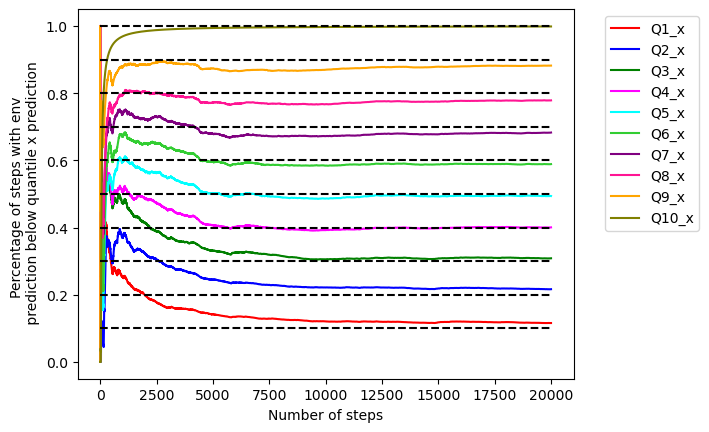

In [78]:
# x 
variable = "x"
nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x = nb_below_quantile(env_x, quantile0_x, quantile1_x, quantile2_x, quantile3_x, quantile4_x, quantile5_x, quantile6_x, quantile7_x, quantile8_x, quantile9_x, quantile10_x)
plot_nb_below_quantiles(prob, nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x, variable)



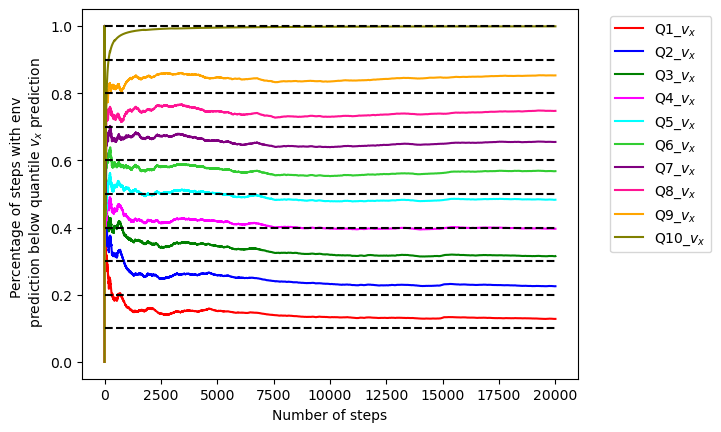

In [79]:
# vx
variable = "vx"
nb_belowq1_list_vx, nb_belowq2_list_vx, nb_belowq3_list_vx, nb_belowq4_list_vx, nb_belowq5_list_vx, nb_belowq6_list_vx, nb_belowq7_list_vx, nb_belowq8_list_vx, nb_belowq9_list_vx, nb_belowq10_list_vx = nb_below_quantile(env_vx, quantile0_vx, quantile1_vx, quantile2_vx, quantile3_vx, quantile4_vx, quantile5_vx, quantile6_vx, quantile7_vx, quantile8_vx, quantile9_vx, quantile10_vx)
plot_nb_below_quantiles(prob, nb_belowq1_list_vx, nb_belowq2_list_vx, nb_belowq3_list_vx, nb_belowq4_list_vx, nb_belowq5_list_vx, nb_belowq6_list_vx, nb_belowq7_list_vx, nb_belowq8_list_vx, nb_belowq9_list_vx, nb_belowq10_list_vx, variable)


Need to change the one below to y's


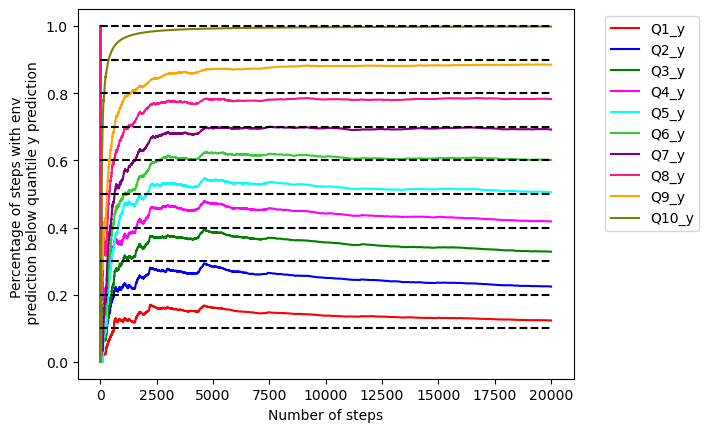

In [80]:
# y 
variable = "y"
nb_belowq1_list_y, nb_belowq2_list_y, nb_belowq3_list_y, nb_belowq4_list_y, nb_belowq5_list_y, nb_belowq6_list_y, nb_belowq7_list_y, nb_belowq8_list_y, nb_belowq9_list_y, nb_belowq10_list_y = nb_below_quantile(env_y, quantile0_y, quantile1_y, quantile2_y, quantile3_y, quantile4_y, quantile5_y, quantile6_y, quantile7_y, quantile8_y, quantile9_y, quantile10_y)
plot_nb_below_quantiles(prob, nb_belowq1_list_y, nb_belowq2_list_y, nb_belowq3_list_y, nb_belowq4_list_y, nb_belowq5_list_y, nb_belowq6_list_y, nb_belowq7_list_y, nb_belowq8_list_y, nb_belowq9_list_y, nb_belowq10_list_y, variable)


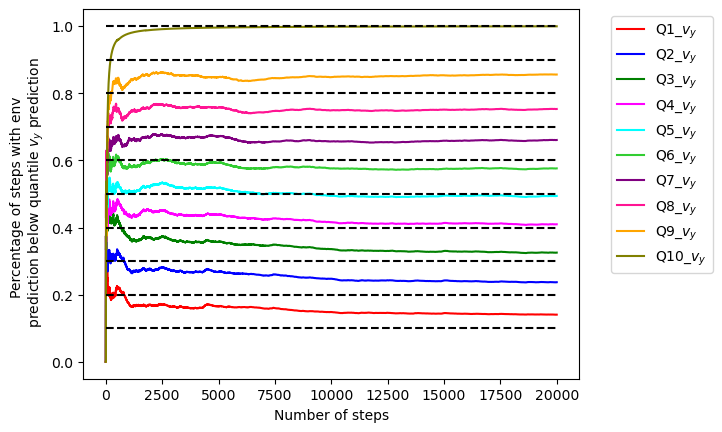

In [81]:
# vy
variable = "vy"
nb_belowq1_list_vy, nb_belowq2_list_vy, nb_belowq3_list_vy, nb_belowq4_list_vy, nb_belowq5_list_vy, nb_belowq6_list_vy, nb_belowq7_list_vy, nb_belowq8_list_vy, nb_belowq9_list_vy, nb_belowq10_list_vy = nb_below_quantile(env_vy, quantile0_vy, quantile1_vy, quantile2_vy, quantile3_vy, quantile4_vy, quantile5_vy, quantile6_vy, quantile7_vy, quantile8_vy, quantile9_vy, quantile10_vy)
plot_nb_below_quantiles(prob, nb_belowq1_list_vy, nb_belowq2_list_vy, nb_belowq3_list_vy, nb_belowq4_list_vy, nb_belowq5_list_vy, nb_belowq6_list_vy, nb_belowq7_list_vy, nb_belowq8_list_vy, nb_belowq9_list_vy, nb_belowq10_list_vy, variable)


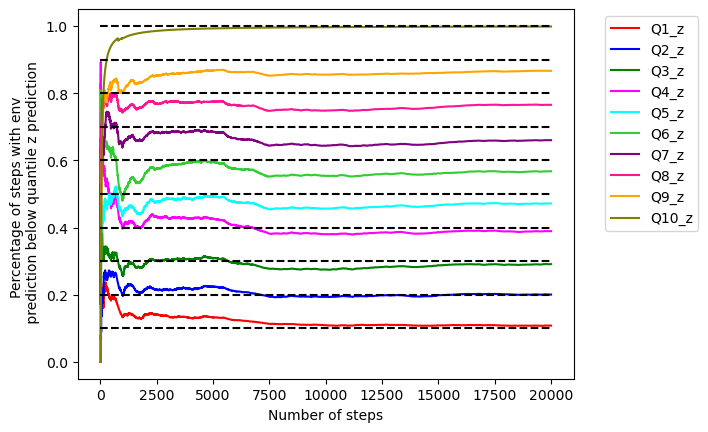

In [82]:
# z
variable = "z"
nb_belowq1_list_z, nb_belowq2_list_z, nb_belowq3_list_z, nb_belowq4_list_z, nb_belowq5_list_z, nb_belowq6_list_z, nb_belowq7_list_z, nb_belowq8_list_z, nb_belowq9_list_z, nb_belowq10_list_z = nb_below_quantile(env_z, quantile0_z, quantile1_z, quantile2_z, quantile3_z, quantile4_z, quantile5_z, quantile6_z, quantile7_z, quantile8_z, quantile9_z, quantile10_z)
plot_nb_below_quantiles(prob, nb_belowq1_list_z, nb_belowq2_list_z, nb_belowq3_list_z, nb_belowq4_list_z, nb_belowq5_list_z, nb_belowq6_list_z, nb_belowq7_list_z, nb_belowq8_list_z, nb_belowq9_list_z, nb_belowq10_list_z, variable)


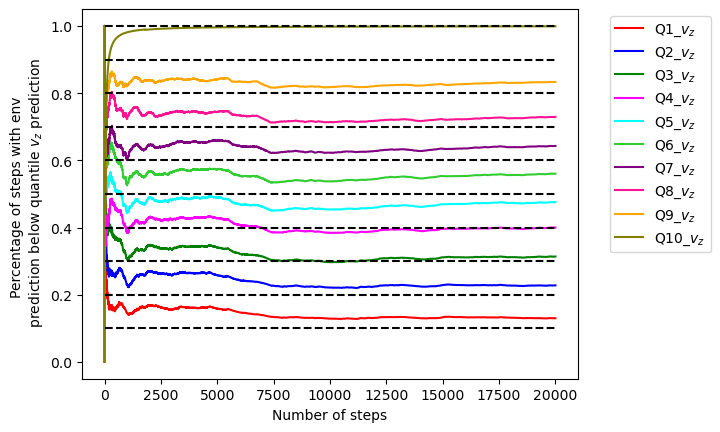

In [83]:
# vz
variable = "vz"
nb_belowq1_list_vz, nb_belowq2_list_vz, nb_belowq3_list_vz, nb_belowq4_list_vz, nb_belowq5_list_vz, nb_belowq6_list_vz, nb_belowq7_list_vz, nb_belowq8_list_vz, nb_belowq9_list_vz, nb_belowq10_list_vz = nb_below_quantile(env_vz, quantile0_vz, quantile1_vz, quantile2_vz, quantile3_vz, quantile4_vz, quantile5_vz, quantile6_vz, quantile7_vz, quantile8_vz, quantile9_vz, quantile10_vz)
plot_nb_below_quantiles(prob, nb_belowq1_list_vz, nb_belowq2_list_vz, nb_belowq3_list_vz, nb_belowq4_list_vz, nb_belowq5_list_vz, nb_belowq6_list_vz, nb_belowq7_list_vz, nb_belowq8_list_vz, nb_belowq9_list_vz, nb_belowq10_list_vz, variable)


## MuJoCo Reacher (2D)


In [42]:
prob = "MuJoCoReacher"

Run

In [ ]:
seed = 0
env = gym.make('Reacher-v5').unwrapped
env.reset(seed=seed)

error_magnitudes_cos1 = []
error_magnitudes_cos2 = []
error_magnitudes_sin1 = []
error_magnitudes_sin2 = []
error_magnitudes_omega1 = []
error_magnitudes_omega2 = []
error_magnitudes_xdist = []
error_magnitudes_ydist = []

env_cos1 = []
env_cos2 = []
env_sin1 = []
env_sin2 = []
env_omega1 = []
env_omega2 = []
env_xdist = []
env_ydist = []

pred_cos1 = []
pred_cos2 = []
pred_sin1 = []
pred_sin2 = []
pred_omega1 = []
pred_omega2 = []
pred_xdist = []
pred_ydist = []


# quantile 0 data
quantile0_cos1 = []
quantile0_cos2 = []
quantile0_sin1 = []
quantile0_sin2 = []
quantile0_omega1 = []
quantile0_omega2 = []
quantile0_xdist = []
quantile0_ydist = []

# quantile 1 data
quantile1_cos1 = []
quantile1_cos2 = []
quantile1_sin1 = []
quantile1_sin2 = []
quantile1_omega1 = []
quantile1_omega2 = []
quantile1_xdist = []
quantile1_ydist = []

# quantile 2 data
quantile2_cos1 = []
quantile2_cos2 = []
quantile2_sin1 = []
quantile2_sin2 = []
quantile2_omega1 = []
quantile2_omega2 = []
quantile2_xdist = []
quantile2_ydist = []

# quantile 3 data
quantile3_cos1 = []
quantile3_cos2 = []
quantile3_sin1 = []
quantile3_sin2 = []
quantile3_omega1 = []
quantile3_omega2 = []
quantile3_xdist = []
quantile3_ydist = []

# quantile 4 data
quantile4_cos1 = []
quantile4_cos2 = []
quantile4_sin1 = []
quantile4_sin2 = []
quantile4_omega1 = []
quantile4_omega2 = []
quantile4_xdist = []
quantile4_ydist = []

# quantile 5 data
quantile5_cos1 = []
quantile5_cos2 = []
quantile5_sin1 = []
quantile5_sin2 = []
quantile5_omega1 = []
quantile5_omega2 = []
quantile5_xdist = []
quantile5_ydist = []

# quantile 6 data
quantile6_cos1 = []
quantile6_cos2 = []
quantile6_sin1 = []
quantile6_sin2 = []
quantile6_omega1 = []
quantile6_omega2 = []
quantile6_xdist = []
quantile6_ydist = []

# quantile 7 data
quantile7_cos1 = []
quantile7_cos2 = []
quantile7_sin1 = []
quantile7_sin2 = []
quantile7_omega1 = []
quantile7_omega2 = []
quantile7_xdist = []
quantile7_ydist = []

# quantile 8 data
quantile8_cos1 = []
quantile8_cos2 = []
quantile8_sin1 = []
quantile8_sin2 = []
quantile8_omega1 = []
quantile8_omega2 = []
quantile8_xdist = []
quantile8_ydist = []

# quantile 9 data
quantile9_cos1 = []
quantile9_cos2 = []
quantile9_sin1 = []
quantile9_sin2 = []
quantile9_omega1 = []
quantile9_omega2 = []
quantile9_xdist = []
quantile9_ydist = []

# quantile 10 data
quantile10_cos1 = []
quantile10_cos2 = []
quantile10_sin1 = []
quantile10_sin2 = []
quantile10_omega1 = []
quantile10_omega2 = []
quantile10_xdist = []
quantile10_ydist = []


actions_lows = env.action_space.low
actions_highs = env.action_space.high
states_low = torch.tensor([-1, -1, -1, -1, -100, -100, -torch.inf, -torch.inf])
states_high = torch.tensor([1, 1, 1, 1, 100, 100, torch.inf, torch.inf])
state_dim = 8
action_dim = len(actions_lows)

quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []
batch_size = 32

num_test_steps = 20000
state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False
truncated = False

actions_taken = np.zeros((num_test_steps, action_dim))
env.action_space.seed(seed)
discrete = False

goal_state = np.array([state[4], state[5]])
state = np.array([state[0], state[1], state[2], state[3], state[6], state[7], state[8], state[9]])

for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
    
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    goal_state = np.array([next_state[4], next_state[5]])
    next_state = np.array([next_state[0], next_state[1], next_state[2], next_state[3], next_state[6], next_state[7], next_state[8], next_state[9]])
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        else:
            test_action = torch.tensor(action, dtype=torch.float32)
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)

        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_cos1 = np.append(pred_cos1, mid_quantile[0][0])
        pred_cos2 = np.append(pred_cos2, mid_quantile[0][1])
        pred_sin1 = np.append(pred_sin1, mid_quantile[0][2])
        pred_sin2 = np.append(pred_sin2, mid_quantile[0][3])
        pred_omega1 = np.append(pred_omega1, mid_quantile[0][4])
        pred_omega2 = np.append(pred_omega2, mid_quantile[0][5])
        pred_xdist = np.append(pred_xdist, mid_quantile[0][6])
        pred_ydist = np.append(pred_ydist, mid_quantile[0][7])
    
        # Quantile 0 data
        quantile0_cos1 = np.append(quantile0_cos1, predicted_quantiles[0][0][0].item())
        quantile0_cos2 = np.append(quantile0_cos2, predicted_quantiles[0][0][1].item())
        quantile0_sin1 = np.append(quantile0_sin1, predicted_quantiles[0][0][2].item())
        quantile0_sin2 = np.append(quantile0_sin2, predicted_quantiles[0][0][3].item())
        quantile0_omega1 = np.append(quantile0_omega1, predicted_quantiles[0][0][4].item())
        quantile0_omega2 = np.append(quantile0_omega2, predicted_quantiles[0][0][5].item())
        quantile0_xdist = np.append(quantile0_xdist, predicted_quantiles[0][0][6].item())
        quantile0_ydist = np.append(quantile0_ydist, predicted_quantiles[0][0][7].item())
        
        # Quantile 1 data
        quantile1_cos1 = np.append(quantile1_cos1, predicted_quantiles[0][1][0].item())
        quantile1_cos2 = np.append(quantile1_cos2, predicted_quantiles[0][1][1].item())
        quantile1_sin1 = np.append(quantile1_sin1, predicted_quantiles[0][1][2].item())
        quantile1_sin2 = np.append(quantile1_sin2, predicted_quantiles[0][1][3].item())
        quantile1_omega1 = np.append(quantile1_omega1, predicted_quantiles[0][1][4].item())
        quantile1_omega2 = np.append(quantile1_omega2, predicted_quantiles[0][1][5].item())
        quantile1_xdist = np.append(quantile1_xdist, predicted_quantiles[0][1][6].item())
        quantile1_ydist = np.append(quantile1_ydist, predicted_quantiles[0][1][7].item())
        
        # Quantile 2 data
        quantile2_cos1 = np.append(quantile2_cos1, predicted_quantiles[0][2][0].item())
        quantile2_cos2 = np.append(quantile2_cos2, predicted_quantiles[0][2][1].item())
        quantile2_sin1 = np.append(quantile2_sin1, predicted_quantiles[0][2][2].item())
        quantile2_sin2 = np.append(quantile2_sin2, predicted_quantiles[0][2][3].item())
        quantile2_omega1 = np.append(quantile2_omega1, predicted_quantiles[0][2][4].item())
        quantile2_omega2 = np.append(quantile2_omega2, predicted_quantiles[0][2][5].item())
        quantile2_xdist = np.append(quantile2_xdist, predicted_quantiles[0][2][6].item())
        quantile2_ydist = np.append(quantile2_ydist, predicted_quantiles[0][2][7].item())
        
        # Quantile 3 data
        quantile3_cos1 = np.append(quantile3_cos1, predicted_quantiles[0][3][0].item())
        quantile3_cos2 = np.append(quantile3_cos2, predicted_quantiles[0][3][1].item())
        quantile3_sin1 = np.append(quantile3_sin1, predicted_quantiles[0][3][2].item())
        quantile3_sin2 = np.append(quantile3_sin2, predicted_quantiles[0][3][3].item())
        quantile3_omega1 = np.append(quantile3_omega1, predicted_quantiles[0][3][4].item())
        quantile3_omega2 = np.append(quantile3_omega2, predicted_quantiles[0][3][5].item())
        quantile3_xdist = np.append(quantile3_xdist, predicted_quantiles[0][3][6].item())
        quantile3_ydist = np.append(quantile3_ydist, predicted_quantiles[0][3][7].item())
        
        # Quantile 4 data
        quantile4_cos1 = np.append(quantile4_cos1, predicted_quantiles[0][4][0].item())
        quantile4_cos2 = np.append(quantile4_cos2, predicted_quantiles[0][4][1].item())
        quantile4_sin1 = np.append(quantile4_sin1, predicted_quantiles[0][4][2].item())
        quantile4_sin2 = np.append(quantile4_sin2, predicted_quantiles[0][4][3].item())
        quantile4_omega1 = np.append(quantile4_omega1, predicted_quantiles[0][4][4].item())
        quantile4_omega2 = np.append(quantile4_omega2, predicted_quantiles[0][4][5].item())
        quantile4_xdist = np.append(quantile4_xdist, predicted_quantiles[0][4][6].item())
        quantile4_ydist = np.append(quantile4_ydist, predicted_quantiles[0][4][7].item())
        
        # Quantile 5 data
        quantile5_cos1 = np.append(quantile5_cos1, predicted_quantiles[0][5][0].item())
        quantile5_cos2 = np.append(quantile5_cos2, predicted_quantiles[0][5][1].item())
        quantile5_sin1 = np.append(quantile5_sin1, predicted_quantiles[0][5][2].item())
        quantile5_sin2 = np.append(quantile5_sin2, predicted_quantiles[0][5][3].item())
        quantile5_omega1 = np.append(quantile5_omega1, predicted_quantiles[0][5][4].item())
        quantile5_omega2 = np.append(quantile5_omega2, predicted_quantiles[0][5][5].item())
        quantile5_xdist = np.append(quantile5_xdist, predicted_quantiles[0][5][6].item())
        quantile5_ydist = np.append(quantile5_ydist, predicted_quantiles[0][5][7].item())
        
        # Quantile 6 data
        quantile6_cos1 = np.append(quantile6_cos1, predicted_quantiles[0][6][0].item())
        quantile6_cos2 = np.append(quantile6_cos2, predicted_quantiles[0][6][1].item())
        quantile6_sin1 = np.append(quantile6_sin1, predicted_quantiles[0][6][2].item())
        quantile6_sin2 = np.append(quantile6_sin2, predicted_quantiles[0][6][3].item())
        quantile6_omega1 = np.append(quantile6_omega1, predicted_quantiles[0][6][4].item())
        quantile6_omega2 = np.append(quantile6_omega2, predicted_quantiles[0][6][5].item())
        quantile6_xdist = np.append(quantile6_xdist, predicted_quantiles[0][6][6].item())
        quantile6_ydist = np.append(quantile6_ydist, predicted_quantiles[0][6][7].item())
        
        # Quantile 7 data
        quantile7_cos1 = np.append(quantile7_cos1, predicted_quantiles[0][7][0].item())
        quantile7_cos2 = np.append(quantile7_cos2, predicted_quantiles[0][7][1].item())
        quantile7_sin1 = np.append(quantile7_sin1, predicted_quantiles[0][7][2].item())
        quantile7_sin2 = np.append(quantile7_sin2, predicted_quantiles[0][7][3].item())
        quantile7_omega1 = np.append(quantile7_omega1, predicted_quantiles[0][7][4].item())
        quantile7_omega2 = np.append(quantile7_omega2, predicted_quantiles[0][7][5].item())
        quantile7_xdist = np.append(quantile7_xdist, predicted_quantiles[0][7][6].item())
        quantile7_ydist = np.append(quantile7_ydist, predicted_quantiles[0][7][7].item())
        
        # Quantile 8 data
        quantile8_cos1 = np.append(quantile8_cos1, predicted_quantiles[0][8][0].item())
        quantile8_cos2 = np.append(quantile8_cos2, predicted_quantiles[0][8][1].item())
        quantile8_sin1 = np.append(quantile8_sin1, predicted_quantiles[0][8][2].item())
        quantile8_sin2 = np.append(quantile8_sin2, predicted_quantiles[0][8][3].item())
        quantile8_omega1 = np.append(quantile8_omega1, predicted_quantiles[0][8][4].item())
        quantile8_omega2 = np.append(quantile8_omega2, predicted_quantiles[0][8][5].item())
        quantile8_xdist = np.append(quantile8_xdist, predicted_quantiles[0][8][6].item())
        quantile8_ydist = np.append(quantile8_ydist, predicted_quantiles[0][8][7].item())
        
        # Quantile 9 data
        quantile9_cos1 = np.append(quantile9_cos1, predicted_quantiles[0][9][0].item())
        quantile9_cos2 = np.append(quantile9_cos2, predicted_quantiles[0][9][1].item())
        quantile9_sin1 = np.append(quantile9_sin1, predicted_quantiles[0][9][2].item())
        quantile9_sin2 = np.append(quantile9_sin2, predicted_quantiles[0][9][3].item())
        quantile9_omega1 = np.append(quantile9_omega1, predicted_quantiles[0][9][4].item())
        quantile9_omega2 = np.append(quantile9_omega2, predicted_quantiles[0][9][5].item())
        quantile9_xdist = np.append(quantile9_xdist, predicted_quantiles[0][9][6].item())
        quantile9_ydist = np.append(quantile9_ydist, predicted_quantiles[0][9][7].item())
        
        # Quantile 10 data
        quantile10_cos1 = np.append(quantile10_cos1, predicted_quantiles[0][10][0].item())
        quantile10_cos2 = np.append(quantile10_cos2, predicted_quantiles[0][10][1].item())
        quantile10_sin1 = np.append(quantile10_sin1, predicted_quantiles[0][10][2].item())
        quantile10_sin2 = np.append(quantile10_sin2, predicted_quantiles[0][10][3].item())
        quantile10_omega1 = np.append(quantile10_omega1, predicted_quantiles[0][10][4].item())
        quantile10_omega2 = np.append(quantile10_omega2, predicted_quantiles[0][10][5].item())
        quantile10_xdist = np.append(quantile10_xdist, predicted_quantiles[0][10][6].item())
        quantile10_ydist = np.append(quantile10_ydist, predicted_quantiles[0][10][7].item())
        
        delta_cos1 = test_next_state[0] - mid_quantile[0][0]
        delta_cos2 = test_next_state[1] - mid_quantile[0][1]
        delta_sin1 = test_next_state[2] - mid_quantile[0][2]
        delta_sin2 = test_next_state[3] - mid_quantile[0][3]
        delta_omega1 = test_next_state[4] - mid_quantile[0][4]
        delta_omega2 = test_next_state[5] - mid_quantile[0][5]
        delta_xdist = test_next_state[6] - mid_quantile[0][6]
        delta_ydist = test_next_state[7] - mid_quantile[0][7]
        
        error_magnitudes_cos1.append(np.abs(delta_cos1))
        error_magnitudes_cos2.append(np.abs(delta_cos2))
        error_magnitudes_sin1.append(np.abs(delta_sin1))
        error_magnitudes_sin2.append(np.abs(delta_sin2))
        error_magnitudes_omega1.append(np.abs(delta_omega1))
        error_magnitudes_omega2.append(np.abs(delta_omega2))
        error_magnitudes_xdist.append(np.abs(delta_xdist))
        error_magnitudes_ydist.append(np.abs(delta_ydist))
        
        env_cos1.append(test_next_state[0])
        env_cos2.append(test_next_state[1])
        env_sin1.append(test_next_state[2])
        env_sin2.append(test_next_state[3])
        env_omega1.append(test_next_state[4])
        env_omega2.append(test_next_state[5])
        env_xdist.append(test_next_state[6])
        env_ydist.append(test_next_state[7])

    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)

        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    state = next_state

    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False
        truncated = False
        
        goal_state = np.array([state[4], state[5]])
        state = np.array([state[0], state[1], state[2], state[3], state[6], state[7], state[8], state[9]])


### Graph of number of values below the different quantiles


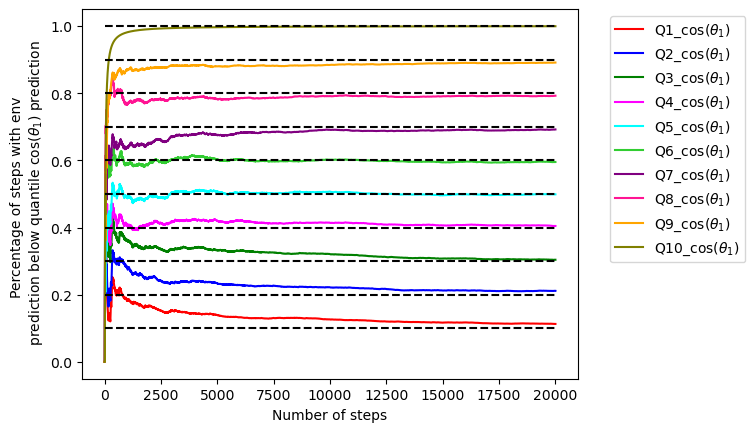

In [45]:
# cos1 
variable = "cos1"
nb_belowq1_list_cos1, nb_below_q2_list_cos1, nb_below_q3_list_cos1, nb_below_q4_list_cos1, nb_below_q5_list_cos1, nb_below_q6_list_cos1, nb_below_q7_list_cos1, nb_below_q8_list_cos1, nb_below_q9_list_cos1, nb_below_q10_list_cos1 = nb_below_quantile(env_cos1, quantile0_cos1, quantile1_cos1, quantile2_cos1, quantile3_cos1, quantile4_cos1, quantile5_cos1, quantile6_cos1, quantile7_cos1, quantile8_cos1, quantile9_cos1, quantile10_cos1)
plot_nb_below_quantiles(prob, nb_belowq1_list_cos1, nb_below_q2_list_cos1, nb_below_q3_list_cos1, nb_below_q4_list_cos1, nb_below_q5_list_cos1, nb_below_q6_list_cos1, nb_below_q7_list_cos1, nb_below_q8_list_cos1, nb_below_q9_list_cos1, nb_below_q10_list_cos1, variable)


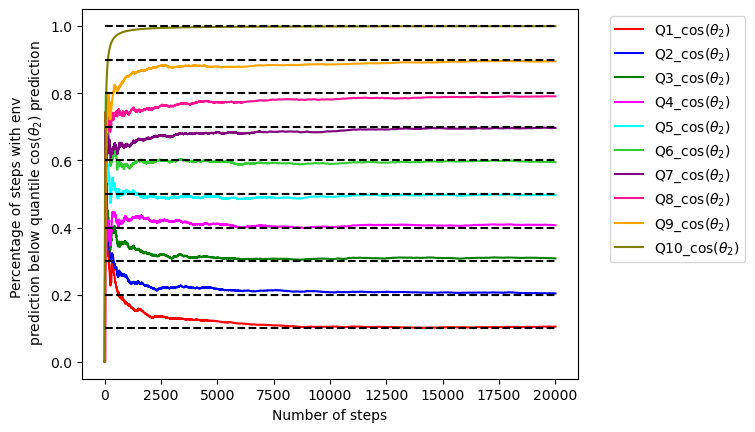

In [46]:
# cos2
variable = "cos2"
nb_belowq1_list_cos2, nb_below_q2_list_cos2, nb_below_q3_list_cos2, nb_below_q4_list_cos2, nb_below_q5_list_cos2, nb_below_q6_list_cos2, nb_below_q7_list_cos2, nb_below_q8_list_cos2, nb_below_q9_list_cos2, nb_below_q10_list_cos2 = nb_below_quantile(env_cos2, quantile0_cos2, quantile1_cos2, quantile2_cos2, quantile3_cos2, quantile4_cos2, quantile5_cos2, quantile6_cos2, quantile7_cos2, quantile8_cos2, quantile9_cos2, quantile10_cos2)
plot_nb_below_quantiles(prob, nb_belowq1_list_cos2, nb_below_q2_list_cos2, nb_below_q3_list_cos2, nb_below_q4_list_cos2, nb_below_q5_list_cos2, nb_below_q6_list_cos2, nb_below_q7_list_cos2, nb_below_q8_list_cos2, nb_below_q9_list_cos2, nb_below_q10_list_cos2, variable)


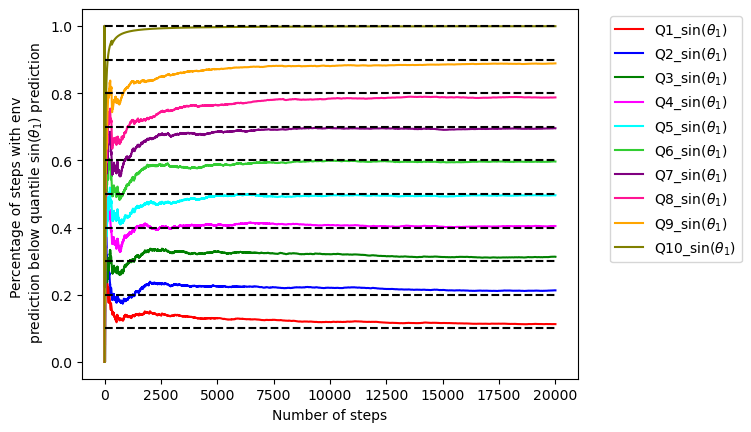

In [47]:
# sin1
variable = "sin1"
nb_belowq1_list_sin1, nb_below_q2_list_sin1, nb_below_q3_list_sin1, nb_below_q4_list_sin1, nb_below_q5_list_sin1, nb_below_q6_list_sin1, nb_below_q7_list_sin1, nb_below_q8_list_sin1, nb_below_q9_list_sin1, nb_below_q10_list_sin1 = nb_below_quantile(env_sin1, quantile0_sin1, quantile1_sin1, quantile2_sin1, quantile3_sin1, quantile4_sin1, quantile5_sin1, quantile6_sin1, quantile7_sin1, quantile8_sin1, quantile9_sin1, quantile10_sin1)
plot_nb_below_quantiles(prob, nb_belowq1_list_sin1, nb_below_q2_list_sin1, nb_below_q3_list_sin1, nb_below_q4_list_sin1, nb_below_q5_list_sin1, nb_below_q6_list_sin1, nb_below_q7_list_sin1, nb_below_q8_list_sin1, nb_below_q9_list_sin1, nb_below_q10_list_sin1, variable)


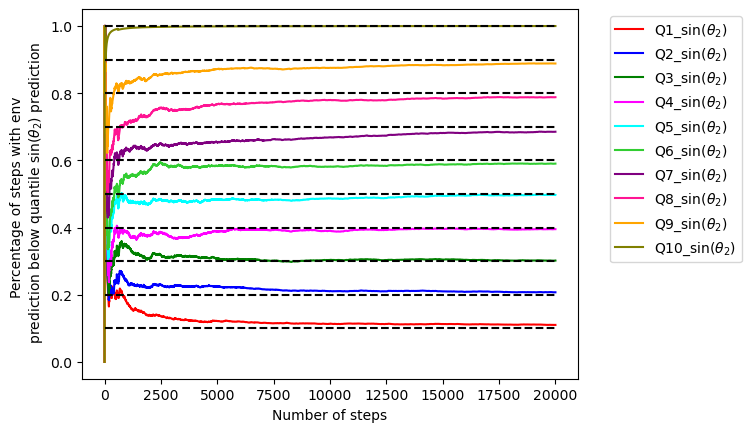

In [48]:
# sin2
variable = "sin2"
nb_belowq1_list_sin2, nb_below_q2_list_sin2, nb_below_q3_list_sin2, nb_below_q4_list_sin2, nb_below_q5_list_sin2, nb_below_q6_list_sin2, nb_below_q7_list_sin2, nb_below_q8_list_sin2, nb_below_q9_list_sin2, nb_below_q10_list_sin2 = nb_below_quantile(env_sin2, quantile0_sin2, quantile1_sin2, quantile2_sin2, quantile3_sin2, quantile4_sin2, quantile5_sin2, quantile6_sin2, quantile7_sin2, quantile8_sin2, quantile9_sin2, quantile10_sin2)
plot_nb_below_quantiles(prob, nb_belowq1_list_sin2, nb_below_q2_list_sin2, nb_below_q3_list_sin2, nb_below_q4_list_sin2, nb_below_q5_list_sin2, nb_below_q6_list_sin2, nb_below_q7_list_sin2, nb_below_q8_list_sin2, nb_below_q9_list_sin2, nb_below_q10_list_sin2, variable)


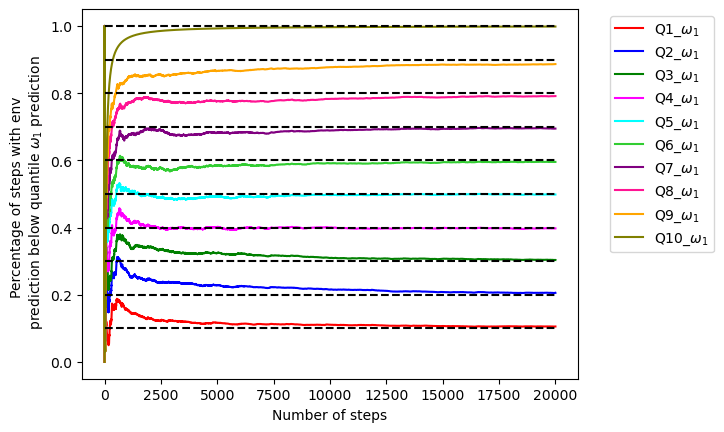

In [49]:
# omega1
variable = "omega1"
nb_belowq1_list_omega1, nb_below_q2_list_omega1, nb_below_q3_list_omega1, nb_below_q4_list_omega1, nb_below_q5_list_omega1, nb_below_q6_list_omega1, nb_below_q7_list_omega1, nb_below_q8_list_omega1, nb_below_q9_list_omega1, nb_below_q10_list_omega1 = nb_below_quantile(env_omega1, quantile0_omega1, quantile1_omega1, quantile2_omega1, quantile3_omega1, quantile4_omega1, quantile5_omega1, quantile6_omega1, quantile7_omega1, quantile8_omega1, quantile9_omega1, quantile10_omega1)
plot_nb_below_quantiles(prob, nb_belowq1_list_omega1, nb_below_q2_list_omega1, nb_below_q3_list_omega1, nb_below_q4_list_omega1, nb_below_q5_list_omega1, nb_below_q6_list_omega1, nb_below_q7_list_omega1, nb_below_q8_list_omega1, nb_below_q9_list_omega1, nb_below_q10_list_omega1, variable)


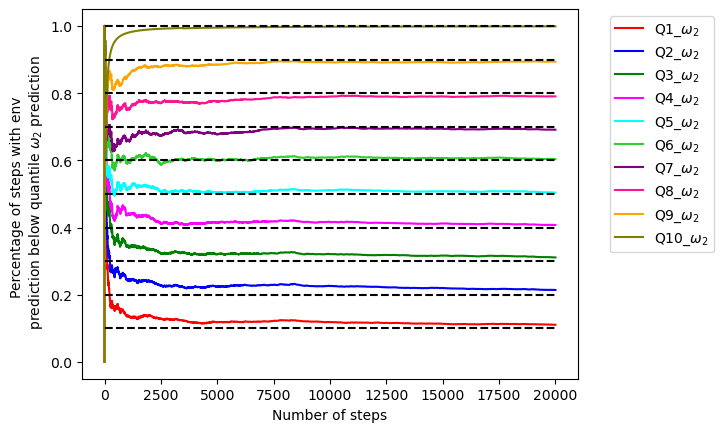

In [50]:
# omega2
variable = "omega2"
nb_belowq1_list_omega2, nb_below_q2_list_omega2, nb_below_q3_list_omega2, nb_below_q4_list_omega2, nb_below_q5_list_omega2, nb_below_q6_list_omega2, nb_below_q7_list_omega2, nb_below_q8_list_omega2, nb_below_q9_list_omega2, nb_below_q10_list_omega2 = nb_below_quantile(env_omega2, quantile0_omega2, quantile1_omega2, quantile2_omega2, quantile3_omega2, quantile4_omega2, quantile5_omega2, quantile6_omega2, quantile7_omega2, quantile8_omega2, quantile9_omega2, quantile10_omega2)
plot_nb_below_quantiles(prob, nb_belowq1_list_omega2, nb_below_q2_list_omega2, nb_below_q3_list_omega2, nb_below_q4_list_omega2, nb_below_q5_list_omega2, nb_below_q6_list_omega2, nb_below_q7_list_omega2, nb_below_q8_list_omega2, nb_below_q9_list_omega2, nb_below_q10_list_omega2, variable)


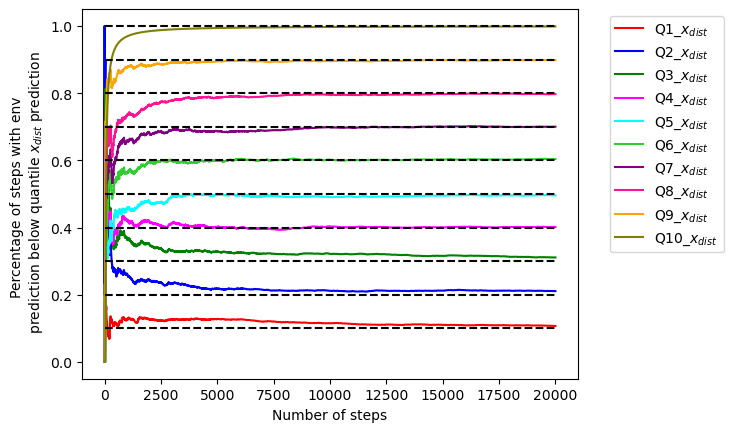

In [51]:
# xdist
variable = "xdist"
nb_belowq1_list_xdist, nb_below_q2_list_xdist, nb_below_q3_list_xdist, nb_below_q4_list_xdist, nb_below_q5_list_xdist, nb_below_q6_list_xdist, nb_below_q7_list_xdist, nb_below_q8_list_xdist, nb_below_q9_list_xdist, nb_below_q10_list_xdist = nb_below_quantile(env_xdist, quantile0_xdist, quantile1_xdist, quantile2_xdist, quantile3_xdist, quantile4_xdist, quantile5_xdist, quantile6_xdist, quantile7_xdist, quantile8_xdist, quantile9_xdist, quantile10_xdist)
plot_nb_below_quantiles(prob, nb_belowq1_list_xdist, nb_below_q2_list_xdist, nb_below_q3_list_xdist, nb_below_q4_list_xdist, nb_below_q5_list_xdist, nb_below_q6_list_xdist, nb_below_q7_list_xdist, nb_below_q8_list_xdist, nb_below_q9_list_xdist, nb_below_q10_list_xdist, variable)


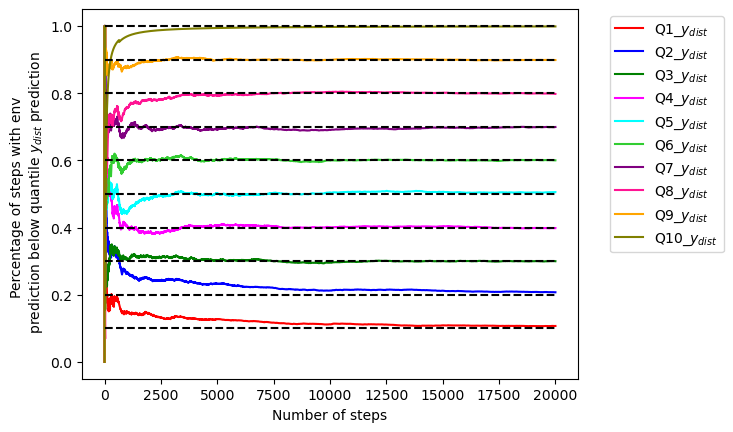

In [52]:
# ydist 
variable = "ydist"
nb_belowq1_list_ydist, nb_below_q2_list_ydist, nb_below_q3_list_ydist, nb_below_q4_list_ydist, nb_below_q5_list_ydist, nb_below_q6_list_ydist, nb_below_q7_list_ydist, nb_below_q8_list_ydist, nb_below_q9_list_ydist, nb_below_q10_list_ydist = nb_below_quantile(env_ydist, quantile0_ydist, quantile1_ydist, quantile2_ydist, quantile3_ydist, quantile4_ydist, quantile5_ydist, quantile6_ydist, quantile7_ydist, quantile8_ydist, quantile9_ydist, quantile10_ydist)
plot_nb_below_quantiles(prob, nb_belowq1_list_ydist, nb_below_q2_list_ydist, nb_below_q3_list_ydist, nb_below_q4_list_ydist, nb_below_q5_list_ydist, nb_below_q6_list_ydist, nb_below_q7_list_ydist, nb_below_q8_list_ydist, nb_below_q9_list_ydist, nb_below_q10_list_ydist, variable)


## Inverted Pendulum


In [53]:
prob = "InvertedPendulum"



In [ ]:
error_magnitudes_x = []
error_magnitudes_v = []
error_magnitudes_theta = []
error_magnitudes_omega = []

env_x = []
env_v = []
env_theta = []
env_omega = []
pred_x = []
pred_v = []
pred_theta = []
pred_omega = []

pred_x_bottom_1std = []
pred_x_top_1std = []
pred_x_bottom_2std = []
pred_x_top_2std = []
pred_v_bottom_1std = []
pred_v_top_1std = []
pred_v_bottom_2std = []
pred_v_top_2std = []

pred_theta_bottom_1std = []
pred_theta_top_1std = []
pred_theta_bottom_2std = []
pred_theta_top_2std = []
pred_omega_bottom_1std = []
pred_omega_top_1std = []
pred_omega_bottom_2std = []
pred_omega_top_2std = []

actions_list_episode = []
actions_list_all = []
rewards_list = []

# quantile 0 data
quantile0_x = []
quantile0_v = []
quantile0_theta = []
quantile0_omega = []

# quantile 1 data
quantile1_x = []
quantile1_v = []
quantile1_theta = []
quantile1_omega = []

# quantile 2 data
quantile2_x = []
quantile2_v = []
quantile2_theta = []
quantile2_omega = []

# quantile 3 data
quantile3_x = []
quantile3_v = []
quantile3_theta = []
quantile3_omega = []

# quantile 4 data
quantile4_x = []
quantile4_v = []
quantile4_theta = []
quantile4_omega = []

# quantile 5 data
quantile5_x = []
quantile5_v = []
quantile5_theta = []
quantile5_omega = []

# quantile 6 data
quantile6_x = []
quantile6_v = []
quantile6_theta = []
quantile6_omega = []

# quantile 7 data
quantile7_x = []
quantile7_v = []
quantile7_theta = []
quantile7_omega = []

# quantile 8 data
quantile8_x = []
quantile8_v = []
quantile8_theta = []
quantile8_omega = []

# quantile 9 data
quantile9_x = []
quantile9_v = []
quantile9_theta = []
quantile9_omega = []

# quantile 10 data
quantile10_x = []
quantile10_v = []
quantile10_theta = []
quantile10_omega = []

seed = 0
env = gym.make('InvertedPendulum-v5').unwrapped
env.reset(seed=seed)

# Hyperparameters
state_dim = env.observation_space.shape[0]
action_dim=1
quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32
num_particles = 100

# usingEnv = True
usingEnv=False

num_test_steps = 20000

states_low = torch.tensor([-torch.inf, -torch.inf, -torch.inf, -torch.inf])
states_high = torch.tensor([torch.inf, torch.inf, torch.inf, torch.inf])

state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False

actions_taken = np.zeros((num_test_steps,1))
env.action_space.seed(seed)
discrete = False

for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
        
    # Apply the first action from the optimized sequence
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    actions_list.append(action)
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        else:
            test_action = torch.tensor(action, dtype=torch.float32)
            
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)
        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_x = np.append(pred_x, mid_quantile[0][0])
        pred_v = np.append(pred_v, mid_quantile[0][1])  
        pred_theta = np.append(pred_theta, mid_quantile[0][2])
        pred_omega = np.append(pred_omega, mid_quantile[0][3])
        
        ######################
        # Quantile 0 data
        quantile0_x = np.append(quantile0_x, predicted_quantiles[0][0][0].item())
        quantile0_v = np.append(quantile0_v, predicted_quantiles[0][0][1].item())
        quantile0_theta = np.append(quantile0_theta, predicted_quantiles[0][0][2].item())
        quantile0_omega = np.append(quantile0_omega, predicted_quantiles[0][0][3].item())
        
        # Quantile 1 data
        quantile1_x = np.append(quantile1_x, predicted_quantiles[0][1][0].item())
        quantile1_v = np.append(quantile1_v, predicted_quantiles[0][1][1].item())
        quantile1_theta = np.append(quantile1_theta, predicted_quantiles[0][1][2].item())
        quantile1_omega = np.append(quantile1_omega, predicted_quantiles[0][1][3].item())
        
        # Quantile 2 data
        quantile2_x = np.append(quantile2_x, predicted_quantiles[0][2][0].item())
        quantile2_v = np.append(quantile2_v, predicted_quantiles[0][2][1].item())
        quantile2_theta = np.append(quantile2_theta, predicted_quantiles[0][2][2].item())
        quantile2_omega = np.append(quantile2_omega, predicted_quantiles[0][2][3].item())
        
        # Quantile 3 data
        quantile3_x = np.append(quantile3_x, predicted_quantiles[0][3][0].item())
        quantile3_v = np.append(quantile3_v, predicted_quantiles[0][3][1].item())
        quantile3_theta = np.append(quantile3_theta, predicted_quantiles[0][3][2].item())
        quantile3_omega = np.append(quantile3_omega, predicted_quantiles[0][3][3].item())
                    
        # Quantile 4 data
        quantile4_x = np.append(quantile4_x, predicted_quantiles[0][4][0].item())
        quantile4_v = np.append(quantile4_v, predicted_quantiles[0][4][1].item())
        quantile4_theta = np.append(quantile4_theta, predicted_quantiles[0][4][2].item())
        quantile4_omega = np.append(quantile4_omega, predicted_quantiles[0][4][3].item())
        
        # Quantile 5 data
        quantile5_x = np.append(quantile5_x, predicted_quantiles[0][5][0].item())
        quantile5_v = np.append(quantile5_v, predicted_quantiles[0][5][1].item())
        quantile5_theta = np.append(quantile5_theta, predicted_quantiles[0][5][2].item())
        quantile5_omega = np.append(quantile5_omega, predicted_quantiles[0][5][3].item())
        
        # Quantile 6 data
        quantile6_x = np.append(quantile6_x, predicted_quantiles[0][6][0].item())
        quantile6_v = np.append(quantile6_v, predicted_quantiles[0][6][1].item())
        quantile6_theta = np.append(quantile6_theta, predicted_quantiles[0][6][2].item())
        quantile6_omega = np.append(quantile6_omega, predicted_quantiles[0][6][3].item())
        
        # Quantile 7 data
        quantile7_x = np.append(quantile7_x, predicted_quantiles[0][7][0].item())
        quantile7_v = np.append(quantile7_v, predicted_quantiles[0][7][1].item())
        quantile7_theta = np.append(quantile7_theta, predicted_quantiles[0][7][2].item())
        quantile7_omega = np.append(quantile7_omega, predicted_quantiles[0][7][3].item())
        
        # Quantile 8 data
        quantile8_x = np.append(quantile8_x, predicted_quantiles[0][8][0].item())
        quantile8_v = np.append(quantile8_v, predicted_quantiles[0][8][1].item())
        quantile8_theta = np.append(quantile8_theta, predicted_quantiles[0][8][2].item())
        quantile8_omega = np.append(quantile8_omega, predicted_quantiles[0][8][3].item())
        
        # Quantile 9 data
        quantile9_x = np.append(quantile9_x, predicted_quantiles[0][9][0].item())
        quantile9_v = np.append(quantile9_v, predicted_quantiles[0][9][1].item())
        quantile9_theta = np.append(quantile9_theta, predicted_quantiles[0][9][2].item())
        quantile9_omega = np.append(quantile9_omega, predicted_quantiles[0][9][3].item())
        
        # Quantile 10 data
        quantile10_x = np.append(quantile10_x, predicted_quantiles[0][10][0].item())
        quantile10_v = np.append(quantile10_v, predicted_quantiles[0][10][1].item())
        quantile10_theta = np.append(quantile10_theta, predicted_quantiles[0][10][2].item())
        quantile10_omega = np.append(quantile10_omega, predicted_quantiles[0][10][3].item())
        
        ######################
        
        deltax = test_next_state[0] - mid_quantile[0][0]
        deltav = test_next_state[1] - mid_quantile[0][1]
        deltatheta = test_next_state[2] - mid_quantile[0][2]
        deltaomega = test_next_state[3] - mid_quantile[0][3]

        error_magnitudes_x.append(np.abs(deltax))
        error_magnitudes_v.append(np.abs(deltav))
        error_magnitudes_theta.append(np.abs(deltatheta))
        error_magnitudes_omega.append(np.abs(deltaomega))
        
        env_x.append(test_next_state[0])
        env_v.append(test_next_state[1])
        env_theta.append(test_next_state[2])
        env_omega.append(test_next_state[3])
    
    # Store experience in replay buffer
    replay_buffer.append((state, np.array([action]), reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32).reshape(batch_size, -1)  # Ensure actions are in the correct shape
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)
        
        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    state = next_state

    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False


### Graph of number of values below the different quantiles


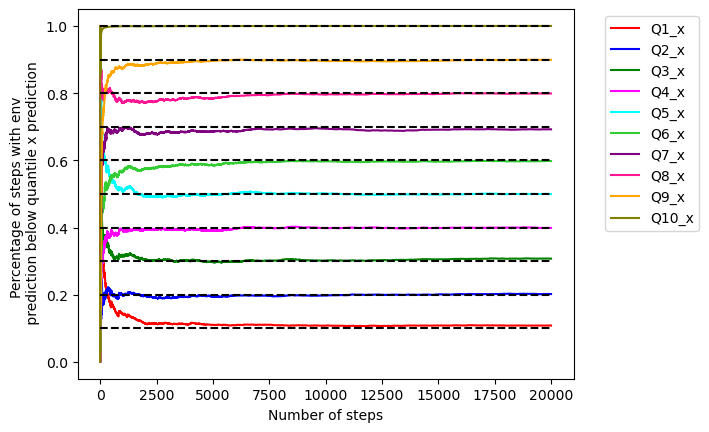

In [56]:
# x 
variable = "x"
nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x = nb_below_quantile(env_x, quantile0_x, quantile1_x, quantile2_x, quantile3_x, quantile4_x, quantile5_x, quantile6_x, quantile7_x, quantile8_x, quantile9_x, quantile10_x)
plot_nb_below_quantiles(prob, nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x, variable)



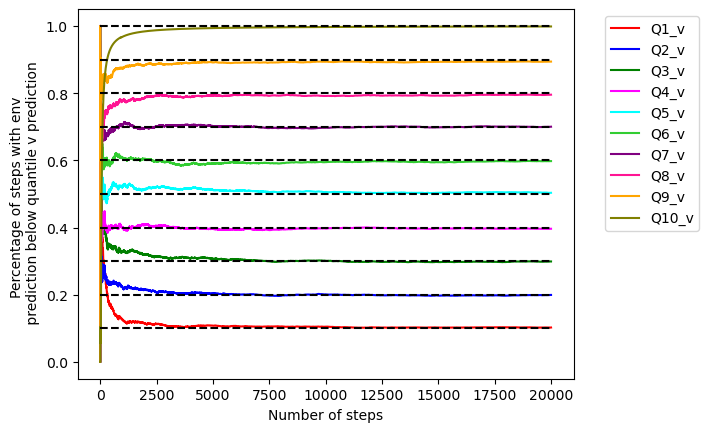

In [57]:
# v
variable = "v"
nb_belowq1_list_v, nb_belowq2_list_v, nb_belowq3_list_v, nb_belowq4_list_v, nb_belowq5_list_v, nb_belowq6_list_v, nb_belowq7_list_v, nb_belowq8_list_v, nb_belowq9_list_v, nb_belowq10_list_v = nb_below_quantile(env_v, quantile0_v, quantile1_v, quantile2_v, quantile3_v, quantile4_v, quantile5_v, quantile6_v, quantile7_v, quantile8_v, quantile9_v, quantile10_v)
plot_nb_below_quantiles(prob, nb_belowq1_list_v, nb_belowq2_list_v, nb_belowq3_list_v, nb_belowq4_list_v, nb_belowq5_list_v, nb_belowq6_list_v, nb_belowq7_list_v, nb_belowq8_list_v, nb_belowq9_list_v, nb_belowq10_list_v, variable)


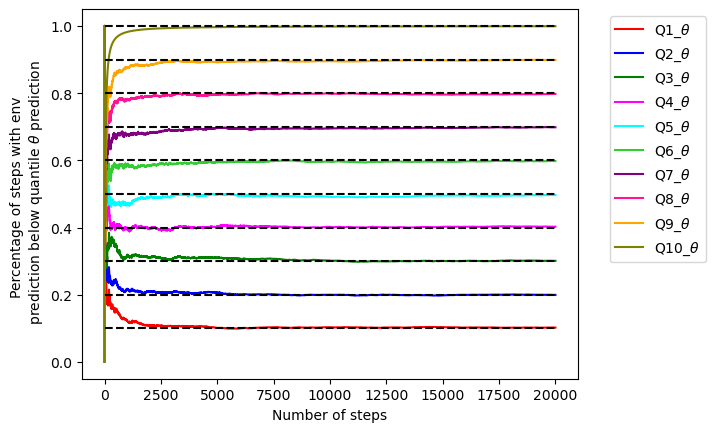

In [58]:
# theta
variable = "theta"
nb_belowq1_list_theta, nb_belowq2_list_theta, nb_belowq3_list_theta, nb_belowq4_list_theta, nb_belowq5_list_theta, nb_belowq6_list_theta, nb_belowq7_list_theta, nb_belowq8_list_theta, nb_belowq9_list_theta, nb_belowq10_list_theta = nb_below_quantile(env_theta, quantile0_theta, quantile1_theta, quantile2_theta, quantile3_theta, quantile4_theta, quantile5_theta, quantile6_theta, quantile7_theta, quantile8_theta, quantile9_theta, quantile10_theta)
plot_nb_below_quantiles(prob, nb_belowq1_list_theta, nb_belowq2_list_theta, nb_belowq3_list_theta, nb_belowq4_list_theta, nb_belowq5_list_theta, nb_belowq6_list_theta, nb_belowq7_list_theta, nb_belowq8_list_theta, nb_belowq9_list_theta, nb_belowq10_list_theta, variable)


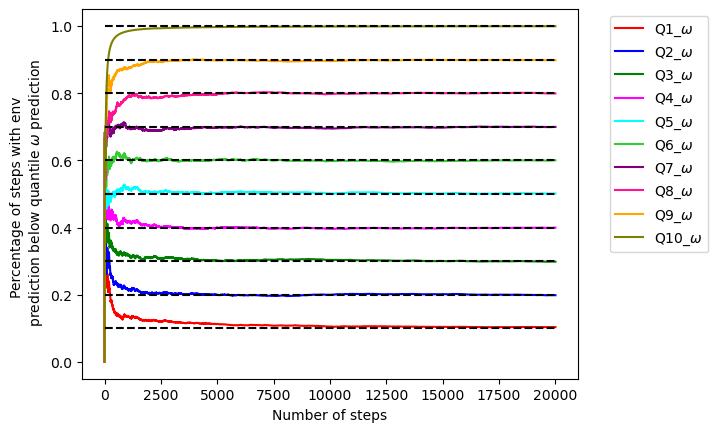

In [59]:
# omega
variable = "omega"
nb_belowq1_list_omega, nb_belowq2_list_omega, nb_belowq3_list_omega, nb_belowq4_list_omega, nb_belowq5_list_omega, nb_belowq6_list_omega, nb_belowq7_list_omega, nb_belowq8_list_omega, nb_belowq9_list_omega, nb_belowq10_list_omega = nb_below_quantile(env_omega, quantile0_omega, quantile1_omega, quantile2_omega, quantile3_omega, quantile4_omega, quantile5_omega, quantile6_omega, quantile7_omega, quantile8_omega, quantile9_omega, quantile10_omega)
plot_nb_below_quantiles(prob, nb_belowq1_list_omega, nb_belowq2_list_omega, nb_belowq3_list_omega, nb_belowq4_list_omega, nb_belowq5_list_omega, nb_belowq6_list_omega, nb_belowq7_list_omega, nb_belowq8_list_omega, nb_belowq9_list_omega, nb_belowq10_list_omega, variable)


## Lunar lander


In [60]:
prob = "LunarLander"

In [ ]:
seed = 0
env = gym.make('LunarLander-v3', continuous=True).unwrapped
env.reset(seed=seed)

error_magnitudes_x = []
error_magnitudes_y = []
error_magnitudes_vx = []
error_magnitudes_vy = []
error_magnitudes_omegax = []
error_magnitudes_omegay = []
error_magnitudes_leftcontact = []
error_magnitudes_rightcontact = []

env_x = []
env_y = []
env_vx = []
env_vy = []
env_omegax = []
env_omegay = []
env_leftcontact = []
env_rightcontact = []

pred_x = []
pred_y = []
pred_vx = []
pred_vy = []
pred_omegax = []
pred_omegay = []
pred_leftcontact = []
pred_rightcontact = []

# quantile 0 data
quantile0_x = []
quantile0_y = []
quantile0_vx = []
quantile0_vy = []
quantile0_omegax = []
quantile0_omegay = []
quantile0_leftcontact = []
quantile0_rightcontact = []

# quantile 1 data
quantile1_x = []
quantile1_y = []
quantile1_vx = []
quantile1_vy = []
quantile1_omegax = []
quantile1_omegay = []
quantile1_leftcontact = []
quantile1_rightcontact = []

# quantile 2 data
quantile2_x = []
quantile2_y = []
quantile2_vx = []
quantile2_vy = []
quantile2_omegax = []
quantile2_omegay = []
quantile2_leftcontact = []
quantile2_rightcontact = []

# quantile 3 data
quantile3_x = []
quantile3_y = []
quantile3_vx = []
quantile3_vy = []
quantile3_omegax = []
quantile3_omegay = []
quantile3_leftcontact = []
quantile3_rightcontact = []

# quantile 4 data
quantile4_x = []
quantile4_y = []
quantile4_vx = []
quantile4_vy = []
quantile4_omegax = []
quantile4_omegay = []
quantile4_leftcontact = []
quantile4_rightcontact = []

# quantile 5 data
quantile5_x = []
quantile5_y = []
quantile5_vx = []
quantile5_vy = []
quantile5_omegax = []
quantile5_omegay = []
quantile5_leftcontact = []
quantile5_rightcontact = []

# quantile 6 data
quantile6_x = []
quantile6_y = []
quantile6_vx = []
quantile6_vy = []
quantile6_omegax = []
quantile6_omegay = []
quantile6_leftcontact = []
quantile6_rightcontact = []

# quantile 7 data
quantile7_x = []
quantile7_y = []
quantile7_vx = []
quantile7_vy = []
quantile7_omegax = []
quantile7_omegay = []
quantile7_leftcontact = []
quantile7_rightcontact = []

# quantile 8 data
quantile8_x = []
quantile8_y = []
quantile8_vx = []
quantile8_vy = []
quantile8_omegax = []
quantile8_omegay = []
quantile8_leftcontact = []
quantile8_rightcontact = []

# quantile 9 data
quantile9_x = []
quantile9_y = []
quantile9_vx = []
quantile9_vy = []
quantile9_omegax = []
quantile9_omegay = []
quantile9_leftcontact = []
quantile9_rightcontact = []

# quantile 10 data
quantile10_x = []
quantile10_y = []
quantile10_vx = []
quantile10_vy = []
quantile10_omegax = []
quantile10_omegay = []
quantile10_leftcontact = []
quantile10_rightcontact = []


actions_low = env.action_space.low
actions_high = env.action_space.high
states_low = env.observation_space.low
states_high = env.observation_space.high
state_dim = env.observation_space.shape[0]
action_dim = len(actions_low)
states_low = torch.tensor([-2.5, -2.5, -10, -10, -6.2831855, -10, 0, 0])
states_high = torch.tensor([2.5, 2.5, 10, 10, 6.2831855, 10, 1, 1])

quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32

num_test_steps = 20000
state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False
truncated = False

discrete = False
actions_taken = np.zeros((num_test_steps, action_dim))
env.action_space.seed(seed)

for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
    
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        else:
            test_action = torch.tensor(action, dtype=torch.float32)
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)

        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_x = np.append(pred_x, mid_quantile[0][0])
        pred_y = np.append(pred_y, mid_quantile[0][1])
        pred_vx = np.append(pred_vx, mid_quantile[0][2])
        pred_vy = np.append(pred_vy, mid_quantile[0][3])
        pred_omegax = np.append(pred_omegax, mid_quantile[0][4])
        pred_omegay = np.append(pred_omegay, mid_quantile[0][5])
        pred_leftcontact = np.append(pred_leftcontact, mid_quantile[0][6])
        pred_rightcontact = np.append(pred_rightcontact, mid_quantile[0][7])
        
        # Quantile 0 data
        quantile0_x = np.append(quantile0_x, predicted_quantiles[0][0][0].item())
        quantile0_y = np.append(quantile0_y, predicted_quantiles[0][0][1].item())
        quantile0_vx = np.append(quantile0_vx, predicted_quantiles[0][0][2].item())
        quantile0_vy = np.append(quantile0_vy, predicted_quantiles[0][0][3].item())
        quantile0_omegax = np.append(quantile0_omegax, predicted_quantiles[0][0][4].item())
        quantile0_omegay = np.append(quantile0_omegay, predicted_quantiles[0][0][5].item())
        quantile0_leftcontact = np.append(quantile0_leftcontact, predicted_quantiles[0][0][6].item())
        quantile0_rightcontact = np.append(quantile0_rightcontact, predicted_quantiles[0][0][7].item())
        
        # Quantile 1 data
        quantile1_x = np.append(quantile1_x, predicted_quantiles[0][1][0].item())
        quantile1_y = np.append(quantile1_y, predicted_quantiles[0][1][1].item())
        quantile1_vx = np.append(quantile1_vx, predicted_quantiles[0][1][2].item())
        quantile1_vy = np.append(quantile1_vy, predicted_quantiles[0][1][3].item())
        quantile1_omegax = np.append(quantile1_omegax, predicted_quantiles[0][1][4].item())
        quantile1_omegay = np.append(quantile1_omegay, predicted_quantiles[0][1][5].item())
        quantile1_leftcontact = np.append(quantile1_leftcontact, predicted_quantiles[0][1][6].item())
        quantile1_rightcontact = np.append(quantile1_rightcontact, predicted_quantiles[0][1][7].item())
        
        # Quantile 2 data
        quantile2_x = np.append(quantile2_x, predicted_quantiles[0][2][0].item())
        quantile2_y = np.append(quantile2_y, predicted_quantiles[0][2][1].item())
        quantile2_vx = np.append(quantile2_vx, predicted_quantiles[0][2][2].item())
        quantile2_vy = np.append(quantile2_vy, predicted_quantiles[0][2][3].item())
        quantile2_omegax = np.append(quantile2_omegax, predicted_quantiles[0][2][4].item())
        quantile2_omegay = np.append(quantile2_omegay, predicted_quantiles[0][2][5].item())
        quantile2_leftcontact = np.append(quantile2_leftcontact, predicted_quantiles[0][2][6].item())
        quantile2_rightcontact = np.append(quantile2_rightcontact, predicted_quantiles[0][2][7].item())
        
        # Quantile 3 data
        quantile3_x = np.append(quantile3_x, predicted_quantiles[0][3][0].item())
        quantile3_y = np.append(quantile3_y, predicted_quantiles[0][3][1].item())
        quantile3_vx = np.append(quantile3_vx, predicted_quantiles[0][3][2].item())
        quantile3_vy = np.append(quantile3_vy, predicted_quantiles[0][3][3].item())
        quantile3_omegax = np.append(quantile3_omegax, predicted_quantiles[0][3][4].item())
        quantile3_omegay = np.append(quantile3_omegay, predicted_quantiles[0][3][5].item())
        quantile3_leftcontact = np.append(quantile3_leftcontact, predicted_quantiles[0][3][6].item())
        quantile3_rightcontact = np.append(quantile3_rightcontact, predicted_quantiles[0][3][7].item())
        
        # Quantile 4 data
        quantile4_x = np.append(quantile4_x, predicted_quantiles[0][4][0].item())
        quantile4_y = np.append(quantile4_y, predicted_quantiles[0][4][1].item())
        quantile4_vx = np.append(quantile4_vx, predicted_quantiles[0][4][2].item())
        quantile4_vy = np.append(quantile4_vy, predicted_quantiles[0][4][3].item())
        quantile4_omegax = np.append(quantile4_omegax, predicted_quantiles[0][4][4].item())
        quantile4_omegay = np.append(quantile4_omegay, predicted_quantiles[0][4][5].item())
        quantile4_leftcontact = np.append(quantile4_leftcontact, predicted_quantiles[0][4][6].item())
        quantile4_rightcontact = np.append(quantile4_rightcontact, predicted_quantiles[0][4][7].item())
        
        # Quantile 5 data
        quantile5_x = np.append(quantile5_x, predicted_quantiles[0][5][0].item())
        quantile5_y = np.append(quantile5_y, predicted_quantiles[0][5][1].item())
        quantile5_vx = np.append(quantile5_vx, predicted_quantiles[0][5][2].item())
        quantile5_vy = np.append(quantile5_vy, predicted_quantiles[0][5][3].item())
        quantile5_omegax = np.append(quantile5_omegax, predicted_quantiles[0][5][4].item())
        quantile5_omegay = np.append(quantile5_omegay, predicted_quantiles[0][5][5].item())
        quantile5_leftcontact = np.append(quantile5_leftcontact, predicted_quantiles[0][5][6].item())
        quantile5_rightcontact = np.append(quantile5_rightcontact, predicted_quantiles[0][5][7].item())
        
        # Quantile 6 data
        quantile6_x = np.append(quantile6_x, predicted_quantiles[0][6][0].item())
        quantile6_y = np.append(quantile6_y, predicted_quantiles[0][6][1].item())
        quantile6_vx = np.append(quantile6_vx, predicted_quantiles[0][6][2].item())
        quantile6_vy = np.append(quantile6_vy, predicted_quantiles[0][6][3].item())
        quantile6_omegax = np.append(quantile6_omegax, predicted_quantiles[0][6][4].item())
        quantile6_omegay = np.append(quantile6_omegay, predicted_quantiles[0][6][5].item())
        quantile6_leftcontact = np.append(quantile6_leftcontact, predicted_quantiles[0][6][6].item())
        quantile6_rightcontact = np.append(quantile6_rightcontact, predicted_quantiles[0][6][7].item())
        
        # Quantile 7 data
        quantile7_x = np.append(quantile7_x, predicted_quantiles[0][7][0].item())
        quantile7_y = np.append(quantile7_y, predicted_quantiles[0][7][1].item())
        quantile7_vx = np.append(quantile7_vx, predicted_quantiles[0][7][2].item())
        quantile7_vy = np.append(quantile7_vy, predicted_quantiles[0][7][3].item())
        quantile7_omegax = np.append(quantile7_omegax, predicted_quantiles[0][7][4].item())
        quantile7_omegay = np.append(quantile7_omegay, predicted_quantiles[0][7][5].item())
        quantile7_leftcontact = np.append(quantile7_leftcontact, predicted_quantiles[0][7][6].item())
        quantile7_rightcontact = np.append(quantile7_rightcontact, predicted_quantiles[0][7][7].item())
        
        # Quantile 8 data
        quantile8_x = np.append(quantile8_x, predicted_quantiles[0][8][0].item())
        quantile8_y = np.append(quantile8_y, predicted_quantiles[0][8][1].item())
        quantile8_vx = np.append(quantile8_vx, predicted_quantiles[0][8][2].item())
        quantile8_vy = np.append(quantile8_vy, predicted_quantiles[0][8][3].item())
        quantile8_omegax = np.append(quantile8_omegax, predicted_quantiles[0][8][4].item())
        quantile8_omegay = np.append(quantile8_omegay, predicted_quantiles[0][8][5].item())
        quantile8_leftcontact = np.append(quantile8_leftcontact, predicted_quantiles[0][8][6].item())
        quantile8_rightcontact = np.append(quantile8_rightcontact, predicted_quantiles[0][8][7].item())
        
        # Quantile 9 data
        quantile9_x = np.append(quantile9_x, predicted_quantiles[0][9][0].item())
        quantile9_y = np.append(quantile9_y, predicted_quantiles[0][9][1].item())
        quantile9_vx = np.append(quantile9_vx, predicted_quantiles[0][9][2].item())
        quantile9_vy = np.append(quantile9_vy, predicted_quantiles[0][9][3].item())
        quantile9_omegax = np.append(quantile9_omegax, predicted_quantiles[0][9][4].item())
        quantile9_omegay = np.append(quantile9_omegay, predicted_quantiles[0][9][5].item())
        quantile9_leftcontact = np.append(quantile9_leftcontact, predicted_quantiles[0][9][6].item())
        quantile9_rightcontact = np.append(quantile9_rightcontact, predicted_quantiles[0][9][7].item())
        
        # Quantile 10 data
        quantile10_x = np.append(quantile10_x, predicted_quantiles[0][10][0].item())
        quantile10_y = np.append(quantile10_y, predicted_quantiles[0][10][1].item())
        quantile10_vx = np.append(quantile10_vx, predicted_quantiles[0][10][2].item())
        quantile10_vy = np.append(quantile10_vy, predicted_quantiles[0][10][3].item())
        quantile10_omegax = np.append(quantile10_omegax, predicted_quantiles[0][10][4].item())
        quantile10_omegay = np.append(quantile10_omegay, predicted_quantiles[0][10][5].item())
        quantile10_leftcontact = np.append(quantile10_leftcontact, predicted_quantiles[0][10][6].item())
        quantile10_rightcontact = np.append(quantile10_rightcontact, predicted_quantiles[0][10][7].item())
        
    
        deltax = test_next_state[0] - mid_quantile[0][0]
        deltay = test_next_state[1] - mid_quantile[0][1]
        deltavx = test_next_state[2] - mid_quantile[0][2]
        deltavy = test_next_state[3] - mid_quantile[0][3]
        deltaomegax = test_next_state[4] - mid_quantile[0][4]
        deltaomegay = test_next_state[5] - mid_quantile[0][5]
        deltaleftcontact = test_next_state[3] - mid_quantile[0][6]
        deltarightcontact = test_next_state[4] - mid_quantile[0][7]
        
        error_magnitudes_x.append(np.abs(deltax))
        error_magnitudes_y.append(np.abs(deltay))
        error_magnitudes_vx.append(np.abs(deltavx))
        error_magnitudes_vy.append(np.abs(deltavy))
        error_magnitudes_omegax.append(np.abs(deltaomegax))
        error_magnitudes_omegay.append(np.abs(deltaomegay))
        error_magnitudes_leftcontact.append(np.abs(deltaleftcontact))
        error_magnitudes_rightcontact.append(np.abs(deltarightcontact))
        
        env_x.append(test_next_state[0])
        env_y.append(test_next_state[1])
        env_vx.append(test_next_state[2])
        env_vy.append(test_next_state[3])
        env_omegax.append(test_next_state[4])
        env_omegay.append(test_next_state[5])
        env_leftcontact.append(test_next_state[6])
        env_rightcontact.append(test_next_state[7])
        
    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    state = next_state

    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False
        truncated = False



Graph of number of values below the different quantiles


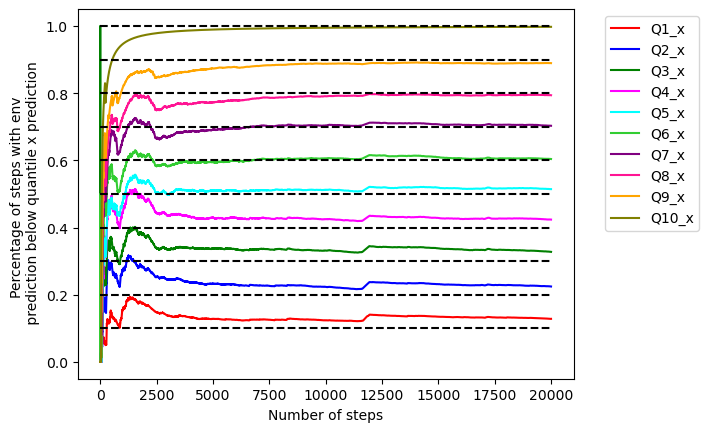

In [65]:
# x 
variable = "x"
nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x = nb_below_quantile(env_x, quantile0_x, quantile1_x, quantile2_x, quantile3_x, quantile4_x, quantile5_x, quantile6_x, quantile7_x, quantile8_x, quantile9_x, quantile10_x)
plot_nb_below_quantiles(prob, nb_belowq1_list_x, nb_belowq2_list_x, nb_belowq3_list_x, nb_belowq4_list_x, nb_belowq5_list_x, nb_belowq6_list_x, nb_belowq7_list_x, nb_belowq8_list_x, nb_belowq9_list_x, nb_belowq10_list_x, variable)



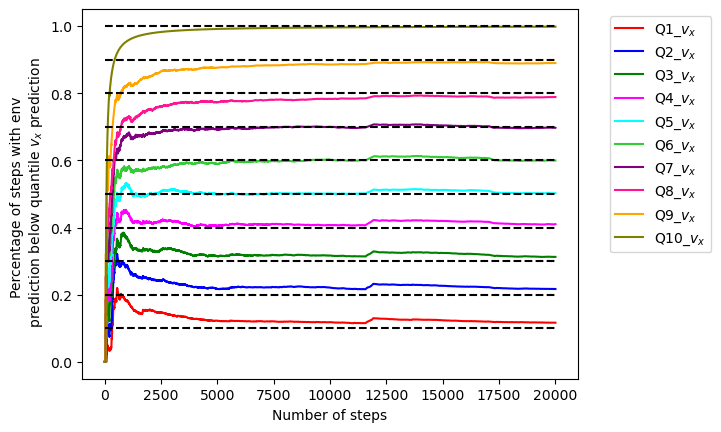

In [66]:
# vx
variable = "vx"
nb_belowq1_list_vx, nb_belowq2_list_vx, nb_belowq3_list_vx, nb_belowq4_list_vx, nb_belowq5_list_vx, nb_belowq6_list_vx, nb_belowq7_list_vx, nb_belowq8_list_vx, nb_belowq9_list_vx, nb_belowq10_list_vx = nb_below_quantile(env_vx, quantile0_vx, quantile1_vx, quantile2_vx, quantile3_vx, quantile4_vx, quantile5_vx, quantile6_vx, quantile7_vx, quantile8_vx, quantile9_vx, quantile10_vx)
plot_nb_below_quantiles(prob, nb_belowq1_list_vx, nb_belowq2_list_vx, nb_belowq3_list_vx, nb_belowq4_list_vx, nb_belowq5_list_vx, nb_belowq6_list_vx, nb_belowq7_list_vx, nb_belowq8_list_vx, nb_belowq9_list_vx, nb_belowq10_list_vx, variable)


Need to change the one below to y's


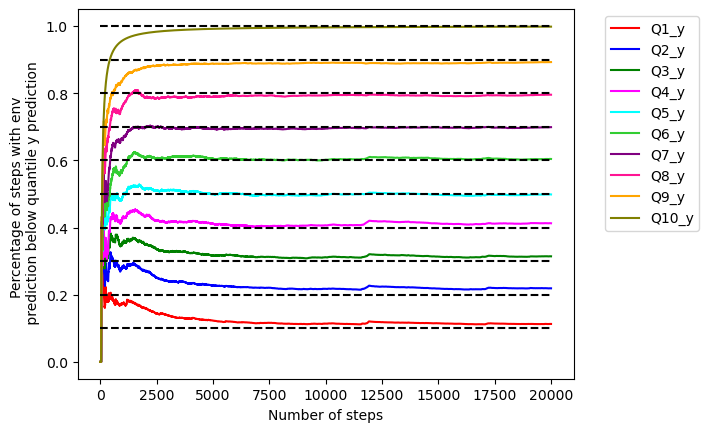

In [67]:
# y 
variable = "y"
nb_belowq1_list_y, nb_belowq2_list_y, nb_belowq3_list_y, nb_belowq4_list_y, nb_belowq5_list_y, nb_belowq6_list_y, nb_belowq7_list_y, nb_belowq8_list_y, nb_belowq9_list_y, nb_belowq10_list_y = nb_below_quantile(env_y, quantile0_y, quantile1_y, quantile2_y, quantile3_y, quantile4_y, quantile5_y, quantile6_y, quantile7_y, quantile8_y, quantile9_y, quantile10_y)
plot_nb_below_quantiles(prob, nb_belowq1_list_y, nb_belowq2_list_y, nb_belowq3_list_y, nb_belowq4_list_y, nb_belowq5_list_y, nb_belowq6_list_y, nb_belowq7_list_y, nb_belowq8_list_y, nb_belowq9_list_y, nb_belowq10_list_y, variable)


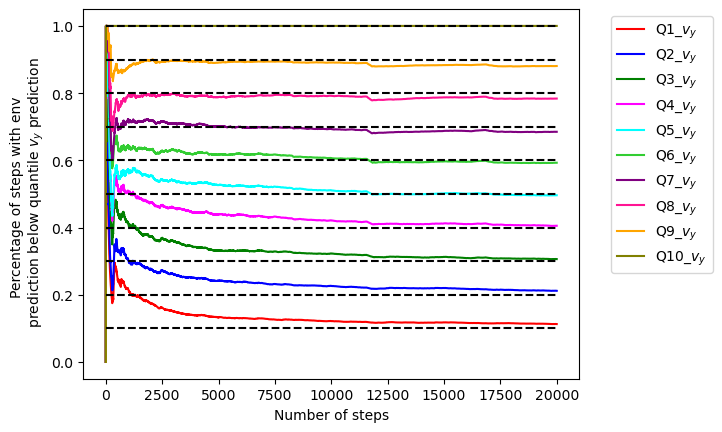

In [68]:
# vy
variable = "vy"
nb_belowq1_list_vy, nb_belowq2_list_vy, nb_belowq3_list_vy, nb_belowq4_list_vy, nb_belowq5_list_vy, nb_belowq6_list_vy, nb_belowq7_list_vy, nb_belowq8_list_vy, nb_belowq9_list_vy, nb_belowq10_list_vy = nb_below_quantile(env_vy, quantile0_vy, quantile1_vy, quantile2_vy, quantile3_vy, quantile4_vy, quantile5_vy, quantile6_vy, quantile7_vy, quantile8_vy, quantile9_vy, quantile10_vy)
plot_nb_below_quantiles(prob, nb_belowq1_list_vy, nb_belowq2_list_vy, nb_belowq3_list_vy, nb_belowq4_list_vy, nb_belowq5_list_vy, nb_belowq6_list_vy, nb_belowq7_list_vy, nb_belowq8_list_vy, nb_belowq9_list_vy, nb_belowq10_list_vy, variable)


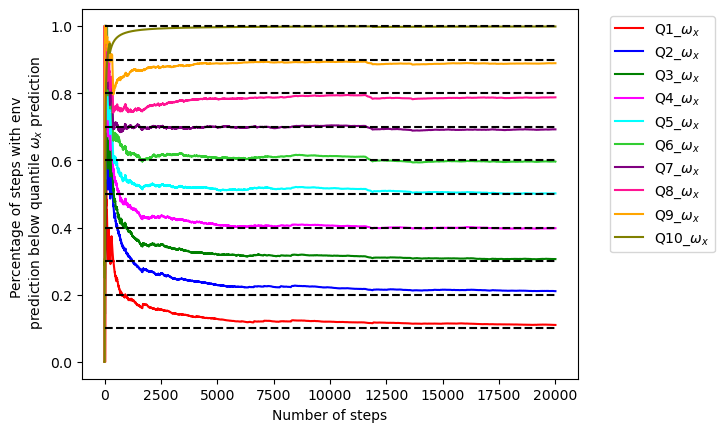

In [71]:
# omegax
variable = "omegax"
nb_belowq1_list_omegax, nb_belowq2_list_omegax, nb_belowq3_list_omegax, nb_belowq4_list_omegax, nb_belowq5_list_omegax, nb_belowq6_list_omegax, nb_belowq7_list_omegax, nb_belowq8_list_omegax, nb_belowq9_list_omegax, nb_belowq10_list_omegax = nb_below_quantile(env_omegax, quantile0_omegax, quantile1_omegax, quantile2_omegax, quantile3_omegax, quantile4_omegax, quantile5_omegax, quantile6_omegax, quantile7_omegax, quantile8_omegax, quantile9_omegax, quantile10_omegax)
plot_nb_below_quantiles(prob, nb_belowq1_list_omegax, nb_belowq2_list_omegax, nb_belowq3_list_omegax, nb_belowq4_list_omegax, nb_belowq5_list_omegax, nb_belowq6_list_omegax, nb_belowq7_list_omegax, nb_belowq8_list_omegax, nb_belowq9_list_omegax, nb_belowq10_list_omegax, variable)


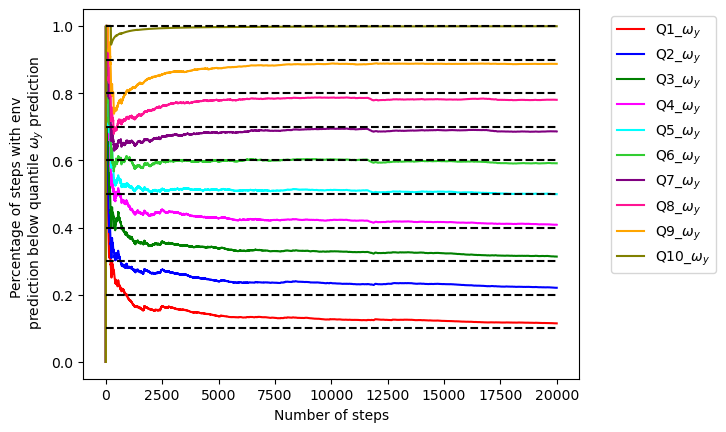

In [72]:
# omegay
variable = "omegay"
nb_belowq1_list_omegay, nb_belowq2_list_omegay, nb_belowq3_list_omegay, nb_belowq4_list_omegay, nb_belowq5_list_omegay, nb_belowq6_list_omegay, nb_belowq7_list_omegay, nb_belowq8_list_omegay, nb_belowq9_list_omegay, nb_belowq10_list_omegay = nb_below_quantile(env_omegay, quantile0_omegay, quantile1_omegay, quantile2_omegay, quantile3_omegay, quantile4_omegay, quantile5_omegay, quantile6_omegay, quantile7_omegay, quantile8_omegay, quantile9_omegay, quantile10_omegay)
plot_nb_below_quantiles(prob, nb_belowq1_list_omegay, nb_belowq2_list_omegay, nb_belowq3_list_omegay, nb_belowq4_list_omegay, nb_belowq5_list_omegay, nb_belowq6_list_omegay, nb_belowq7_list_omegay, nb_belowq8_list_omegay, nb_belowq9_list_omegay, nb_belowq10_list_omegay, variable)


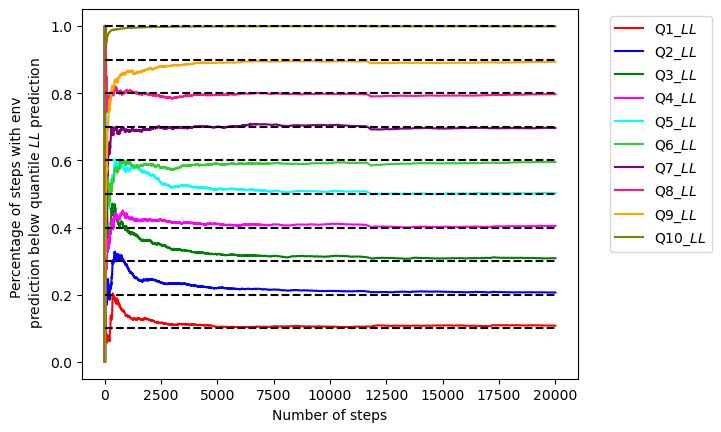

In [73]:
# left contact
variable = "left contact"
nb_belowq1_list_leftcontact, nb_belowq2_list_leftcontact, nb_belowq3_list_leftcontact, nb_belowq4_list_leftcontact, nb_belowq5_list_leftcontact, nb_belowq6_list_leftcontact, nb_belowq7_list_leftcontact, nb_belowq8_list_leftcontact, nb_belowq9_list_leftcontact, nb_belowq10_list_leftcontact = nb_below_quantile(env_leftcontact, quantile0_leftcontact, quantile1_leftcontact, quantile2_leftcontact, quantile3_leftcontact, quantile4_leftcontact, quantile5_leftcontact, quantile6_leftcontact, quantile7_leftcontact, quantile8_leftcontact, quantile9_leftcontact, quantile10_leftcontact)
plot_nb_below_quantiles(prob, nb_belowq1_list_leftcontact, nb_belowq2_list_leftcontact, nb_belowq3_list_leftcontact, nb_belowq4_list_leftcontact, nb_belowq5_list_leftcontact, nb_belowq6_list_leftcontact, nb_belowq7_list_leftcontact, nb_belowq8_list_leftcontact, nb_belowq9_list_leftcontact, nb_belowq10_list_leftcontact, variable)


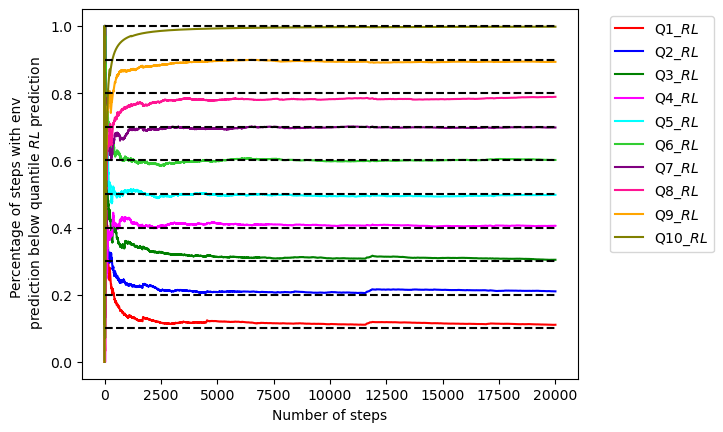

In [74]:
# right contact
variable = "right contact"
nb_belowq1_list_rightcontact, nb_belowq2_list_rightcontact, nb_belowq3_list_rightcontact, nb_belowq4_list_rightcontact, nb_belowq5_list_rightcontact, nb_belowq6_list_rightcontact, nb_belowq7_list_rightcontact, nb_belowq8_list_rightcontact, nb_belowq9_list_rightcontact, nb_belowq10_list_rightcontact = nb_below_quantile(env_rightcontact, quantile0_rightcontact, quantile1_rightcontact, quantile2_rightcontact, quantile3_rightcontact, quantile4_rightcontact, quantile5_rightcontact, quantile6_rightcontact, quantile7_rightcontact, quantile8_rightcontact, quantile9_rightcontact, quantile10_rightcontact)
plot_nb_below_quantiles(prob, nb_belowq1_list_rightcontact, nb_belowq2_list_rightcontact, nb_belowq3_list_rightcontact, nb_belowq4_list_rightcontact, nb_belowq5_list_rightcontact, nb_belowq6_list_rightcontact, nb_belowq7_list_rightcontact, nb_belowq8_list_rightcontact, nb_belowq9_list_rightcontact, nb_belowq10_list_rightcontact, variable)


## Panda Dense reward Push (3D)

The model predictions shouldn't depend on the reward distribution


In [4]:
prob = "PandaPush"

In [ ]:
import panda_gym
seed = 0
env = gym.make('PandaPushDense-v3').unwrapped
env.reset(seed=seed)

error_magnitudes_s0 = []
error_magnitudes_s1 = []
error_magnitudes_s2 = []
error_magnitudes_s3 = []
error_magnitudes_s4 = []
error_magnitudes_s5 = []
error_magnitudes_s6 = []
error_magnitudes_s7 = []
error_magnitudes_s8 = []
error_magnitudes_s9 = []
error_magnitudes_s10 = []
error_magnitudes_s11 = []
error_magnitudes_s12 = []
error_magnitudes_s13 = []
error_magnitudes_s14 = []
error_magnitudes_s15 = []
error_magnitudes_s16 = []
error_magnitudes_s17 = []

env_s0 = []
env_s1 = []
env_s2 = []
env_s3 = []
env_s4 = []
env_s5 = []
env_s6 = []
env_s7 = []
env_s8 = []
env_s9 = []
env_s10 = []
env_s11 = []
env_s12 = []
env_s13 = []
env_s14 = []
env_s15 = []
env_s16 = []
env_s17 = []

pred_s0 = []
pred_s1 = []
pred_s2 = []
pred_s3 = []
pred_s4 = []
pred_s5 = []
pred_s6 = []
pred_s7 = []
pred_s8 = []
pred_s9 = []
pred_s10 = []
pred_s11 = []
pred_s12 = []
pred_s13 = []
pred_s14 = []
pred_s15 = []
pred_s16 = []
pred_s17 = []

# quantile 0 data
quantile0_s0 = []
quantile0_s1 = []
quantile0_s2 = []
quantile0_s3 = []
quantile0_s4 = []
quantile0_s5 = []
quantile0_s6 = []
quantile0_s7 = []
quantile0_s8 = []
quantile0_s9 = []
quantile0_s10 = []
quantile0_s11 = []
quantile0_s12 = []
quantile0_s13 = []
quantile0_s14 = []
quantile0_s15 = []
quantile0_s16 = []
quantile0_s17 = []

# quantile 1 data
quantile1_s0 = []
quantile1_s1 = []
quantile1_s2 = []
quantile1_s3 = []
quantile1_s4 = []
quantile1_s5 = []
quantile1_s6 = []
quantile1_s7 = []
quantile1_s8 = []
quantile1_s9 = []
quantile1_s10 = []
quantile1_s11 = []
quantile1_s12 = []
quantile1_s13 = []
quantile1_s14 = []
quantile1_s15 = []
quantile1_s16 = []
quantile1_s17 = []

# quantile 2 data
quantile2_s0 = []
quantile2_s1 = []
quantile2_s2 = []
quantile2_s3 = []
quantile2_s4 = []
quantile2_s5 = []
quantile2_s6 = []
quantile2_s7 = []
quantile2_s8 = []
quantile2_s9 = []
quantile2_s10 = []
quantile2_s11 = []
quantile2_s12 = []
quantile2_s13 = []
quantile2_s14 = []
quantile2_s15 = []
quantile2_s16 = []
quantile2_s17 = []

# quantile 3 data
quantile3_s0 = []
quantile3_s1 = []
quantile3_s2 = []
quantile3_s3 = []
quantile3_s4 = []
quantile3_s5 = []
quantile3_s6 = []
quantile3_s7 = []
quantile3_s8 = []
quantile3_s9 = []
quantile3_s10 = []
quantile3_s11 = []
quantile3_s12 = []
quantile3_s13 = []
quantile3_s14 = []
quantile3_s15 = []
quantile3_s16 = []
quantile3_s17 = []

# quantile 4 data
quantile4_s0 = []
quantile4_s1 = []
quantile4_s2 = []
quantile4_s3 = []
quantile4_s4 = []
quantile4_s5 = []
quantile4_s6 = []
quantile4_s7 = []
quantile4_s8 = []
quantile4_s9 = []
quantile4_s10 = []
quantile4_s11 = []
quantile4_s12 = []
quantile4_s13 = []
quantile4_s14 = []
quantile4_s15 = []
quantile4_s16 = []
quantile4_s17 = []

# quantile 5 data
quantile5_s0 = []
quantile5_s1 = []
quantile5_s2 = []
quantile5_s3 = []
quantile5_s4 = []
quantile5_s5 = []
quantile5_s6 = []
quantile5_s7 = []
quantile5_s8 = []
quantile5_s9 = []
quantile5_s10 = []
quantile5_s11 = []
quantile5_s12 = []
quantile5_s13 = []
quantile5_s14 = []
quantile5_s15 = []
quantile5_s16 = []
quantile5_s17 = []

# quantile 6 data
quantile6_s0 = []
quantile6_s1 = []
quantile6_s2 = []
quantile6_s3 = []
quantile6_s4 = []
quantile6_s5 = []
quantile6_s6 = []
quantile6_s7 = []
quantile6_s8 = []
quantile6_s9 = []
quantile6_s10 = []
quantile6_s11 = []
quantile6_s12 = []
quantile6_s13 = []
quantile6_s14 = []
quantile6_s15 = []
quantile6_s16 = []
quantile6_s17 = []

# quantile 7 data
quantile7_s0 = []
quantile7_s1 = []
quantile7_s2 = []
quantile7_s3 = []
quantile7_s4 = []
quantile7_s5 = []
quantile7_s6 = []
quantile7_s7 = []
quantile7_s8 = []
quantile7_s9 = []
quantile7_s10 = []
quantile7_s11 = []
quantile7_s12 = []
quantile7_s13 = []
quantile7_s14 = []
quantile7_s15 = []
quantile7_s16 = []
quantile7_s17 = []

# quantile 8 data
quantile8_s0 = []
quantile8_s1 = []
quantile8_s2 = []
quantile8_s3 = []
quantile8_s4 = []
quantile8_s5 = []
quantile8_s6 = []
quantile8_s7 = []
quantile8_s8 = []
quantile8_s9 = []
quantile8_s10 = []
quantile8_s11 = []
quantile8_s12 = []
quantile8_s13 = []
quantile8_s14 = []
quantile8_s15 = []
quantile8_s16 = []
quantile8_s17 = []

# quantile 9 data
quantile9_s0 = []
quantile9_s1 = []
quantile9_s2 = []
quantile9_s3 = []
quantile9_s4 = []
quantile9_s5 = []
quantile9_s6 = []
quantile9_s7 = []
quantile9_s8 = []
quantile9_s9 = []
quantile9_s10 = []
quantile9_s11 = []
quantile9_s12 = []
quantile9_s13 = []
quantile9_s14 = []
quantile9_s15 = []
quantile9_s16 = []
quantile9_s17 = []

# quantile 10 data
quantile10_s0 = []
quantile10_s1 = []
quantile10_s2 = []
quantile10_s3 = []
quantile10_s4 = []
quantile10_s5 = []
quantile10_s6 = []
quantile10_s7 = []
quantile10_s8 = []
quantile10_s9 = []
quantile10_s10 = []
quantile10_s11 = []
quantile10_s12 = []
quantile10_s13 = []
quantile10_s14 = []
quantile10_s15 = []
quantile10_s16 = []
quantile10_s17 = []

actions_low = env.action_space.low
actions_high = env.action_space.high
states_low = env.observation_space['observation'].low
states_high = env.observation_space['observation'].high
state_dim = len(states_low)
action_dim = len(actions_low)
states_low = torch.tensor([-10]*18)
states_high = torch.tensor([10]*18)

quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []

batch_size = 32

num_test_steps = 20000
state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False
truncated = False

goal_state = state['desired_goal'] # 3 components
state = state['observation'] #[:3] # 6 components

discrete = False
actions_taken = np.zeros((num_test_steps, action_dim))
env.action_space.seed(seed)

for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
    
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    next_state = next_state['observation']#[:3] # env.state
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)#.unsqueeze(1)  # Example action
        else:
            test_action = torch.tensor(action, dtype=torch.float32)#.unsqueeze(1)
        test_state = torch.tensor(state, dtype=torch.float32)#.reshape(1, -1)
        test_state = torch.clip(test_state, states_low, states_high)

        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_s0 = np.append(pred_s0, mid_quantile[0][0])
        pred_s1 = np.append(pred_s1, mid_quantile[0][1])
        pred_s2 = np.append(pred_s2, mid_quantile[0][2])
        pred_s3 = np.append(pred_s3, mid_quantile[0][3])
        pred_s4 = np.append(pred_s4, mid_quantile[0][4])
        pred_s5 = np.append(pred_s5, mid_quantile[0][5])
        pred_s6 = np.append(pred_s6, mid_quantile[0][6])
        pred_s7 = np.append(pred_s7, mid_quantile[0][7])
        pred_s8 = np.append(pred_s8, mid_quantile[0][8])
        pred_s9 = np.append(pred_s9, mid_quantile[0][9])
        pred_s10 = np.append(pred_s10, mid_quantile[0][10])
        pred_s11 = np.append(pred_s11, mid_quantile[0][11])
        pred_s12 = np.append(pred_s12, mid_quantile[0][12])
        pred_s13 = np.append(pred_s13, mid_quantile[0][13])
        pred_s14 = np.append(pred_s14, mid_quantile[0][14])
        pred_s15 = np.append(pred_s15, mid_quantile[0][15])
        pred_s16 = np.append(pred_s16, mid_quantile[0][16])
        pred_s17 = np.append(pred_s17, mid_quantile[0][17])
        
        # Quantile 0 data
        quantile0_s0 = np.append(quantile0_s0, predicted_quantiles[0][0][0].item())
        quantile0_s1 = np.append(quantile0_s1, predicted_quantiles[0][0][1].item())
        quantile0_s2 = np.append(quantile0_s2, predicted_quantiles[0][0][2].item())
        quantile0_s3 = np.append(quantile0_s3, predicted_quantiles[0][0][3].item())
        quantile0_s4 = np.append(quantile0_s4, predicted_quantiles[0][0][4].item())
        quantile0_s5 = np.append(quantile0_s5, predicted_quantiles[0][0][5].item())
        quantile0_s6 = np.append(quantile0_s6, predicted_quantiles[0][0][6].item())
        quantile0_s7 = np.append(quantile0_s7, predicted_quantiles[0][0][7].item())
        quantile0_s8 = np.append(quantile0_s8, predicted_quantiles[0][0][8].item())
        quantile0_s9 = np.append(quantile0_s9, predicted_quantiles[0][0][9].item())
        quantile0_s10 = np.append(quantile0_s10, predicted_quantiles[0][0][10].item())
        quantile0_s11 = np.append(quantile0_s11, predicted_quantiles[0][0][11].item())
        quantile0_s12 = np.append(quantile0_s12, predicted_quantiles[0][0][12].item())
        quantile0_s13 = np.append(quantile0_s13, predicted_quantiles[0][0][13].item())
        quantile0_s14 = np.append(quantile0_s14, predicted_quantiles[0][0][14].item())
        quantile0_s15 = np.append(quantile0_s15, predicted_quantiles[0][0][15].item())
        quantile0_s16 = np.append(quantile0_s16, predicted_quantiles[0][0][16].item())
        quantile0_s17 = np.append(quantile0_s17, predicted_quantiles[0][0][17].item())
        
        # Quantile 1 data
        quantile1_s0 = np.append(quantile1_s0, predicted_quantiles[0][1][0].item())
        quantile1_s1 = np.append(quantile1_s1, predicted_quantiles[0][1][1].item())
        quantile1_s2 = np.append(quantile1_s2, predicted_quantiles[0][1][2].item())
        quantile1_s3 = np.append(quantile1_s3, predicted_quantiles[0][1][3].item())
        quantile1_s4 = np.append(quantile1_s4, predicted_quantiles[0][1][4].item())
        quantile1_s5 = np.append(quantile1_s5, predicted_quantiles[0][1][5].item())
        quantile1_s6 = np.append(quantile1_s6, predicted_quantiles[0][1][6].item())
        quantile1_s7 = np.append(quantile1_s7, predicted_quantiles[0][1][7].item())
        quantile1_s8 = np.append(quantile1_s8, predicted_quantiles[0][1][8].item())
        quantile1_s9 = np.append(quantile1_s9, predicted_quantiles[0][1][9].item())
        quantile1_s10 = np.append(quantile1_s10, predicted_quantiles[0][1][10].item())
        quantile1_s11 = np.append(quantile1_s11, predicted_quantiles[0][1][11].item())
        quantile1_s12 = np.append(quantile1_s12, predicted_quantiles[0][1][12].item())
        quantile1_s13 = np.append(quantile1_s13, predicted_quantiles[0][1][13].item())
        quantile1_s14 = np.append(quantile1_s14, predicted_quantiles[0][1][14].item())
        quantile1_s15 = np.append(quantile1_s15, predicted_quantiles[0][1][15].item())
        quantile1_s16 = np.append(quantile1_s16, predicted_quantiles[0][1][16].item())
        quantile1_s17 = np.append(quantile1_s17, predicted_quantiles[0][1][17].item())
        
        # Quantile 2 data
        quantile2_s0 = np.append(quantile2_s0, predicted_quantiles[0][2][0].item())
        quantile2_s1 = np.append(quantile2_s1, predicted_quantiles[0][2][1].item())
        quantile2_s2 = np.append(quantile2_s2, predicted_quantiles[0][2][2].item())
        quantile2_s3 = np.append(quantile2_s3, predicted_quantiles[0][2][3].item())
        quantile2_s4 = np.append(quantile2_s4, predicted_quantiles[0][2][4].item())
        quantile2_s5 = np.append(quantile2_s5, predicted_quantiles[0][2][5].item())
        quantile2_s6 = np.append(quantile2_s6, predicted_quantiles[0][2][6].item())
        quantile2_s7 = np.append(quantile2_s7, predicted_quantiles[0][2][7].item())
        quantile2_s8 = np.append(quantile2_s8, predicted_quantiles[0][2][8].item())
        quantile2_s9 = np.append(quantile2_s9, predicted_quantiles[0][2][9].item())
        quantile2_s10 = np.append(quantile2_s10, predicted_quantiles[0][2][10].item())
        quantile2_s11 = np.append(quantile2_s11, predicted_quantiles[0][2][11].item())
        quantile2_s12 = np.append(quantile2_s12, predicted_quantiles[0][2][12].item())
        quantile2_s13 = np.append(quantile2_s13, predicted_quantiles[0][2][13].item())
        quantile2_s14 = np.append(quantile2_s14, predicted_quantiles[0][2][14].item())
        quantile2_s15 = np.append(quantile2_s15, predicted_quantiles[0][2][15].item())
        quantile2_s16 = np.append(quantile2_s16, predicted_quantiles[0][2][16].item())
        quantile2_s17 = np.append(quantile2_s17, predicted_quantiles[0][2][17].item())
        
        # Quantile 3
        quantile3_s0 = np.append(quantile3_s0, predicted_quantiles[0][3][0].item())
        quantile3_s1 = np.append(quantile3_s1, predicted_quantiles[0][3][1].item())
        quantile3_s2 = np.append(quantile3_s2, predicted_quantiles[0][3][2].item())
        quantile3_s3 = np.append(quantile3_s3, predicted_quantiles[0][3][3].item())
        quantile3_s4 = np.append(quantile3_s4, predicted_quantiles[0][3][4].item())
        quantile3_s5 = np.append(quantile3_s5, predicted_quantiles[0][3][5].item())
        quantile3_s6 = np.append(quantile3_s6, predicted_quantiles[0][3][6].item())
        quantile3_s7 = np.append(quantile3_s7, predicted_quantiles[0][3][7].item())
        quantile3_s8 = np.append(quantile3_s8, predicted_quantiles[0][3][8].item())
        quantile3_s9 = np.append(quantile3_s9, predicted_quantiles[0][3][9].item())
        quantile3_s10 = np.append(quantile3_s10, predicted_quantiles[0][3][10].item())
        quantile3_s11 = np.append(quantile3_s11, predicted_quantiles[0][3][11].item())
        quantile3_s12 = np.append(quantile3_s12, predicted_quantiles[0][3][12].item())
        quantile3_s13 = np.append(quantile3_s13, predicted_quantiles[0][3][13].item())
        quantile3_s14 = np.append(quantile3_s14, predicted_quantiles[0][3][14].item())
        quantile3_s15 = np.append(quantile3_s15, predicted_quantiles[0][3][15].item())
        quantile3_s16 = np.append(quantile3_s16, predicted_quantiles[0][3][16].item())
        quantile3_s17 = np.append(quantile3_s17, predicted_quantiles[0][3][17].item())

        # Quantile 4
        quantile4_s0 = np.append(quantile4_s0, predicted_quantiles[0][4][0].item())
        quantile4_s1 = np.append(quantile4_s1, predicted_quantiles[0][4][1].item())
        quantile4_s2 = np.append(quantile4_s2, predicted_quantiles[0][4][2].item())
        quantile4_s3 = np.append(quantile4_s3, predicted_quantiles[0][4][3].item())
        quantile4_s4 = np.append(quantile4_s4, predicted_quantiles[0][4][4].item())
        quantile4_s5 = np.append(quantile4_s5, predicted_quantiles[0][4][5].item())
        quantile4_s6 = np.append(quantile4_s6, predicted_quantiles[0][4][6].item())
        quantile4_s7 = np.append(quantile4_s7, predicted_quantiles[0][4][7].item())
        quantile4_s8 = np.append(quantile4_s8, predicted_quantiles[0][4][8].item())
        quantile4_s9 = np.append(quantile4_s9, predicted_quantiles[0][4][9].item())
        quantile4_s10 = np.append(quantile4_s10, predicted_quantiles[0][4][10].item())
        quantile4_s11 = np.append(quantile4_s11, predicted_quantiles[0][4][11].item())
        quantile4_s12 = np.append(quantile4_s12, predicted_quantiles[0][4][12].item())
        quantile4_s13 = np.append(quantile4_s13, predicted_quantiles[0][4][13].item())
        quantile4_s14 = np.append(quantile4_s14, predicted_quantiles[0][4][14].item())
        quantile4_s15 = np.append(quantile4_s15, predicted_quantiles[0][4][15].item())
        quantile4_s16 = np.append(quantile4_s16, predicted_quantiles[0][4][16].item())
        quantile4_s17 = np.append(quantile4_s17, predicted_quantiles[0][4][17].item())

        # Quantile 5
        quantile5_s0 = np.append(quantile5_s0, predicted_quantiles[0][5][0].item())
        quantile5_s1 = np.append(quantile5_s1, predicted_quantiles[0][5][1].item())
        quantile5_s2 = np.append(quantile5_s2, predicted_quantiles[0][5][2].item())
        quantile5_s3 = np.append(quantile5_s3, predicted_quantiles[0][5][3].item())
        quantile5_s4 = np.append(quantile5_s4, predicted_quantiles[0][5][4].item())
        quantile5_s5 = np.append(quantile5_s5, predicted_quantiles[0][5][5].item())
        quantile5_s6 = np.append(quantile5_s6, predicted_quantiles[0][5][6].item())
        quantile5_s7 = np.append(quantile5_s7, predicted_quantiles[0][5][7].item())
        quantile5_s8 = np.append(quantile5_s8, predicted_quantiles[0][5][8].item())
        quantile5_s9 = np.append(quantile5_s9, predicted_quantiles[0][5][9].item())
        quantile5_s10 = np.append(quantile5_s10, predicted_quantiles[0][5][10].item())
        quantile5_s11 = np.append(quantile5_s11, predicted_quantiles[0][5][11].item())
        quantile5_s12 = np.append(quantile5_s12, predicted_quantiles[0][5][12].item())
        quantile5_s13 = np.append(quantile5_s13, predicted_quantiles[0][5][13].item())
        quantile5_s14 = np.append(quantile5_s14, predicted_quantiles[0][5][14].item())
        quantile5_s15 = np.append(quantile5_s15, predicted_quantiles[0][5][15].item())
        quantile5_s16 = np.append(quantile5_s16, predicted_quantiles[0][5][16].item())
        quantile5_s17 = np.append(quantile5_s17, predicted_quantiles[0][5][17].item())

        # Quantile 6
        quantile6_s0 = np.append(quantile6_s0, predicted_quantiles[0][6][0].item())
        quantile6_s1 = np.append(quantile6_s1, predicted_quantiles[0][6][1].item())
        quantile6_s2 = np.append(quantile6_s2, predicted_quantiles[0][6][2].item())
        quantile6_s3 = np.append(quantile6_s3, predicted_quantiles[0][6][3].item())
        quantile6_s4 = np.append(quantile6_s4, predicted_quantiles[0][6][4].item())
        quantile6_s5 = np.append(quantile6_s5, predicted_quantiles[0][6][5].item())
        quantile6_s6 = np.append(quantile6_s6, predicted_quantiles[0][6][6].item())
        quantile6_s7 = np.append(quantile6_s7, predicted_quantiles[0][6][7].item())
        quantile6_s8 = np.append(quantile6_s8, predicted_quantiles[0][6][8].item())
        quantile6_s9 = np.append(quantile6_s9, predicted_quantiles[0][6][9].item())
        quantile6_s10 = np.append(quantile6_s10, predicted_quantiles[0][6][10].item())
        quantile6_s11 = np.append(quantile6_s11, predicted_quantiles[0][6][11].item())
        quantile6_s12 = np.append(quantile6_s12, predicted_quantiles[0][6][12].item())
        quantile6_s13 = np.append(quantile6_s13, predicted_quantiles[0][6][13].item())
        quantile6_s14 = np.append(quantile6_s14, predicted_quantiles[0][6][14].item())
        quantile6_s15 = np.append(quantile6_s15, predicted_quantiles[0][6][15].item())
        quantile6_s16 = np.append(quantile6_s16, predicted_quantiles[0][6][16].item())
        quantile6_s17 = np.append(quantile6_s17, predicted_quantiles[0][6][17].item())

        # Quantile 7
        quantile7_s0 = np.append(quantile7_s0, predicted_quantiles[0][7][0].item())
        quantile7_s1 = np.append(quantile7_s1, predicted_quantiles[0][7][1].item())
        quantile7_s2 = np.append(quantile7_s2, predicted_quantiles[0][7][2].item())
        quantile7_s3 = np.append(quantile7_s3, predicted_quantiles[0][7][3].item())
        quantile7_s4 = np.append(quantile7_s4, predicted_quantiles[0][7][4].item())
        quantile7_s5 = np.append(quantile7_s5, predicted_quantiles[0][7][5].item())
        quantile7_s6 = np.append(quantile7_s6, predicted_quantiles[0][7][6].item())
        quantile7_s7 = np.append(quantile7_s7, predicted_quantiles[0][7][7].item())
        quantile7_s8 = np.append(quantile7_s8, predicted_quantiles[0][7][8].item())
        quantile7_s9 = np.append(quantile7_s9, predicted_quantiles[0][7][9].item())
        quantile7_s10 = np.append(quantile7_s10, predicted_quantiles[0][7][10].item())
        quantile7_s11 = np.append(quantile7_s11, predicted_quantiles[0][7][11].item())
        quantile7_s12 = np.append(quantile7_s12, predicted_quantiles[0][7][12].item())
        quantile7_s13 = np.append(quantile7_s13, predicted_quantiles[0][7][13].item())
        quantile7_s14 = np.append(quantile7_s14, predicted_quantiles[0][7][14].item())
        quantile7_s15 = np.append(quantile7_s15, predicted_quantiles[0][7][15].item())
        quantile7_s16 = np.append(quantile7_s16, predicted_quantiles[0][7][16].item())
        quantile7_s17 = np.append(quantile7_s17, predicted_quantiles[0][7][17].item())

        # Quantile 8
        quantile8_s0 = np.append(quantile8_s0, predicted_quantiles[0][8][0].item())
        quantile8_s1 = np.append(quantile8_s1, predicted_quantiles[0][8][1].item())
        quantile8_s2 = np.append(quantile8_s2, predicted_quantiles[0][8][2].item())
        quantile8_s3 = np.append(quantile8_s3, predicted_quantiles[0][8][3].item())
        quantile8_s4 = np.append(quantile8_s4, predicted_quantiles[0][8][4].item())
        quantile8_s5 = np.append(quantile8_s5, predicted_quantiles[0][8][5].item())
        quantile8_s6 = np.append(quantile8_s6, predicted_quantiles[0][8][6].item())
        quantile8_s7 = np.append(quantile8_s7, predicted_quantiles[0][8][7].item())
        quantile8_s8 = np.append(quantile8_s8, predicted_quantiles[0][8][8].item())
        quantile8_s9 = np.append(quantile8_s9, predicted_quantiles[0][8][9].item())
        quantile8_s10 = np.append(quantile8_s10, predicted_quantiles[0][8][10].item())
        quantile8_s11 = np.append(quantile8_s11, predicted_quantiles[0][8][11].item())
        quantile8_s12 = np.append(quantile8_s12, predicted_quantiles[0][8][12].item())
        quantile8_s13 = np.append(quantile8_s13, predicted_quantiles[0][8][13].item())
        quantile8_s14 = np.append(quantile8_s14, predicted_quantiles[0][8][14].item())
        quantile8_s15 = np.append(quantile8_s15, predicted_quantiles[0][8][15].item())
        quantile8_s16 = np.append(quantile8_s16, predicted_quantiles[0][8][16].item())
        quantile8_s17 = np.append(quantile8_s17, predicted_quantiles[0][8][17].item())

        # Quantile 9
        quantile9_s0 = np.append(quantile9_s0, predicted_quantiles[0][9][0].item())
        quantile9_s1 = np.append(quantile9_s1, predicted_quantiles[0][9][1].item())
        quantile9_s2 = np.append(quantile9_s2, predicted_quantiles[0][9][2].item())
        quantile9_s3 = np.append(quantile9_s3, predicted_quantiles[0][9][3].item())
        quantile9_s4 = np.append(quantile9_s4, predicted_quantiles[0][9][4].item())
        quantile9_s5 = np.append(quantile9_s5, predicted_quantiles[0][9][5].item())
        quantile9_s6 = np.append(quantile9_s6, predicted_quantiles[0][9][6].item())
        quantile9_s7 = np.append(quantile9_s7, predicted_quantiles[0][9][7].item())
        quantile9_s8 = np.append(quantile9_s8, predicted_quantiles[0][9][8].item())
        quantile9_s9 = np.append(quantile9_s9, predicted_quantiles[0][9][9].item())
        quantile9_s10 = np.append(quantile9_s10, predicted_quantiles[0][9][10].item())
        quantile9_s11 = np.append(quantile9_s11, predicted_quantiles[0][9][11].item())
        quantile9_s12 = np.append(quantile9_s12, predicted_quantiles[0][9][12].item())
        quantile9_s13 = np.append(quantile9_s13, predicted_quantiles[0][9][13].item())
        quantile9_s14 = np.append(quantile9_s14, predicted_quantiles[0][9][14].item())
        quantile9_s15 = np.append(quantile9_s15, predicted_quantiles[0][9][15].item())
        quantile9_s16 = np.append(quantile9_s16, predicted_quantiles[0][9][16].item())
        quantile9_s17 = np.append(quantile9_s17, predicted_quantiles[0][9][17].item())

        # Quantile 10
        quantile10_s0 = np.append(quantile10_s0, predicted_quantiles[0][10][0].item())
        quantile10_s1 = np.append(quantile10_s1, predicted_quantiles[0][10][1].item())
        quantile10_s2 = np.append(quantile10_s2, predicted_quantiles[0][10][2].item())
        quantile10_s3 = np.append(quantile10_s3, predicted_quantiles[0][10][3].item())
        quantile10_s4 = np.append(quantile10_s4, predicted_quantiles[0][10][4].item())
        quantile10_s5 = np.append(quantile10_s5, predicted_quantiles[0][10][5].item())
        quantile10_s6 = np.append(quantile10_s6, predicted_quantiles[0][10][6].item())
        quantile10_s7 = np.append(quantile10_s7, predicted_quantiles[0][10][7].item())
        quantile10_s8 = np.append(quantile10_s8, predicted_quantiles[0][10][8].item())
        quantile10_s9 = np.append(quantile10_s9, predicted_quantiles[0][10][9].item())
        quantile10_s10 = np.append(quantile10_s10, predicted_quantiles[0][10][10].item())
        quantile10_s11 = np.append(quantile10_s11, predicted_quantiles[0][10][11].item())
        quantile10_s12 = np.append(quantile10_s12, predicted_quantiles[0][10][12].item())
        quantile10_s13 = np.append(quantile10_s13, predicted_quantiles[0][10][13].item())
        quantile10_s14 = np.append(quantile10_s14, predicted_quantiles[0][10][14].item())
        quantile10_s15 = np.append(quantile10_s15, predicted_quantiles[0][10][15].item())
        quantile10_s16 = np.append(quantile10_s16, predicted_quantiles[0][10][16].item())
        quantile10_s17 = np.append(quantile10_s17, predicted_quantiles[0][10][17].item())

        delta_s0 = test_next_state[0] - mid_quantile[0][0]
        delta_s1 = test_next_state[1] - mid_quantile[0][1]
        delta_s2 = test_next_state[2] - mid_quantile[0][2]
        delta_s3 = test_next_state[3] - mid_quantile[0][3]
        delta_s4 = test_next_state[4] - mid_quantile[0][4]
        delta_s5 = test_next_state[5] - mid_quantile[0][5]
        delta_s6 = test_next_state[6] - mid_quantile[0][6]
        delta_s7 = test_next_state[7] - mid_quantile[0][7]
        delta_s8 = test_next_state[8] - mid_quantile[0][8]
        delta_s9 = test_next_state[9] - mid_quantile[0][9]
        delta_s10 = test_next_state[10] - mid_quantile[0][10]
        delta_s11 = test_next_state[11] - mid_quantile[0][11]
        delta_s12 = test_next_state[12] - mid_quantile[0][12]
        delta_s13 = test_next_state[13] - mid_quantile[0][13]
        delta_s14 = test_next_state[14] - mid_quantile[0][14]
        delta_s15 = test_next_state[15] - mid_quantile[0][15]
        delta_s16 = test_next_state[16] - mid_quantile[0][16]
        delta_s17 = test_next_state[17] - mid_quantile[0][17]
        
        error_magnitudes_s0.append(np.abs(delta_s0))
        error_magnitudes_s1.append(np.abs(delta_s1))
        error_magnitudes_s2.append(np.abs(delta_s2))
        error_magnitudes_s3.append(np.abs(delta_s3))
        error_magnitudes_s4.append(np.abs(delta_s4))
        error_magnitudes_s5.append(np.abs(delta_s5))
        error_magnitudes_s6.append(np.abs(delta_s6))
        error_magnitudes_s7.append(np.abs(delta_s7))
        error_magnitudes_s8.append(np.abs(delta_s8))
        error_magnitudes_s9.append(np.abs(delta_s9))
        error_magnitudes_s10.append(np.abs(delta_s10))
        error_magnitudes_s11.append(np.abs(delta_s11))
        error_magnitudes_s12.append(np.abs(delta_s12))
        error_magnitudes_s13.append(np.abs(delta_s13))
        error_magnitudes_s14.append(np.abs(delta_s14))
        error_magnitudes_s15.append(np.abs(delta_s15))
        error_magnitudes_s16.append(np.abs(delta_s16))
        error_magnitudes_s17.append(np.abs(delta_s17))
        
        env_s0.append(test_next_state[0])
        env_s1.append(test_next_state[1])
        env_s2.append(test_next_state[2])
        env_s3.append(test_next_state[3])
        env_s4.append(test_next_state[4])
        env_s5.append(test_next_state[5])
        env_s6.append(test_next_state[6])
        env_s7.append(test_next_state[7])
        env_s8.append(test_next_state[8])
        env_s9.append(test_next_state[9])
        env_s10.append(test_next_state[10])
        env_s11.append(test_next_state[11])
        env_s12.append(test_next_state[12])
        env_s13.append(test_next_state[13])
        env_s14.append(test_next_state[14])
        env_s15.append(test_next_state[15])
        env_s16.append(test_next_state[16])
        env_s17.append(test_next_state[17])
        
    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    state = next_state

    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False
        truncated = False
        
        goal_state = state['desired_goal'] # 3 components
        state = state['observation'] #[:3] # 6 components



C:\Users\nicle\AppData\Local\Temp\ipykernel_53448\3650281684.py:645: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  states = torch.tensor(states, dtype=torch.float32)


In [35]:
env.close()

In [38]:
import numpy as np
import torch
import gymnasium as gym
import random
from collections import defaultdict
import panda_gym

# Initialize environment
env = gym.make('PandaPushDense-v3')
env.reset(seed=0)

# Define dimensions
num_state_components = 18
num_quantiles = 11  # 0.0, 0.1, ..., 1.0
quantiles = torch.tensor(np.linspace(0, 1, num_quantiles), dtype=torch.float32)

# Initialize data storage
error_magnitudes = [[] for _ in range(num_state_components)]
env_states = [[] for _ in range(num_state_components)]
pred_states = [[] for _ in range(num_state_components)]
quantiles_data = [[[] for _ in range(num_quantiles)] for _ in range(num_state_components)]

# Initialize model, optimizer, replay buffer
model = NextStateQuantileNetwork(state_dim=num_state_components, action_dim=env.action_space.shape[0], num_quantiles=num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
replay_buffer = []
batch_size = 32

# Training loop
for step in range(num_test_steps):
    action = env.action_space.sample()
    next_state, reward, done, truncated, info = env.step(action)
    next_state = next_state['observation']
    
    if step >= 1:
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        test_action = torch.tensor(action, dtype=torch.float32)
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, -10, 10)

        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)

        # Store quantile predictions
        for state_idx in range(num_state_components):
            for quantile_idx in range(num_quantiles):
                quantiles_data[state_idx][quantile_idx].append(
                    predicted_quantiles[0][quantile_idx][state_idx].item()
                )

            # Compute and store errors
            delta = test_next_state[state_idx] - mid_quantile[0][state_idx]
            error_magnitudes[state_idx].append(np.abs(delta))
            env_states[state_idx].append(test_next_state[state_idx].item())
            pred_states[state_idx].append(mid_quantile[0][state_idx].item())

    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) >= batch_size:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        
        # Convert to tensors and train
        states = torch.tensor(states, dtype=torch.float32).clip(-10, 10)
        actions = torch.tensor(actions, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        
        predicted_quantiles = model(states, actions)
        loss = quantile_loss(predicted_quantiles, next_states, quantiles)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    state = next_state
    if done or truncated:
        state, _ = env.reset(seed=0)
        state = state['observation']
        

### Graph of number of values below the different quantiles


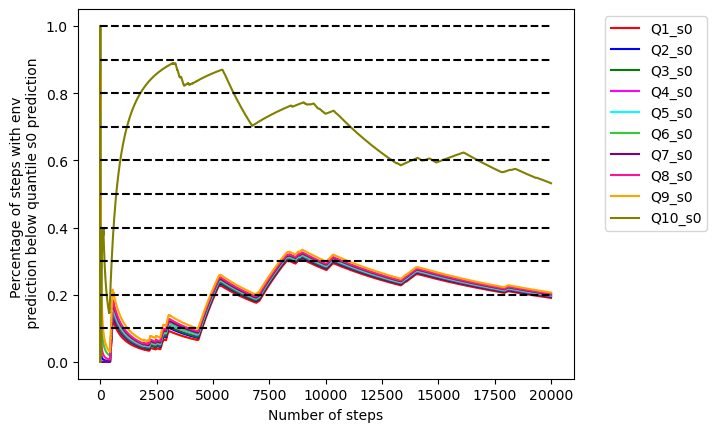

In [8]:
# s0
variable = "s0"
nb_belowq1_list_s0, nb_belowq2_list_s0, nb_belowq3_list_s0, nb_belowq4_list_s0, nb_belowq5_list_s0, nb_belowq6_list_s0, nb_belowq7_list_s0, nb_belowq8_list_s0, nb_belowq9_list_s0, nb_belowq10_list_s0 = nb_below_quantile(env_s1, quantile0_s0, quantile1_s0, quantile2_s0, quantile3_s0, quantile4_s0, quantile5_s0, quantile6_s0, quantile7_s0, quantile8_s0, quantile9_s0, quantile10_s0)
plot_nb_below_quantiles(prob, nb_belowq1_list_s0, nb_belowq2_list_s0, nb_belowq3_list_s0, nb_belowq4_list_s0, nb_belowq5_list_s0, nb_belowq6_list_s0, nb_belowq7_list_s0, nb_belowq8_list_s0, nb_belowq9_list_s0, nb_belowq10_list_s0, variable)


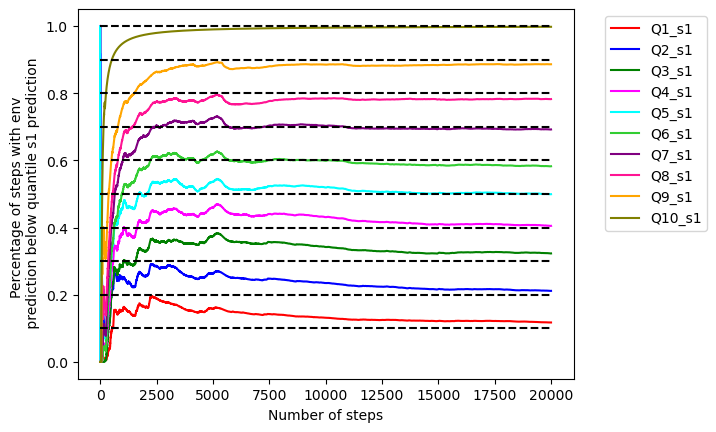

In [9]:
# s1 
variable = "s1"
nb_belowq1_list_s1, nb_belowq2_list_s1, nb_belowq3_list_s1, nb_belowq4_list_s1, nb_belowq5_list_s1, nb_belowq6_list_s1, nb_belowq7_list_s1, nb_belowq8_list_s1, nb_belowq9_list_s1, nb_belowq10_list_s1 = nb_below_quantile(env_s1, quantile0_s1, quantile1_s1, quantile2_s1, quantile3_s1, quantile4_s1, quantile5_s1, quantile6_s1, quantile7_s1, quantile8_s1, quantile9_s1, quantile10_s1)
plot_nb_below_quantiles(prob, nb_belowq1_list_s1, nb_belowq2_list_s1, nb_belowq3_list_s1, nb_belowq4_list_s1, nb_belowq5_list_s1, nb_belowq6_list_s1, nb_belowq7_list_s1, nb_belowq8_list_s1, nb_belowq9_list_s1, nb_belowq10_list_s1, variable)


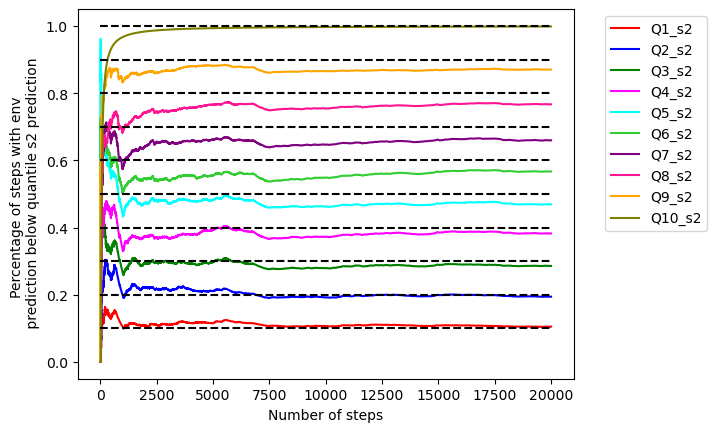

In [11]:
# s2 
variable = "s2"
nb_belowq1_list_s2, nb_belowq2_list_s2, nb_belowq3_list_s2, nb_belowq4_list_s2, nb_belowq5_list_s2, nb_belowq6_list_s2, nb_belowq7_list_s2, nb_belowq8_list_s2, nb_belowq9_list_s2, nb_belowq10_list_s2 = nb_below_quantile(env_s2, quantile0_s2, quantile1_s2, quantile2_s2, quantile3_s2, quantile4_s2, quantile5_s2, quantile6_s2, quantile7_s2, quantile8_s2, quantile9_s2, quantile10_s2)
plot_nb_below_quantiles(prob, nb_belowq1_list_s2, nb_belowq2_list_s2, nb_belowq3_list_s2, nb_belowq4_list_s2, nb_belowq5_list_s2, nb_belowq6_list_s2, nb_belowq7_list_s2, nb_belowq8_list_s2, nb_belowq9_list_s2, nb_belowq10_list_s2, variable)


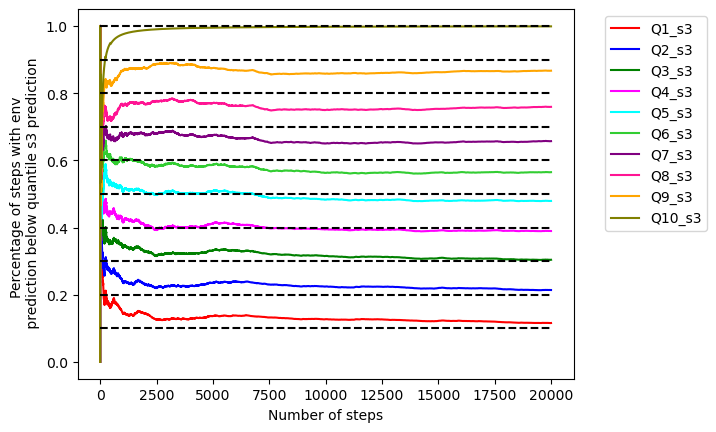

In [12]:
# s3 
variable = "s3"
nb_belowq1_list_s3, nb_belowq2_list_s3, nb_belowq3_list_s3, nb_belowq4_list_s3, nb_belowq5_list_s3, nb_belowq6_list_s3, nb_belowq7_list_s3, nb_belowq8_list_s3, nb_belowq9_list_s3, nb_belowq10_list_s3 = nb_below_quantile(env_s3, quantile0_s3, quantile1_s3, quantile2_s3, quantile3_s3, quantile4_s3, quantile5_s3, quantile6_s3, quantile7_s3, quantile8_s3, quantile9_s3, quantile10_s3)
plot_nb_below_quantiles(prob, nb_belowq1_list_s3, nb_belowq2_list_s3, nb_belowq3_list_s3, nb_belowq4_list_s3, nb_belowq5_list_s3, nb_belowq6_list_s3, nb_belowq7_list_s3, nb_belowq8_list_s3, nb_belowq9_list_s3, nb_belowq10_list_s3, variable)


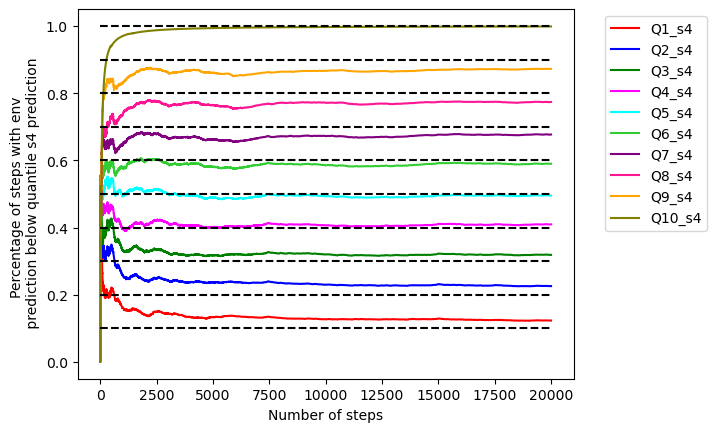

In [13]:
# s4 
variable = "s4"
nb_belowq1_list_s4, nb_belowq2_list_s4, nb_belowq3_list_s4, nb_belowq4_list_s4, nb_belowq5_list_s4, nb_belowq6_list_s4, nb_belowq7_list_s4, nb_belowq8_list_s4, nb_belowq9_list_s4, nb_belowq10_list_s4 = nb_below_quantile(env_s4, quantile0_s4, quantile1_s4, quantile2_s4, quantile3_s4, quantile4_s4, quantile5_s4, quantile6_s4, quantile7_s4, quantile8_s4, quantile9_s4, quantile10_s4)
plot_nb_below_quantiles(prob, nb_belowq1_list_s4, nb_belowq2_list_s4, nb_belowq3_list_s4, nb_belowq4_list_s4, nb_belowq5_list_s4, nb_belowq6_list_s4, nb_belowq7_list_s4, nb_belowq8_list_s4, nb_belowq9_list_s4, nb_belowq10_list_s4, variable)


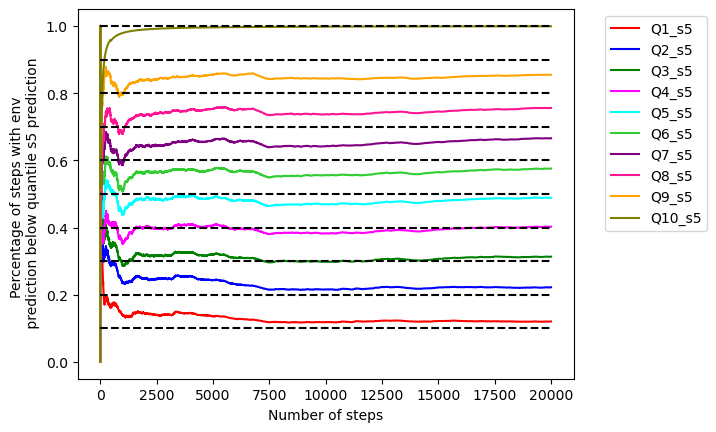

In [14]:
# s5 
variable = "s5"
nb_belowq1_list_s5, nb_belowq2_list_s5, nb_belowq3_list_s5, nb_belowq4_list_s5, nb_belowq5_list_s5, nb_belowq6_list_s5, nb_belowq7_list_s5, nb_belowq8_list_s5, nb_belowq9_list_s5, nb_belowq10_list_s5 = nb_below_quantile(env_s5, quantile0_s5, quantile1_s5, quantile2_s5, quantile3_s5, quantile4_s5, quantile5_s5, quantile6_s5, quantile7_s5, quantile8_s5, quantile9_s5, quantile10_s5)
plot_nb_below_quantiles(prob, nb_belowq1_list_s5, nb_belowq2_list_s5, nb_belowq3_list_s5, nb_belowq4_list_s5, nb_belowq5_list_s5, nb_belowq6_list_s5, nb_belowq7_list_s5, nb_belowq8_list_s5, nb_belowq9_list_s5, nb_belowq10_list_s5, variable)


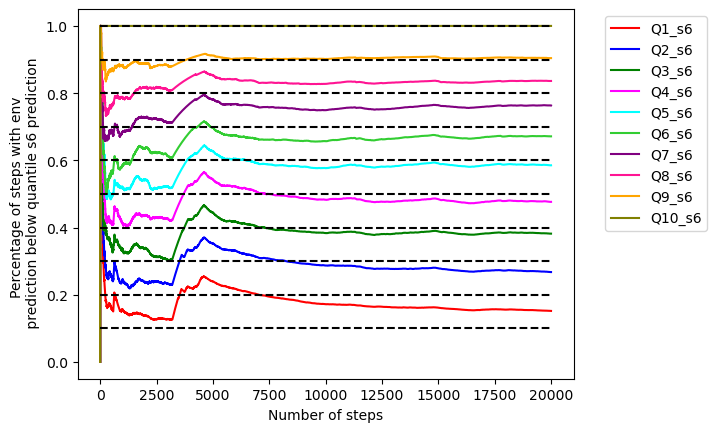

In [15]:
# s6 
variable = "s6"
nb_belowq1_list_s6, nb_belowq2_list_s6, nb_belowq3_list_s6, nb_belowq4_list_s6, nb_belowq5_list_s6, nb_belowq6_list_s6, nb_belowq7_list_s6, nb_belowq8_list_s6, nb_belowq9_list_s6, nb_belowq10_list_s6 = nb_below_quantile(env_s6, quantile0_s6, quantile1_s6, quantile2_s6, quantile3_s6, quantile4_s6, quantile5_s6, quantile6_s6, quantile7_s6, quantile8_s6, quantile9_s6, quantile10_s6)
plot_nb_below_quantiles(prob, nb_belowq1_list_s6, nb_belowq2_list_s6, nb_belowq3_list_s6, nb_belowq4_list_s6, nb_belowq5_list_s6, nb_belowq6_list_s6, nb_belowq7_list_s6, nb_belowq8_list_s6, nb_belowq9_list_s6, nb_belowq10_list_s6, variable)


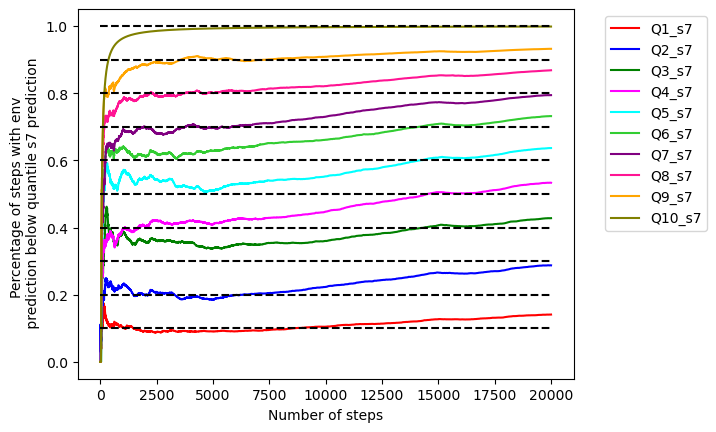

In [16]:
# s7 
variable = "s7"
nb_belowq1_list_s7, nb_belowq2_list_s7, nb_belowq3_list_s7, nb_belowq4_list_s7, nb_belowq5_list_s7, nb_belowq6_list_s7, nb_belowq7_list_s7, nb_belowq8_list_s7, nb_belowq9_list_s7, nb_belowq10_list_s7 = nb_below_quantile(env_s7, quantile0_s7, quantile1_s7, quantile2_s7, quantile3_s7, quantile4_s7, quantile5_s7, quantile6_s7, quantile7_s7, quantile8_s7, quantile9_s7, quantile10_s7)
plot_nb_below_quantiles(prob, nb_belowq1_list_s7, nb_belowq2_list_s7, nb_belowq3_list_s7, nb_belowq4_list_s7, nb_belowq5_list_s7, nb_belowq6_list_s7, nb_belowq7_list_s7, nb_belowq8_list_s7, nb_belowq9_list_s7, nb_belowq10_list_s7, variable)


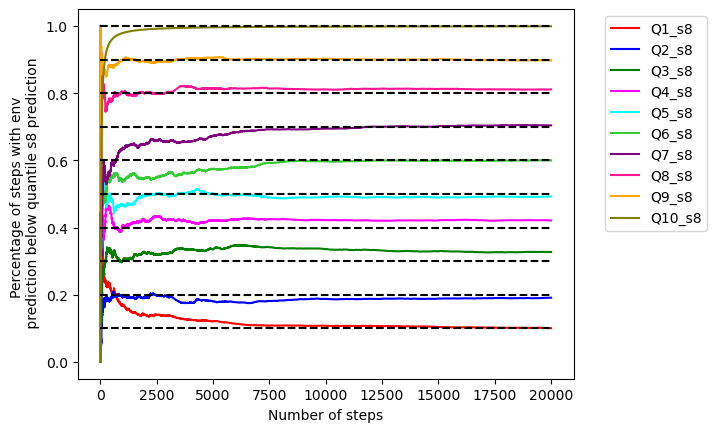

In [17]:
# s8 
variable = "s8"
nb_belowq1_list_s8, nb_belowq2_list_s8, nb_belowq3_list_s8, nb_belowq4_list_s8, nb_belowq5_list_s8, nb_belowq6_list_s8, nb_belowq7_list_s8, nb_belowq8_list_s8, nb_belowq9_list_s8, nb_belowq10_list_s8 = nb_below_quantile(env_s8, quantile0_s8, quantile1_s8, quantile2_s8, quantile3_s8, quantile4_s8, quantile5_s8, quantile6_s8, quantile7_s8, quantile8_s8, quantile9_s8, quantile10_s8)
plot_nb_below_quantiles(prob, nb_belowq1_list_s8, nb_belowq2_list_s8, nb_belowq3_list_s8, nb_belowq4_list_s8, nb_belowq5_list_s8, nb_belowq6_list_s8, nb_belowq7_list_s8, nb_belowq8_list_s8, nb_belowq9_list_s8, nb_belowq10_list_s8, variable)


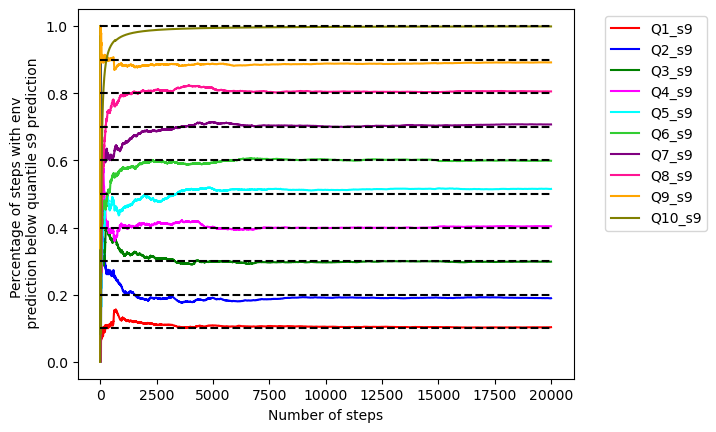

In [18]:
# s9 
variable = "s9"
nb_belowq1_list_s9, nb_belowq2_list_s9, nb_belowq3_list_s9, nb_belowq4_list_s9, nb_belowq5_list_s9, nb_belowq6_list_s9, nb_belowq7_list_s9, nb_belowq8_list_s9, nb_belowq9_list_s9, nb_belowq10_list_s9 = nb_below_quantile(env_s9, quantile0_s9, quantile1_s9, quantile2_s9, quantile3_s9, quantile4_s9, quantile5_s9, quantile6_s9, quantile7_s9, quantile8_s9, quantile9_s9, quantile10_s9)
plot_nb_below_quantiles(prob, nb_belowq1_list_s9, nb_belowq2_list_s9, nb_belowq3_list_s9, nb_belowq4_list_s9, nb_belowq5_list_s9, nb_belowq6_list_s9, nb_belowq7_list_s9, nb_belowq8_list_s9, nb_belowq9_list_s9, nb_belowq10_list_s9, variable)


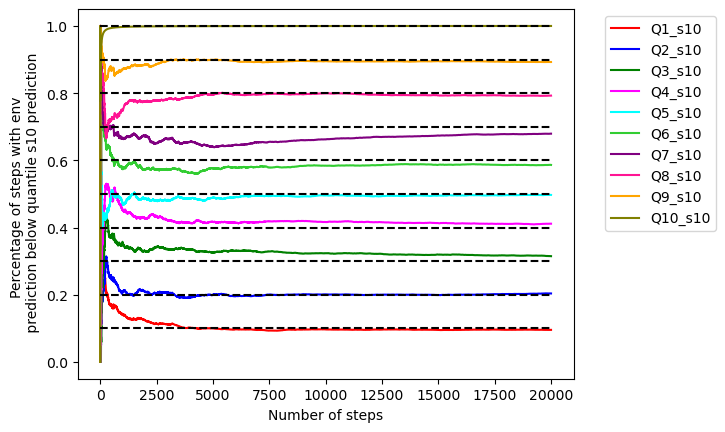

In [19]:
# s10 
variable = "s10"
nb_belowq1_list_s10, nb_belowq2_list_s10, nb_belowq3_list_s10, nb_belowq4_list_s10, nb_belowq5_list_s10, nb_belowq6_list_s10, nb_belowq7_list_s10, nb_belowq8_list_s10, nb_belowq9_list_s10, nb_belowq10_list_s10 = nb_below_quantile(env_s10, quantile0_s10, quantile1_s10, quantile2_s10, quantile3_s10, quantile4_s10, quantile5_s10, quantile6_s10, quantile7_s10, quantile8_s10, quantile9_s10, quantile10_s10)
plot_nb_below_quantiles(prob, nb_belowq1_list_s10, nb_belowq2_list_s10, nb_belowq3_list_s10, nb_belowq4_list_s10, nb_belowq5_list_s10, nb_belowq6_list_s10, nb_belowq7_list_s10, nb_belowq8_list_s10, nb_belowq9_list_s10, nb_belowq10_list_s10, variable)


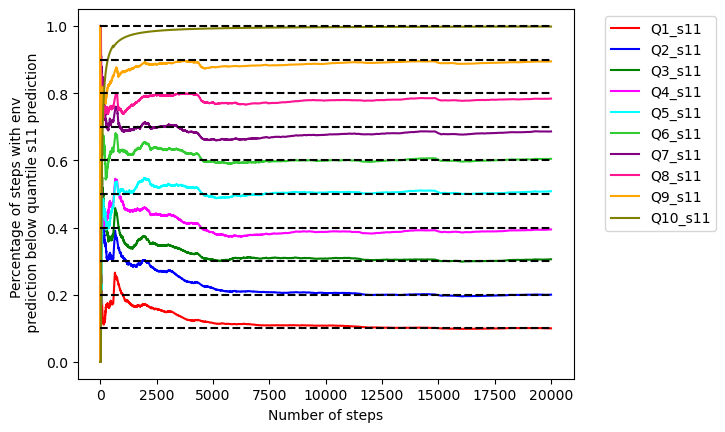

In [ ]:
# s11 
variable = "s11"
nb_belowq1_list_s11, nb_belowq2_list_s11, nb_belowq3_list_s11, nb_belowq4_list_s11, nb_belowq5_list_s11, nb_belowq6_list_s11, nb_belowq7_list_s11, nb_belowq8_list_s11, nb_belowq9_list_s11, nb_belowq10_list_s11 = nb_below_quantile(env_s11, quantile0_s11, quantile1_s11, quantile2_s11, quantile3_s11, quantile4_s11, quantile5_s11, quantile6_s11, quantile7_s11, quantile8_s11, quantile9_s11, quantile10_s11)
plot_nb_below_quantiles(prob, nb_belowq1_list_s11, nb_belowq2_list_s11, nb_belowq3_list_s11, nb_belowq4_list_s11, nb_belowq5_list_s11, nb_belowq6_list_s11, nb_belowq7_list_s11, nb_belowq8_list_s11, nb_belowq9_list_s11, nb_belowq10_list_s11, variable)


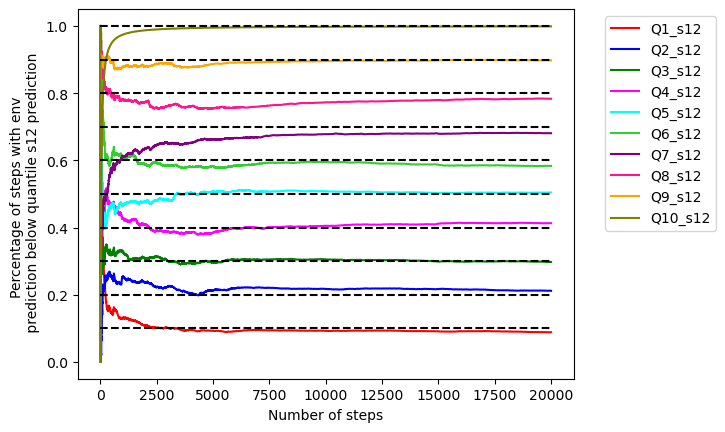

In [25]:
# s12 
variable = "s12"
nb_belowq1_list_s12, nb_belowq2_list_s12, nb_belowq3_list_s12, nb_belowq4_list_s12, nb_belowq5_list_s12, nb_belowq6_list_s12, nb_belowq7_list_s12, nb_belowq8_list_s12, nb_belowq9_list_s12, nb_belowq10_list_s12 = nb_below_quantile(env_s12, quantile0_s12, quantile1_s12, quantile2_s12, quantile3_s12, quantile4_s12, quantile5_s12, quantile6_s12, quantile7_s12, quantile8_s12, quantile9_s12, quantile10_s12)
plot_nb_below_quantiles(prob, nb_belowq1_list_s12, nb_belowq2_list_s12, nb_belowq3_list_s12, nb_belowq4_list_s12, nb_belowq5_list_s12, nb_belowq6_list_s12, nb_belowq7_list_s12, nb_belowq8_list_s12, nb_belowq9_list_s12, nb_belowq10_list_s12, variable)


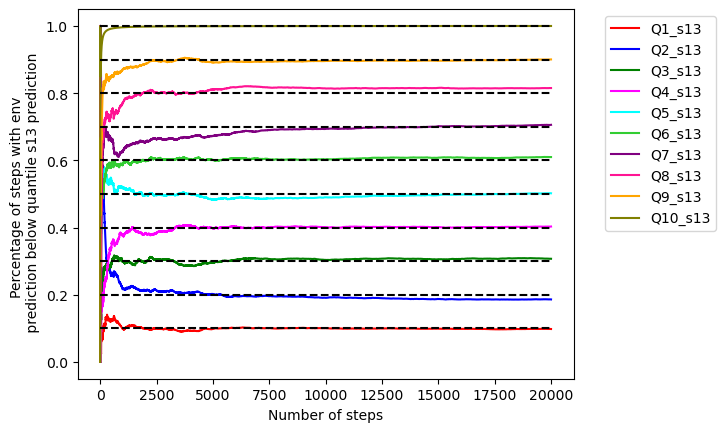

In [26]:
# s13 
variable = "s13"
nb_belowq1_list_s13, nb_belowq2_list_s13, nb_belowq3_list_s13, nb_belowq4_list_s13, nb_belowq5_list_s13, nb_belowq6_list_s13, nb_belowq7_list_s13, nb_belowq8_list_s13, nb_belowq9_list_s13, nb_belowq10_list_s13 = nb_below_quantile(env_s13, quantile0_s13, quantile1_s13, quantile2_s13, quantile3_s13, quantile4_s13, quantile5_s13, quantile6_s13, quantile7_s13, quantile8_s13, quantile9_s13, quantile10_s13)
plot_nb_below_quantiles(prob, nb_belowq1_list_s13, nb_belowq2_list_s13, nb_belowq3_list_s13, nb_belowq4_list_s13, nb_belowq5_list_s13, nb_belowq6_list_s13, nb_belowq7_list_s13, nb_belowq8_list_s13, nb_belowq9_list_s13, nb_belowq10_list_s13, variable)


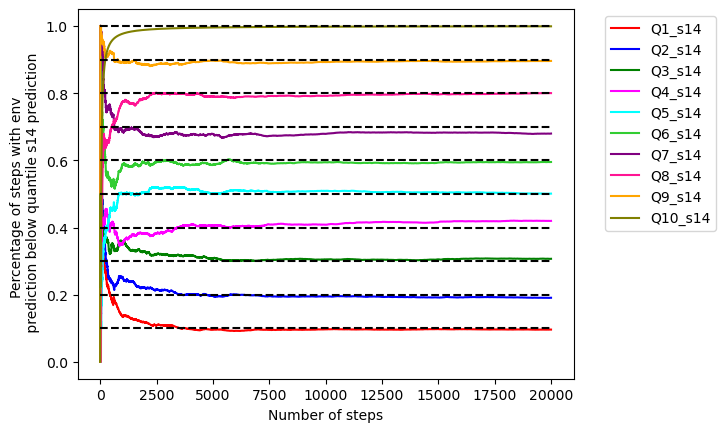

In [27]:
# s14 
variable = "s14"
nb_belowq1_list_s14, nb_belowq2_list_s14, nb_belowq3_list_s14, nb_belowq4_list_s14, nb_belowq5_list_s14, nb_belowq6_list_s14, nb_belowq7_list_s14, nb_belowq8_list_s14, nb_belowq9_list_s14, nb_belowq10_list_s14 = nb_below_quantile(env_s14, quantile0_s14, quantile1_s14, quantile2_s14, quantile3_s14, quantile4_s14, quantile5_s14, quantile6_s14, quantile7_s14, quantile8_s14, quantile9_s14, quantile10_s14)
plot_nb_below_quantiles(prob, nb_belowq1_list_s14, nb_belowq2_list_s14, nb_belowq3_list_s14, nb_belowq4_list_s14, nb_belowq5_list_s14, nb_belowq6_list_s14, nb_belowq7_list_s14, nb_belowq8_list_s14, nb_belowq9_list_s14, nb_belowq10_list_s14, variable)


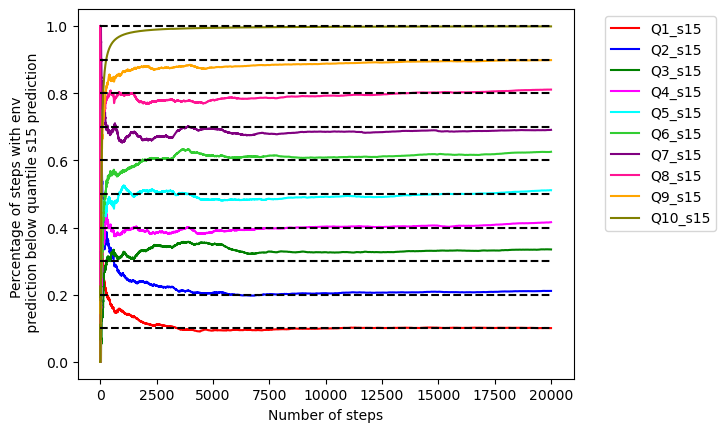

In [30]:
# s15 
variable = "s15"
nb_belowq1_list_s15, nb_belowq2_list_s15, nb_belowq3_list_s15, nb_belowq4_list_s15, nb_belowq5_list_s15, nb_belowq6_list_s15, nb_belowq7_list_s15, nb_belowq8_list_s15, nb_belowq9_list_s15, nb_belowq10_list_s15 = nb_below_quantile(env_s15, quantile0_s15, quantile1_s15, quantile2_s15, quantile3_s15, quantile4_s15, quantile5_s15, quantile6_s15, quantile7_s15, quantile8_s15, quantile9_s15, quantile10_s15)
plot_nb_below_quantiles(prob, nb_belowq1_list_s15, nb_belowq2_list_s15, nb_belowq3_list_s15, nb_belowq4_list_s15, nb_belowq5_list_s15, nb_belowq6_list_s15, nb_belowq7_list_s15, nb_belowq8_list_s15, nb_belowq9_list_s15, nb_belowq10_list_s15, variable)


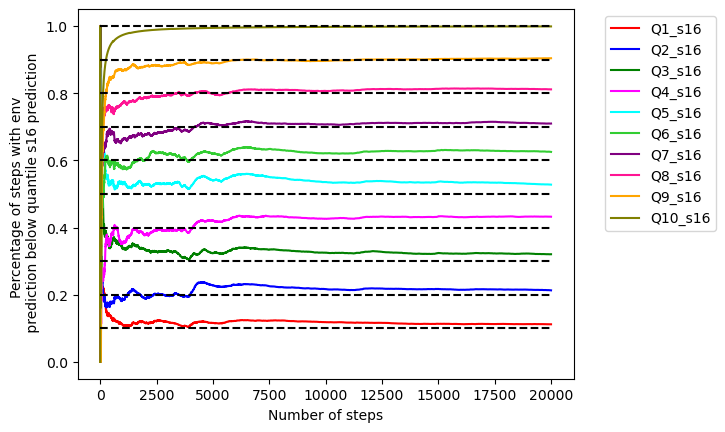

In [29]:
# s16 
variable = "s16"
nb_belowq1_list_s16, nb_belowq2_list_s16, nb_belowq3_list_s16, nb_belowq4_list_s16, nb_belowq5_list_s16, nb_belowq6_list_s16, nb_belowq7_list_s16, nb_belowq8_list_s16, nb_belowq9_list_s16, nb_belowq10_list_s16 = nb_below_quantile(env_s16, quantile0_s16, quantile1_s16, quantile2_s16, quantile3_s16, quantile4_s16, quantile5_s16, quantile6_s16, quantile7_s16, quantile8_s16, quantile9_s16, quantile10_s16)
plot_nb_below_quantiles(prob, nb_belowq1_list_s16, nb_belowq2_list_s16, nb_belowq3_list_s16, nb_belowq4_list_s16, nb_belowq5_list_s16, nb_belowq6_list_s16, nb_belowq7_list_s16, nb_belowq8_list_s16, nb_belowq9_list_s16, nb_belowq10_list_s16, variable)


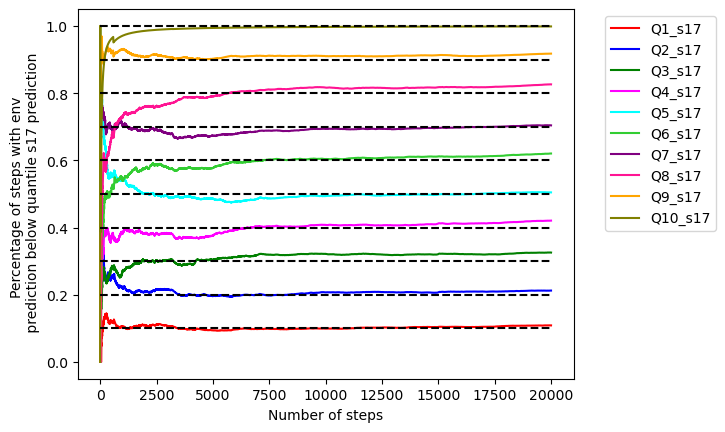

In [31]:
# s17 
variable = "s17"
nb_belowq1_list_s17, nb_belowq2_list_s17, nb_belowq3_list_s17, nb_belowq4_list_s17, nb_belowq5_list_s17, nb_belowq6_list_s17, nb_belowq7_list_s17, nb_belowq8_list_s17, nb_belowq9_list_s17, nb_belowq10_list_s17 = nb_below_quantile(env_s17, quantile0_s17, quantile1_s17, quantile2_s17, quantile3_s17, quantile4_s17, quantile5_s17, quantile6_s17, quantile7_s17, quantile8_s17, quantile9_s17, quantile10_s17)
plot_nb_below_quantiles(prob, nb_belowq1_list_s17, nb_belowq2_list_s17, nb_belowq3_list_s17, nb_belowq4_list_s17, nb_belowq5_list_s17, nb_belowq6_list_s17, nb_belowq7_list_s17, nb_belowq8_list_s17, nb_belowq9_list_s17, nb_belowq10_list_s17, variable)


## MuJoCo Pusher (2D)


In [40]:
prob = "MuJoCoPusher"


Run

In [45]:
seed = 0
env = gym.make('Pusher-v5').unwrapped
env.reset(seed=seed)

error_magnitudes_s0 = []
error_magnitudes_s1 = []
error_magnitudes_s2 = []
error_magnitudes_s3 = []
error_magnitudes_s4 = []
error_magnitudes_s5 = []
error_magnitudes_s6 = []
error_magnitudes_s7 = []
error_magnitudes_s8 = []
error_magnitudes_s9 = []
error_magnitudes_s10 = []
error_magnitudes_s11 = []
error_magnitudes_s12 = []
error_magnitudes_s13 = []
error_magnitudes_s14 = []
error_magnitudes_s15 = []
error_magnitudes_s16 = []
error_magnitudes_s17 = []
error_magnitudes_s18 = []
error_magnitudes_s19 = []
error_magnitudes_s20 = []
error_magnitudes_s21 = []
error_magnitudes_s22 = []

env_s0 = []
env_s1 = []
env_s2 = []
env_s3 = []
env_s4 = []
env_s5 = []
env_s6 = []
env_s7 = []
env_s8 = []
env_s9 = []
env_s10 = []
env_s11 = []
env_s12 = []
env_s13 = []
env_s14 = []
env_s15 = []
env_s16 = []
env_s17 = []
env_s18 = []
env_s19 = []
env_s20 = []
env_s21 = []
env_s22 = []

pred_s0 = []
pred_s1 = []
pred_s2 = []
pred_s3 = []
pred_s4 = []
pred_s5 = []
pred_s6 = []
pred_s7 = []
pred_s8 = []
pred_s9 = []
pred_s10 = []
pred_s11 = []
pred_s12 = []
pred_s13 = []
pred_s14 = []
pred_s15 = []
pred_s16 = []
pred_s17 = []
pred_s18 = []
pred_s19 = []
pred_s20 = []
pred_s21 = []
pred_s22 = []

# quantile 0 data
quantile0_s0 = []
quantile0_s1 = []
quantile0_s2 = []
quantile0_s3 = []
quantile0_s4 = []
quantile0_s5 = []
quantile0_s6 = []
quantile0_s7 = []
quantile0_s8 = []
quantile0_s9 = []
quantile0_s10 = []
quantile0_s11 = []
quantile0_s12 = []
quantile0_s13 = []
quantile0_s14 = []
quantile0_s15 = []
quantile0_s16 = []
quantile0_s17 = []
quantile0_s18 = []
quantile0_s19 = []
quantile0_s20 = []
quantile0_s21 = []
quantile0_s22 = []

# quantile 1 data
quantile1_s0 = []
quantile1_s1 = []
quantile1_s2 = []
quantile1_s3 = []
quantile1_s4 = []
quantile1_s5 = []
quantile1_s6 = []
quantile1_s7 = []
quantile1_s8 = []
quantile1_s9 = []
quantile1_s10 = []
quantile1_s11 = []
quantile1_s12 = []
quantile1_s13 = []
quantile1_s14 = []
quantile1_s15 = []
quantile1_s16 = []
quantile1_s17 = []
quantile1_s18 = []
quantile1_s19 = []
quantile1_s20 = []
quantile1_s21 = []
quantile1_s22 = []

# quantile 2 data
quantile2_s0 = []
quantile2_s1 = []
quantile2_s2 = []
quantile2_s3 = []
quantile2_s4 = []
quantile2_s5 = []
quantile2_s6 = []
quantile2_s7 = []
quantile2_s8 = []
quantile2_s9 = []
quantile2_s10 = []
quantile2_s11 = []
quantile2_s12 = []
quantile2_s13 = []
quantile2_s14 = []
quantile2_s15 = []
quantile2_s16 = []
quantile2_s17 = []
quantile2_s18 = []
quantile2_s19 = []
quantile2_s20 = []
quantile2_s21 = []
quantile2_s22 = []

# quantile 3 data
quantile3_s0 = []
quantile3_s1 = []
quantile3_s2 = []
quantile3_s3 = []
quantile3_s4 = []
quantile3_s5 = []
quantile3_s6 = []
quantile3_s7 = []
quantile3_s8 = []
quantile3_s9 = []
quantile3_s10 = []
quantile3_s11 = []
quantile3_s12 = []
quantile3_s13 = []
quantile3_s14 = []
quantile3_s15 = []
quantile3_s16 = []
quantile3_s17 = []
quantile3_s18 = []
quantile3_s19 = []
quantile3_s20 = []
quantile3_s21 = []
quantile3_s22 = []

# quantile 4 data
quantile4_s0 = []
quantile4_s1 = []
quantile4_s2 = []
quantile4_s3 = []
quantile4_s4 = []
quantile4_s5 = []
quantile4_s6 = []
quantile4_s7 = []
quantile4_s8 = []
quantile4_s9 = []
quantile4_s10 = []
quantile4_s11 = []
quantile4_s12 = []
quantile4_s13 = []
quantile4_s14 = []
quantile4_s15 = []
quantile4_s16 = []
quantile4_s17 = []
quantile4_s18 = []
quantile4_s19 = []
quantile4_s20 = []
quantile4_s21 = []
quantile4_s22 = []

# quantile 5 data
quantile5_s0 = []
quantile5_s1 = []
quantile5_s2 = []
quantile5_s3 = []
quantile5_s4 = []
quantile5_s5 = []
quantile5_s6 = []
quantile5_s7 = []
quantile5_s8 = []
quantile5_s9 = []
quantile5_s10 = []
quantile5_s11 = []
quantile5_s12 = []
quantile5_s13 = []
quantile5_s14 = []
quantile5_s15 = []
quantile5_s16 = []
quantile5_s17 = []
quantile5_s18 = []
quantile5_s19 = []
quantile5_s20 = []
quantile5_s21 = []
quantile5_s22 = []

# quantile 6 data
quantile6_s0 = []
quantile6_s1 = []
quantile6_s2 = []
quantile6_s3 = []
quantile6_s4 = []
quantile6_s5 = []
quantile6_s6 = []
quantile6_s7 = []
quantile6_s8 = []
quantile6_s9 = []
quantile6_s10 = []
quantile6_s11 = []
quantile6_s12 = []
quantile6_s13 = []
quantile6_s14 = []
quantile6_s15 = []
quantile6_s16 = []
quantile6_s17 = []
quantile6_s18 = []
quantile6_s19 = []
quantile6_s20 = []
quantile6_s21 = []
quantile6_s22 = []

# quantile 7 data
quantile7_s0 = []
quantile7_s1 = []
quantile7_s2 = []
quantile7_s3 = []
quantile7_s4 = []
quantile7_s5 = []
quantile7_s6 = []
quantile7_s7 = []
quantile7_s8 = []
quantile7_s9 = []
quantile7_s10 = []
quantile7_s11 = []
quantile7_s12 = []
quantile7_s13 = []
quantile7_s14 = []
quantile7_s15 = []
quantile7_s16 = []
quantile7_s17 = []
quantile7_s18 = []
quantile7_s19 = []
quantile7_s20 = []
quantile7_s21 = []
quantile7_s22 = []

# quantile 8 data
quantile8_s0 = []
quantile8_s1 = []
quantile8_s2 = []
quantile8_s3 = []
quantile8_s4 = []
quantile8_s5 = []
quantile8_s6 = []
quantile8_s7 = []
quantile8_s8 = []
quantile8_s9 = []
quantile8_s10 = []
quantile8_s11 = []
quantile8_s12 = []
quantile8_s13 = []
quantile8_s14 = []
quantile8_s15 = []
quantile8_s16 = []
quantile8_s17 = []
quantile8_s18 = []
quantile8_s19 = []
quantile8_s20 = []
quantile8_s21 = []
quantile8_s22 = []

# quantile 9 data
quantile9_s0 = []
quantile9_s1 = []
quantile9_s2 = []
quantile9_s3 = []
quantile9_s4 = []
quantile9_s5 = []
quantile9_s6 = []
quantile9_s7 = []
quantile9_s8 = []
quantile9_s9 = []
quantile9_s10 = []
quantile9_s11 = []
quantile9_s12 = []
quantile9_s13 = []
quantile9_s14 = []
quantile9_s15 = []
quantile9_s16 = []
quantile9_s17 = []
quantile9_s18 = []
quantile9_s19 = []
quantile9_s20 = []
quantile9_s21 = []
quantile9_s22 = []

# quantile 10 data
quantile10_s0 = []
quantile10_s1 = []
quantile10_s2 = []
quantile10_s3 = []
quantile10_s4 = []
quantile10_s5 = []
quantile10_s6 = []
quantile10_s7 = []
quantile10_s8 = []
quantile10_s9 = []
quantile10_s10 = []
quantile10_s11 = []
quantile10_s12 = []
quantile10_s13 = []
quantile10_s14 = []
quantile10_s15 = []
quantile10_s16 = []
quantile10_s17 = []
quantile10_s18 = []
quantile10_s19 = []
quantile10_s20 = []
quantile10_s21 = []
quantile10_s22 = []

actions_lows = env.action_space.low
actions_highs = env.action_space.high
states_low = torch.tensor([-100]*23)
states_high = torch.tensor([100]*23)
state_dim = len(states_low)
action_dim = len(actions_lows)

quantiles = torch.tensor(np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), dtype=torch.float32)

num_quantiles = len(quantiles)

# Initialize the Next-State Prediction Network
model = NextStateQuantileNetwork(state_dim, action_dim, num_quantiles)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Experience replay buffer
replay_buffer = []
batch_size = 32

num_test_steps = 20000
state, _ = env.reset(seed=seed)
episode_reward = 0
actions_list = []
done = False
truncated = False

actions_taken = np.zeros((num_test_steps, action_dim))
env.action_space.seed(seed)
discrete = False

for step in range(num_test_steps):
    action = env.action_space.sample()
    actions_taken[step] = action
    
    next_state, reward, done, truncated, info = env.step(action)
    episode_reward += reward
    
    if step >= 1:
        
        test_next_state = torch.tensor(next_state, dtype=torch.float32)
        
        if discrete:
            test_action = torch.tensor(np.array([action]), dtype=torch.float32)
        else:
            test_action = torch.tensor(action, dtype=torch.float32)
        test_state = torch.tensor(state, dtype=torch.float32)
        test_state = torch.clip(test_state, states_low, states_high)

        # Predict next state quantiles
        predicted_quantiles = model(test_state, test_action)  # Shape: (1, num_quantiles, state_dim)
        mid_quantile = get_mid_quantile(num_quantiles, predicted_quantiles)
        
        pred_s0 = np.append(pred_s0, mid_quantile[0][0])
        pred_s1 = np.append(pred_s1, mid_quantile[0][1])
        pred_s2 = np.append(pred_s2, mid_quantile[0][2])
        pred_s3 = np.append(pred_s3, mid_quantile[0][3])
        pred_s4 = np.append(pred_s4, mid_quantile[0][4])
        pred_s5 = np.append(pred_s5, mid_quantile[0][5])
        pred_s6 = np.append(pred_s6, mid_quantile[0][6])
        pred_s7 = np.append(pred_s7, mid_quantile[0][7])
        pred_s8 = np.append(pred_s8, mid_quantile[0][8])
        pred_s9 = np.append(pred_s9, mid_quantile[0][9])
        pred_s10 = np.append(pred_s10, mid_quantile[0][10])
        pred_s11 = np.append(pred_s11, mid_quantile[0][11])
        pred_s12 = np.append(pred_s12, mid_quantile[0][12])
        pred_s13 = np.append(pred_s13, mid_quantile[0][13])
        pred_s14 = np.append(pred_s14, mid_quantile[0][14])
        pred_s15 = np.append(pred_s15, mid_quantile[0][15])
        pred_s16 = np.append(pred_s16, mid_quantile[0][16])
        pred_s17 = np.append(pred_s17, mid_quantile[0][17])
        pred_s18 = np.append(pred_s18, mid_quantile[0][18])
        pred_s19 = np.append(pred_s19, mid_quantile[0][19])
        pred_s20 = np.append(pred_s20, mid_quantile[0][20])
        pred_s21 = np.append(pred_s21, mid_quantile[0][21])
        pred_s22 = np.append(pred_s22, mid_quantile[0][22])
        
        # Quantile 0 data
        quantile0_s0 = np.append(quantile0_s0, predicted_quantiles[0][0][0].item())
        quantile0_s1 = np.append(quantile0_s1, predicted_quantiles[0][0][1].item())
        quantile0_s2 = np.append(quantile0_s2, predicted_quantiles[0][0][2].item())
        quantile0_s3 = np.append(quantile0_s3, predicted_quantiles[0][0][3].item())
        quantile0_s4 = np.append(quantile0_s4, predicted_quantiles[0][0][4].item())
        quantile0_s5 = np.append(quantile0_s5, predicted_quantiles[0][0][5].item())
        quantile0_s6 = np.append(quantile0_s6, predicted_quantiles[0][0][6].item())
        quantile0_s7 = np.append(quantile0_s7, predicted_quantiles[0][0][7].item())
        quantile0_s8 = np.append(quantile0_s8, predicted_quantiles[0][0][8].item())
        quantile0_s9 = np.append(quantile0_s9, predicted_quantiles[0][0][9].item())
        quantile0_s10 = np.append(quantile0_s10, predicted_quantiles[0][0][10].item())
        quantile0_s11 = np.append(quantile0_s11, predicted_quantiles[0][0][11].item())
        quantile0_s12 = np.append(quantile0_s12, predicted_quantiles[0][0][12].item())
        quantile0_s13 = np.append(quantile0_s13, predicted_quantiles[0][0][13].item())
        quantile0_s14 = np.append(quantile0_s14, predicted_quantiles[0][0][14].item())
        quantile0_s15 = np.append(quantile0_s15, predicted_quantiles[0][0][15].item())
        quantile0_s16 = np.append(quantile0_s16, predicted_quantiles[0][0][16].item())
        quantile0_s17 = np.append(quantile0_s17, predicted_quantiles[0][0][17].item())
        quantile0_s18 = np.append(quantile0_s18, predicted_quantiles[0][0][18].item())
        quantile0_s19 = np.append(quantile0_s19, predicted_quantiles[0][0][19].item())
        quantile0_s20 = np.append(quantile0_s20, predicted_quantiles[0][0][20].item())
        quantile0_s21 = np.append(quantile0_s21, predicted_quantiles[0][0][21].item())
        quantile0_s22 = np.append(quantile0_s22, predicted_quantiles[0][0][22].item())
        
        # Quantile 1 data
        quantile1_s0 = np.append(quantile1_s0, predicted_quantiles[0][1][0].item())
        quantile1_s1 = np.append(quantile1_s1, predicted_quantiles[0][1][1].item())
        quantile1_s2 = np.append(quantile1_s2, predicted_quantiles[0][1][2].item())
        quantile1_s3 = np.append(quantile1_s3, predicted_quantiles[0][1][3].item())
        quantile1_s4 = np.append(quantile1_s4, predicted_quantiles[0][1][4].item())
        quantile1_s5 = np.append(quantile1_s5, predicted_quantiles[0][1][5].item())
        quantile1_s6 = np.append(quantile1_s6, predicted_quantiles[0][1][6].item())
        quantile1_s7 = np.append(quantile1_s7, predicted_quantiles[0][1][7].item())
        quantile1_s8 = np.append(quantile1_s8, predicted_quantiles[0][1][8].item())
        quantile1_s9 = np.append(quantile1_s9, predicted_quantiles[0][1][9].item())
        quantile1_s10 = np.append(quantile1_s10, predicted_quantiles[0][1][10].item())
        quantile1_s11 = np.append(quantile1_s11, predicted_quantiles[0][1][11].item())
        quantile1_s12 = np.append(quantile1_s12, predicted_quantiles[0][1][12].item())
        quantile1_s13 = np.append(quantile1_s13, predicted_quantiles[0][1][13].item())
        quantile1_s14 = np.append(quantile1_s14, predicted_quantiles[0][1][14].item())
        quantile1_s15 = np.append(quantile1_s15, predicted_quantiles[0][1][15].item())
        quantile1_s16 = np.append(quantile1_s16, predicted_quantiles[0][1][16].item())
        quantile1_s17 = np.append(quantile1_s17, predicted_quantiles[0][1][17].item())
        quantile1_s18 = np.append(quantile1_s18, predicted_quantiles[0][1][18].item())
        quantile1_s19 = np.append(quantile1_s19, predicted_quantiles[0][1][19].item())
        quantile1_s20 = np.append(quantile1_s20, predicted_quantiles[0][1][20].item())
        quantile1_s21 = np.append(quantile1_s21, predicted_quantiles[0][1][21].item())
        quantile1_s22 = np.append(quantile1_s22, predicted_quantiles[0][1][22].item())
        
        # Quantile 2 data
        quantile2_s0 = np.append(quantile2_s0, predicted_quantiles[0][2][0].item())
        quantile2_s1 = np.append(quantile2_s1, predicted_quantiles[0][2][1].item())
        quantile2_s2 = np.append(quantile2_s2, predicted_quantiles[0][2][2].item())
        quantile2_s3 = np.append(quantile2_s3, predicted_quantiles[0][2][3].item())
        quantile2_s4 = np.append(quantile2_s4, predicted_quantiles[0][2][4].item())
        quantile2_s5 = np.append(quantile2_s5, predicted_quantiles[0][2][5].item())
        quantile2_s6 = np.append(quantile2_s6, predicted_quantiles[0][2][6].item())
        quantile2_s7 = np.append(quantile2_s7, predicted_quantiles[0][2][7].item())
        quantile2_s8 = np.append(quantile2_s8, predicted_quantiles[0][2][8].item())
        quantile2_s9 = np.append(quantile2_s9, predicted_quantiles[0][2][9].item())
        quantile2_s10 = np.append(quantile2_s10, predicted_quantiles[0][2][10].item())
        quantile2_s11 = np.append(quantile2_s11, predicted_quantiles[0][2][11].item())
        quantile2_s12 = np.append(quantile2_s12, predicted_quantiles[0][2][12].item())
        quantile2_s13 = np.append(quantile2_s13, predicted_quantiles[0][2][13].item())
        quantile2_s14 = np.append(quantile2_s14, predicted_quantiles[0][2][14].item())
        quantile2_s15 = np.append(quantile2_s15, predicted_quantiles[0][2][15].item())
        quantile2_s16 = np.append(quantile2_s16, predicted_quantiles[0][2][16].item())
        quantile2_s17 = np.append(quantile2_s17, predicted_quantiles[0][2][17].item())
        quantile2_s18 = np.append(quantile2_s18, predicted_quantiles[0][2][18].item())
        quantile2_s19 = np.append(quantile2_s19, predicted_quantiles[0][2][19].item())
        quantile2_s20 = np.append(quantile2_s20, predicted_quantiles[0][2][20].item())
        quantile2_s21 = np.append(quantile2_s21, predicted_quantiles[0][2][21].item())
        quantile2_s22 = np.append(quantile2_s22, predicted_quantiles[0][2][22].item())
        
        # Quantile 3
        quantile3_s0 = np.append(quantile3_s0, predicted_quantiles[0][3][0].item())
        quantile3_s1 = np.append(quantile3_s1, predicted_quantiles[0][3][1].item())
        quantile3_s2 = np.append(quantile3_s2, predicted_quantiles[0][3][2].item())
        quantile3_s3 = np.append(quantile3_s3, predicted_quantiles[0][3][3].item())
        quantile3_s4 = np.append(quantile3_s4, predicted_quantiles[0][3][4].item())
        quantile3_s5 = np.append(quantile3_s5, predicted_quantiles[0][3][5].item())
        quantile3_s6 = np.append(quantile3_s6, predicted_quantiles[0][3][6].item())
        quantile3_s7 = np.append(quantile3_s7, predicted_quantiles[0][3][7].item())
        quantile3_s8 = np.append(quantile3_s8, predicted_quantiles[0][3][8].item())
        quantile3_s9 = np.append(quantile3_s9, predicted_quantiles[0][3][9].item())
        quantile3_s10 = np.append(quantile3_s10, predicted_quantiles[0][3][10].item())
        quantile3_s11 = np.append(quantile3_s11, predicted_quantiles[0][3][11].item())
        quantile3_s12 = np.append(quantile3_s12, predicted_quantiles[0][3][12].item())
        quantile3_s13 = np.append(quantile3_s13, predicted_quantiles[0][3][13].item())
        quantile3_s14 = np.append(quantile3_s14, predicted_quantiles[0][3][14].item())
        quantile3_s15 = np.append(quantile3_s15, predicted_quantiles[0][3][15].item())
        quantile3_s16 = np.append(quantile3_s16, predicted_quantiles[0][3][16].item())
        quantile3_s17 = np.append(quantile3_s17, predicted_quantiles[0][3][17].item())
        quantile3_s18 = np.append(quantile3_s18, predicted_quantiles[0][3][18].item())
        quantile3_s19 = np.append(quantile3_s19, predicted_quantiles[0][3][19].item())
        quantile3_s20 = np.append(quantile3_s20, predicted_quantiles[0][3][20].item())
        quantile3_s21 = np.append(quantile3_s21, predicted_quantiles[0][3][21].item())
        quantile3_s22 = np.append(quantile3_s22, predicted_quantiles[0][3][22].item())

        # Quantile 4
        quantile4_s0 = np.append(quantile4_s0, predicted_quantiles[0][4][0].item())
        quantile4_s1 = np.append(quantile4_s1, predicted_quantiles[0][4][1].item())
        quantile4_s2 = np.append(quantile4_s2, predicted_quantiles[0][4][2].item())
        quantile4_s3 = np.append(quantile4_s3, predicted_quantiles[0][4][3].item())
        quantile4_s4 = np.append(quantile4_s4, predicted_quantiles[0][4][4].item())
        quantile4_s5 = np.append(quantile4_s5, predicted_quantiles[0][4][5].item())
        quantile4_s6 = np.append(quantile4_s6, predicted_quantiles[0][4][6].item())
        quantile4_s7 = np.append(quantile4_s7, predicted_quantiles[0][4][7].item())
        quantile4_s8 = np.append(quantile4_s8, predicted_quantiles[0][4][8].item())
        quantile4_s9 = np.append(quantile4_s9, predicted_quantiles[0][4][9].item())
        quantile4_s10 = np.append(quantile4_s10, predicted_quantiles[0][4][10].item())
        quantile4_s11 = np.append(quantile4_s11, predicted_quantiles[0][4][11].item())
        quantile4_s12 = np.append(quantile4_s12, predicted_quantiles[0][4][12].item())
        quantile4_s13 = np.append(quantile4_s13, predicted_quantiles[0][4][13].item())
        quantile4_s14 = np.append(quantile4_s14, predicted_quantiles[0][4][14].item())
        quantile4_s15 = np.append(quantile4_s15, predicted_quantiles[0][4][15].item())
        quantile4_s16 = np.append(quantile4_s16, predicted_quantiles[0][4][16].item())
        quantile4_s17 = np.append(quantile4_s17, predicted_quantiles[0][4][17].item())
        quantile4_s18 = np.append(quantile4_s18, predicted_quantiles[0][4][18].item())
        quantile4_s19 = np.append(quantile4_s19, predicted_quantiles[0][4][19].item())
        quantile4_s20 = np.append(quantile4_s20, predicted_quantiles[0][4][20].item())
        quantile4_s21 = np.append(quantile4_s21, predicted_quantiles[0][4][21].item())
        quantile4_s22 = np.append(quantile4_s22, predicted_quantiles[0][4][22].item())

        # Quantile 5
        quantile5_s0 = np.append(quantile5_s0, predicted_quantiles[0][5][0].item())
        quantile5_s1 = np.append(quantile5_s1, predicted_quantiles[0][5][1].item())
        quantile5_s2 = np.append(quantile5_s2, predicted_quantiles[0][5][2].item())
        quantile5_s3 = np.append(quantile5_s3, predicted_quantiles[0][5][3].item())
        quantile5_s4 = np.append(quantile5_s4, predicted_quantiles[0][5][4].item())
        quantile5_s5 = np.append(quantile5_s5, predicted_quantiles[0][5][5].item())
        quantile5_s6 = np.append(quantile5_s6, predicted_quantiles[0][5][6].item())
        quantile5_s7 = np.append(quantile5_s7, predicted_quantiles[0][5][7].item())
        quantile5_s8 = np.append(quantile5_s8, predicted_quantiles[0][5][8].item())
        quantile5_s9 = np.append(quantile5_s9, predicted_quantiles[0][5][9].item())
        quantile5_s10 = np.append(quantile5_s10, predicted_quantiles[0][5][10].item())
        quantile5_s11 = np.append(quantile5_s11, predicted_quantiles[0][5][11].item())
        quantile5_s12 = np.append(quantile5_s12, predicted_quantiles[0][5][12].item())
        quantile5_s13 = np.append(quantile5_s13, predicted_quantiles[0][5][13].item())
        quantile5_s14 = np.append(quantile5_s14, predicted_quantiles[0][5][14].item())
        quantile5_s15 = np.append(quantile5_s15, predicted_quantiles[0][5][15].item())
        quantile5_s16 = np.append(quantile5_s16, predicted_quantiles[0][5][16].item())
        quantile5_s17 = np.append(quantile5_s17, predicted_quantiles[0][5][17].item())
        quantile5_s18 = np.append(quantile5_s18, predicted_quantiles[0][5][18].item())
        quantile5_s19 = np.append(quantile5_s19, predicted_quantiles[0][5][19].item())
        quantile5_s20 = np.append(quantile5_s20, predicted_quantiles[0][5][20].item())
        quantile5_s21 = np.append(quantile5_s21, predicted_quantiles[0][5][21].item())
        quantile5_s22 = np.append(quantile5_s22, predicted_quantiles[0][5][22].item())

        # Quantile 6
        quantile6_s0 = np.append(quantile6_s0, predicted_quantiles[0][6][0].item())
        quantile6_s1 = np.append(quantile6_s1, predicted_quantiles[0][6][1].item())
        quantile6_s2 = np.append(quantile6_s2, predicted_quantiles[0][6][2].item())
        quantile6_s3 = np.append(quantile6_s3, predicted_quantiles[0][6][3].item())
        quantile6_s4 = np.append(quantile6_s4, predicted_quantiles[0][6][4].item())
        quantile6_s5 = np.append(quantile6_s5, predicted_quantiles[0][6][5].item())
        quantile6_s6 = np.append(quantile6_s6, predicted_quantiles[0][6][6].item())
        quantile6_s7 = np.append(quantile6_s7, predicted_quantiles[0][6][7].item())
        quantile6_s8 = np.append(quantile6_s8, predicted_quantiles[0][6][8].item())
        quantile6_s9 = np.append(quantile6_s9, predicted_quantiles[0][6][9].item())
        quantile6_s10 = np.append(quantile6_s10, predicted_quantiles[0][6][10].item())
        quantile6_s11 = np.append(quantile6_s11, predicted_quantiles[0][6][11].item())
        quantile6_s12 = np.append(quantile6_s12, predicted_quantiles[0][6][12].item())
        quantile6_s13 = np.append(quantile6_s13, predicted_quantiles[0][6][13].item())
        quantile6_s14 = np.append(quantile6_s14, predicted_quantiles[0][6][14].item())
        quantile6_s15 = np.append(quantile6_s15, predicted_quantiles[0][6][15].item())
        quantile6_s16 = np.append(quantile6_s16, predicted_quantiles[0][6][16].item())
        quantile6_s17 = np.append(quantile6_s17, predicted_quantiles[0][6][17].item())
        quantile6_s18 = np.append(quantile6_s18, predicted_quantiles[0][6][18].item())
        quantile6_s19 = np.append(quantile6_s19, predicted_quantiles[0][6][19].item())
        quantile6_s20 = np.append(quantile6_s20, predicted_quantiles[0][6][20].item())
        quantile6_s21 = np.append(quantile6_s21, predicted_quantiles[0][6][21].item())
        quantile6_s22 = np.append(quantile6_s22, predicted_quantiles[0][6][22].item())

        # Quantile 7
        quantile7_s0 = np.append(quantile7_s0, predicted_quantiles[0][7][0].item())
        quantile7_s1 = np.append(quantile7_s1, predicted_quantiles[0][7][1].item())
        quantile7_s2 = np.append(quantile7_s2, predicted_quantiles[0][7][2].item())
        quantile7_s3 = np.append(quantile7_s3, predicted_quantiles[0][7][3].item())
        quantile7_s4 = np.append(quantile7_s4, predicted_quantiles[0][7][4].item())
        quantile7_s5 = np.append(quantile7_s5, predicted_quantiles[0][7][5].item())
        quantile7_s6 = np.append(quantile7_s6, predicted_quantiles[0][7][6].item())
        quantile7_s7 = np.append(quantile7_s7, predicted_quantiles[0][7][7].item())
        quantile7_s8 = np.append(quantile7_s8, predicted_quantiles[0][7][8].item())
        quantile7_s9 = np.append(quantile7_s9, predicted_quantiles[0][7][9].item())
        quantile7_s10 = np.append(quantile7_s10, predicted_quantiles[0][7][10].item())
        quantile7_s11 = np.append(quantile7_s11, predicted_quantiles[0][7][11].item())
        quantile7_s12 = np.append(quantile7_s12, predicted_quantiles[0][7][12].item())
        quantile7_s13 = np.append(quantile7_s13, predicted_quantiles[0][7][13].item())
        quantile7_s14 = np.append(quantile7_s14, predicted_quantiles[0][7][14].item())
        quantile7_s15 = np.append(quantile7_s15, predicted_quantiles[0][7][15].item())
        quantile7_s16 = np.append(quantile7_s16, predicted_quantiles[0][7][16].item())
        quantile7_s17 = np.append(quantile7_s17, predicted_quantiles[0][7][17].item())
        quantile7_s18 = np.append(quantile7_s18, predicted_quantiles[0][7][18].item())
        quantile7_s19 = np.append(quantile7_s19, predicted_quantiles[0][7][19].item())
        quantile7_s20 = np.append(quantile7_s20, predicted_quantiles[0][7][20].item())
        quantile7_s21 = np.append(quantile7_s21, predicted_quantiles[0][7][21].item())
        quantile7_s22 = np.append(quantile7_s22, predicted_quantiles[0][7][22].item())

        # Quantile 8
        quantile8_s0 = np.append(quantile8_s0, predicted_quantiles[0][8][0].item())
        quantile8_s1 = np.append(quantile8_s1, predicted_quantiles[0][8][1].item())
        quantile8_s2 = np.append(quantile8_s2, predicted_quantiles[0][8][2].item())
        quantile8_s3 = np.append(quantile8_s3, predicted_quantiles[0][8][3].item())
        quantile8_s4 = np.append(quantile8_s4, predicted_quantiles[0][8][4].item())
        quantile8_s5 = np.append(quantile8_s5, predicted_quantiles[0][8][5].item())
        quantile8_s6 = np.append(quantile8_s6, predicted_quantiles[0][8][6].item())
        quantile8_s7 = np.append(quantile8_s7, predicted_quantiles[0][8][7].item())
        quantile8_s8 = np.append(quantile8_s8, predicted_quantiles[0][8][8].item())
        quantile8_s9 = np.append(quantile8_s9, predicted_quantiles[0][8][9].item())
        quantile8_s10 = np.append(quantile8_s10, predicted_quantiles[0][8][10].item())
        quantile8_s11 = np.append(quantile8_s11, predicted_quantiles[0][8][11].item())
        quantile8_s12 = np.append(quantile8_s12, predicted_quantiles[0][8][12].item())
        quantile8_s13 = np.append(quantile8_s13, predicted_quantiles[0][8][13].item())
        quantile8_s14 = np.append(quantile8_s14, predicted_quantiles[0][8][14].item())
        quantile8_s15 = np.append(quantile8_s15, predicted_quantiles[0][8][15].item())
        quantile8_s16 = np.append(quantile8_s16, predicted_quantiles[0][8][16].item())
        quantile8_s17 = np.append(quantile8_s17, predicted_quantiles[0][8][17].item())
        quantile8_s18 = np.append(quantile8_s18, predicted_quantiles[0][8][18].item())
        quantile8_s19 = np.append(quantile8_s19, predicted_quantiles[0][8][19].item())
        quantile8_s20 = np.append(quantile8_s20, predicted_quantiles[0][8][20].item())
        quantile8_s21 = np.append(quantile8_s21, predicted_quantiles[0][8][21].item())
        quantile8_s22 = np.append(quantile8_s22, predicted_quantiles[0][8][22].item())

        # Quantile 9
        quantile9_s0 = np.append(quantile9_s0, predicted_quantiles[0][9][0].item())
        quantile9_s1 = np.append(quantile9_s1, predicted_quantiles[0][9][1].item())
        quantile9_s2 = np.append(quantile9_s2, predicted_quantiles[0][9][2].item())
        quantile9_s3 = np.append(quantile9_s3, predicted_quantiles[0][9][3].item())
        quantile9_s4 = np.append(quantile9_s4, predicted_quantiles[0][9][4].item())
        quantile9_s5 = np.append(quantile9_s5, predicted_quantiles[0][9][5].item())
        quantile9_s6 = np.append(quantile9_s6, predicted_quantiles[0][9][6].item())
        quantile9_s7 = np.append(quantile9_s7, predicted_quantiles[0][9][7].item())
        quantile9_s8 = np.append(quantile9_s8, predicted_quantiles[0][9][8].item())
        quantile9_s9 = np.append(quantile9_s9, predicted_quantiles[0][9][9].item())
        quantile9_s10 = np.append(quantile9_s10, predicted_quantiles[0][9][10].item())
        quantile9_s11 = np.append(quantile9_s11, predicted_quantiles[0][9][11].item())
        quantile9_s12 = np.append(quantile9_s12, predicted_quantiles[0][9][12].item())
        quantile9_s13 = np.append(quantile9_s13, predicted_quantiles[0][9][13].item())
        quantile9_s14 = np.append(quantile9_s14, predicted_quantiles[0][9][14].item())
        quantile9_s15 = np.append(quantile9_s15, predicted_quantiles[0][9][15].item())
        quantile9_s16 = np.append(quantile9_s16, predicted_quantiles[0][9][16].item())
        quantile9_s17 = np.append(quantile9_s17, predicted_quantiles[0][9][17].item())
        quantile9_s18 = np.append(quantile9_s18, predicted_quantiles[0][9][18].item())
        quantile9_s19 = np.append(quantile9_s19, predicted_quantiles[0][9][19].item())
        quantile9_s20 = np.append(quantile9_s20, predicted_quantiles[0][9][20].item())
        quantile9_s21 = np.append(quantile9_s21, predicted_quantiles[0][9][21].item())
        quantile9_s22 = np.append(quantile9_s22, predicted_quantiles[0][9][22].item())

        # Quantile 10
        quantile10_s0 = np.append(quantile10_s0, predicted_quantiles[0][10][0].item())
        quantile10_s1 = np.append(quantile10_s1, predicted_quantiles[0][10][1].item())
        quantile10_s2 = np.append(quantile10_s2, predicted_quantiles[0][10][2].item())
        quantile10_s3 = np.append(quantile10_s3, predicted_quantiles[0][10][3].item())
        quantile10_s4 = np.append(quantile10_s4, predicted_quantiles[0][10][4].item())
        quantile10_s5 = np.append(quantile10_s5, predicted_quantiles[0][10][5].item())
        quantile10_s6 = np.append(quantile10_s6, predicted_quantiles[0][10][6].item())
        quantile10_s7 = np.append(quantile10_s7, predicted_quantiles[0][10][7].item())
        quantile10_s8 = np.append(quantile10_s8, predicted_quantiles[0][10][8].item())
        quantile10_s9 = np.append(quantile10_s9, predicted_quantiles[0][10][9].item())
        quantile10_s10 = np.append(quantile10_s10, predicted_quantiles[0][10][10].item())
        quantile10_s11 = np.append(quantile10_s11, predicted_quantiles[0][10][11].item())
        quantile10_s12 = np.append(quantile10_s12, predicted_quantiles[0][10][12].item())
        quantile10_s13 = np.append(quantile10_s13, predicted_quantiles[0][10][13].item())
        quantile10_s14 = np.append(quantile10_s14, predicted_quantiles[0][10][14].item())
        quantile10_s15 = np.append(quantile10_s15, predicted_quantiles[0][10][15].item())
        quantile10_s16 = np.append(quantile10_s16, predicted_quantiles[0][10][16].item())
        quantile10_s17 = np.append(quantile10_s17, predicted_quantiles[0][10][17].item())
        quantile10_s18 = np.append(quantile10_s18, predicted_quantiles[0][10][18].item())
        quantile10_s19 = np.append(quantile10_s19, predicted_quantiles[0][10][19].item())
        quantile10_s20 = np.append(quantile10_s20, predicted_quantiles[0][10][20].item())
        quantile10_s21 = np.append(quantile10_s21, predicted_quantiles[0][10][21].item())
        quantile10_s22 = np.append(quantile10_s22, predicted_quantiles[0][10][22].item())

        delta_s0 = test_next_state[0] - mid_quantile[0][0]
        delta_s1 = test_next_state[1] - mid_quantile[0][1]
        delta_s2 = test_next_state[2] - mid_quantile[0][2]
        delta_s3 = test_next_state[3] - mid_quantile[0][3]
        delta_s4 = test_next_state[4] - mid_quantile[0][4]
        delta_s5 = test_next_state[5] - mid_quantile[0][5]
        delta_s6 = test_next_state[6] - mid_quantile[0][6]
        delta_s7 = test_next_state[7] - mid_quantile[0][7]
        delta_s8 = test_next_state[8] - mid_quantile[0][8]
        delta_s9 = test_next_state[9] - mid_quantile[0][9]
        delta_s10 = test_next_state[10] - mid_quantile[0][10]
        delta_s11 = test_next_state[11] - mid_quantile[0][11]
        delta_s12 = test_next_state[12] - mid_quantile[0][12]
        delta_s13 = test_next_state[13] - mid_quantile[0][13]
        delta_s14 = test_next_state[14] - mid_quantile[0][14]
        delta_s15 = test_next_state[15] - mid_quantile[0][15]
        delta_s16 = test_next_state[16] - mid_quantile[0][16]
        delta_s17 = test_next_state[17] - mid_quantile[0][17]
        delta_s18 = test_next_state[18] - mid_quantile[0][18]
        delta_s19 = test_next_state[19] - mid_quantile[0][19]
        delta_s20 = test_next_state[20] - mid_quantile[0][20]
        delta_s21 = test_next_state[21] - mid_quantile[0][21]
        delta_s22 = test_next_state[22] - mid_quantile[0][22]
        
        error_magnitudes_s0.append(np.abs(delta_s0))
        error_magnitudes_s1.append(np.abs(delta_s1))
        error_magnitudes_s2.append(np.abs(delta_s2))
        error_magnitudes_s3.append(np.abs(delta_s3))
        error_magnitudes_s4.append(np.abs(delta_s4))
        error_magnitudes_s5.append(np.abs(delta_s5))
        error_magnitudes_s6.append(np.abs(delta_s6))
        error_magnitudes_s7.append(np.abs(delta_s7))
        error_magnitudes_s8.append(np.abs(delta_s8))
        error_magnitudes_s9.append(np.abs(delta_s9))
        error_magnitudes_s10.append(np.abs(delta_s10))
        error_magnitudes_s11.append(np.abs(delta_s11))
        error_magnitudes_s12.append(np.abs(delta_s12))
        error_magnitudes_s13.append(np.abs(delta_s13))
        error_magnitudes_s14.append(np.abs(delta_s14))
        error_magnitudes_s15.append(np.abs(delta_s15))
        error_magnitudes_s16.append(np.abs(delta_s16))
        error_magnitudes_s17.append(np.abs(delta_s17))
        error_magnitudes_s18.append(np.abs(delta_s18))
        error_magnitudes_s19.append(np.abs(delta_s19))
        error_magnitudes_s20.append(np.abs(delta_s20))
        error_magnitudes_s21.append(np.abs(delta_s21))
        error_magnitudes_s22.append(np.abs(delta_s22))
        
        env_s0.append(test_next_state[0])
        env_s1.append(test_next_state[1])
        env_s2.append(test_next_state[2])
        env_s3.append(test_next_state[3])
        env_s4.append(test_next_state[4])
        env_s5.append(test_next_state[5])
        env_s6.append(test_next_state[6])
        env_s7.append(test_next_state[7])
        env_s8.append(test_next_state[8])
        env_s9.append(test_next_state[9])
        env_s10.append(test_next_state[10])
        env_s11.append(test_next_state[11])
        env_s12.append(test_next_state[12])
        env_s13.append(test_next_state[13])
        env_s14.append(test_next_state[14])
        env_s15.append(test_next_state[15])
        env_s16.append(test_next_state[16])
        env_s17.append(test_next_state[17])
        env_s18.append(test_next_state[18])
        env_s19.append(test_next_state[19])
        env_s20.append(test_next_state[20])
        env_s21.append(test_next_state[21])
        env_s22.append(test_next_state[22])

    # Store experience in replay buffer
    replay_buffer.append((state, action, reward, next_state, done))
    if len(replay_buffer) < batch_size:
        pass
    else:
        batch = random.sample(replay_buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        states = torch.clip(states, states_low, states_high)
        
        # Predict next state quantiles
        predicted_quantiles = model(states, actions)  # Shape: (batch_size, num_quantiles, state_dim)
        
        # Use next state as target (can be improved with target policy)
        target_quantiles = next_states

        # Compute Quantile Huber Loss
        loss = quantile_loss(predicted_quantiles, target_quantiles, quantiles)

        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    state = next_state

    if done or truncated:
        state, _ = env.reset(seed=seed)
        episode_reward = 0
        actions_list = []
        done = False
        truncated = False


### Graph of number of values below the different quantiles


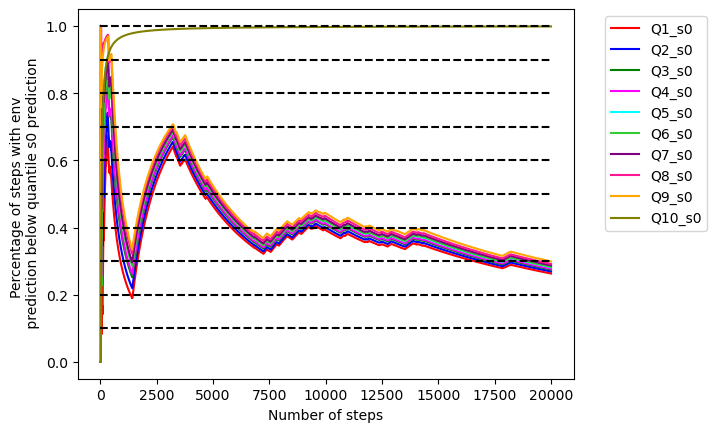

In [46]:
# s0
variable = "s0"
nb_belowq1_list_s0, nb_belowq2_list_s0, nb_belowq3_list_s0, nb_belowq4_list_s0, nb_belowq5_list_s0, nb_belowq6_list_s0, nb_belowq7_list_s0, nb_belowq8_list_s0, nb_belowq9_list_s0, nb_belowq10_list_s0 = nb_below_quantile(env_s1, quantile0_s0, quantile1_s0, quantile2_s0, quantile3_s0, quantile4_s0, quantile5_s0, quantile6_s0, quantile7_s0, quantile8_s0, quantile9_s0, quantile10_s0)
plot_nb_below_quantiles(prob, nb_belowq1_list_s0, nb_belowq2_list_s0, nb_belowq3_list_s0, nb_belowq4_list_s0, nb_belowq5_list_s0, nb_belowq6_list_s0, nb_belowq7_list_s0, nb_belowq8_list_s0, nb_belowq9_list_s0, nb_belowq10_list_s0, variable)


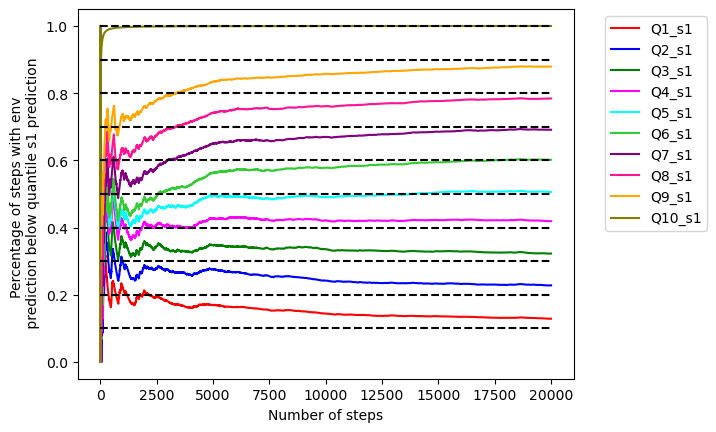

In [47]:
# s1 
variable = "s1"
nb_belowq1_list_s1, nb_belowq2_list_s1, nb_belowq3_list_s1, nb_belowq4_list_s1, nb_belowq5_list_s1, nb_belowq6_list_s1, nb_belowq7_list_s1, nb_belowq8_list_s1, nb_belowq9_list_s1, nb_belowq10_list_s1 = nb_below_quantile(env_s1, quantile0_s1, quantile1_s1, quantile2_s1, quantile3_s1, quantile4_s1, quantile5_s1, quantile6_s1, quantile7_s1, quantile8_s1, quantile9_s1, quantile10_s1)
plot_nb_below_quantiles(prob, nb_belowq1_list_s1, nb_belowq2_list_s1, nb_belowq3_list_s1, nb_belowq4_list_s1, nb_belowq5_list_s1, nb_belowq6_list_s1, nb_belowq7_list_s1, nb_belowq8_list_s1, nb_belowq9_list_s1, nb_belowq10_list_s1, variable)


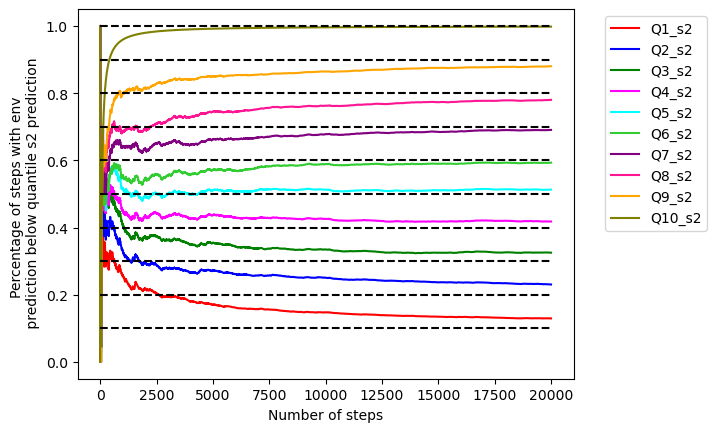

In [48]:
# s2 
variable = "s2"
nb_belowq1_list_s2, nb_belowq2_list_s2, nb_belowq3_list_s2, nb_belowq4_list_s2, nb_belowq5_list_s2, nb_belowq6_list_s2, nb_belowq7_list_s2, nb_belowq8_list_s2, nb_belowq9_list_s2, nb_belowq10_list_s2 = nb_below_quantile(env_s2, quantile0_s2, quantile1_s2, quantile2_s2, quantile3_s2, quantile4_s2, quantile5_s2, quantile6_s2, quantile7_s2, quantile8_s2, quantile9_s2, quantile10_s2)
plot_nb_below_quantiles(prob, nb_belowq1_list_s2, nb_belowq2_list_s2, nb_belowq3_list_s2, nb_belowq4_list_s2, nb_belowq5_list_s2, nb_belowq6_list_s2, nb_belowq7_list_s2, nb_belowq8_list_s2, nb_belowq9_list_s2, nb_belowq10_list_s2, variable)


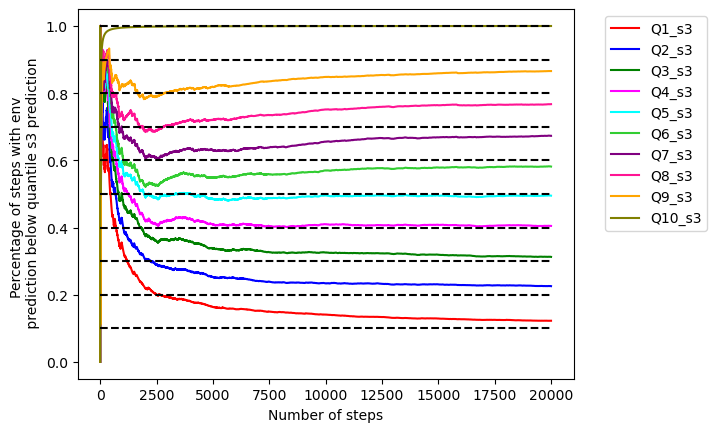

In [49]:
# s3 
variable = "s3"
nb_belowq1_list_s3, nb_belowq2_list_s3, nb_belowq3_list_s3, nb_belowq4_list_s3, nb_belowq5_list_s3, nb_belowq6_list_s3, nb_belowq7_list_s3, nb_belowq8_list_s3, nb_belowq9_list_s3, nb_belowq10_list_s3 = nb_below_quantile(env_s3, quantile0_s3, quantile1_s3, quantile2_s3, quantile3_s3, quantile4_s3, quantile5_s3, quantile6_s3, quantile7_s3, quantile8_s3, quantile9_s3, quantile10_s3)
plot_nb_below_quantiles(prob, nb_belowq1_list_s3, nb_belowq2_list_s3, nb_belowq3_list_s3, nb_belowq4_list_s3, nb_belowq5_list_s3, nb_belowq6_list_s3, nb_belowq7_list_s3, nb_belowq8_list_s3, nb_belowq9_list_s3, nb_belowq10_list_s3, variable)


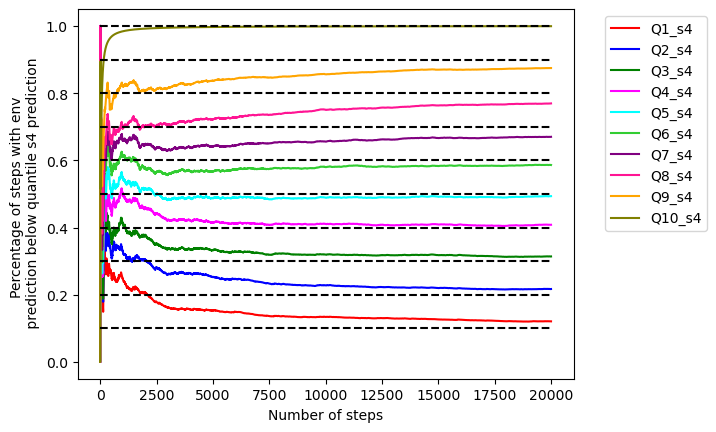

In [50]:
# s4 
variable = "s4"
nb_belowq1_list_s4, nb_belowq2_list_s4, nb_belowq3_list_s4, nb_belowq4_list_s4, nb_belowq5_list_s4, nb_belowq6_list_s4, nb_belowq7_list_s4, nb_belowq8_list_s4, nb_belowq9_list_s4, nb_belowq10_list_s4 = nb_below_quantile(env_s4, quantile0_s4, quantile1_s4, quantile2_s4, quantile3_s4, quantile4_s4, quantile5_s4, quantile6_s4, quantile7_s4, quantile8_s4, quantile9_s4, quantile10_s4)
plot_nb_below_quantiles(prob, nb_belowq1_list_s4, nb_belowq2_list_s4, nb_belowq3_list_s4, nb_belowq4_list_s4, nb_belowq5_list_s4, nb_belowq6_list_s4, nb_belowq7_list_s4, nb_belowq8_list_s4, nb_belowq9_list_s4, nb_belowq10_list_s4, variable)


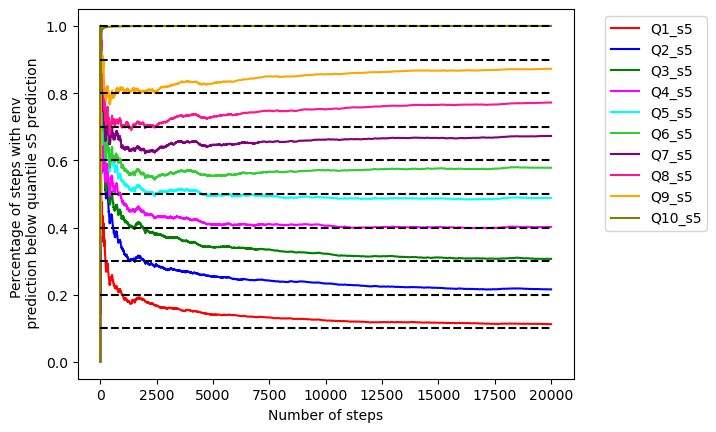

In [51]:
# s5 
variable = "s5"
nb_belowq1_list_s5, nb_belowq2_list_s5, nb_belowq3_list_s5, nb_belowq4_list_s5, nb_belowq5_list_s5, nb_belowq6_list_s5, nb_belowq7_list_s5, nb_belowq8_list_s5, nb_belowq9_list_s5, nb_belowq10_list_s5 = nb_below_quantile(env_s5, quantile0_s5, quantile1_s5, quantile2_s5, quantile3_s5, quantile4_s5, quantile5_s5, quantile6_s5, quantile7_s5, quantile8_s5, quantile9_s5, quantile10_s5)
plot_nb_below_quantiles(prob, nb_belowq1_list_s5, nb_belowq2_list_s5, nb_belowq3_list_s5, nb_belowq4_list_s5, nb_belowq5_list_s5, nb_belowq6_list_s5, nb_belowq7_list_s5, nb_belowq8_list_s5, nb_belowq9_list_s5, nb_belowq10_list_s5, variable)


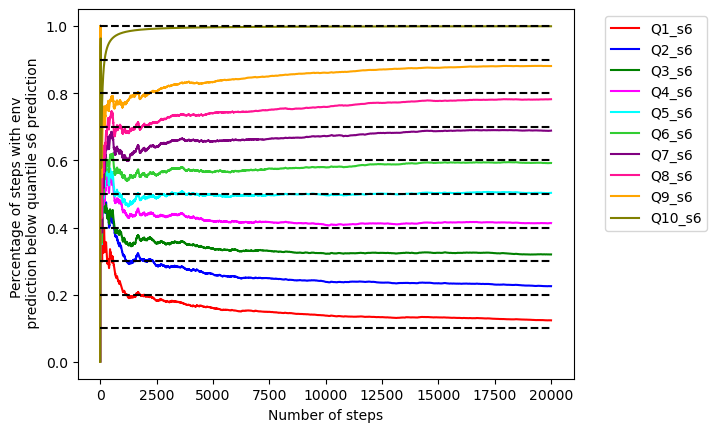

In [52]:
# s6 
variable = "s6"
nb_belowq1_list_s6, nb_belowq2_list_s6, nb_belowq3_list_s6, nb_belowq4_list_s6, nb_belowq5_list_s6, nb_belowq6_list_s6, nb_belowq7_list_s6, nb_belowq8_list_s6, nb_belowq9_list_s6, nb_belowq10_list_s6 = nb_below_quantile(env_s6, quantile0_s6, quantile1_s6, quantile2_s6, quantile3_s6, quantile4_s6, quantile5_s6, quantile6_s6, quantile7_s6, quantile8_s6, quantile9_s6, quantile10_s6)
plot_nb_below_quantiles(prob, nb_belowq1_list_s6, nb_belowq2_list_s6, nb_belowq3_list_s6, nb_belowq4_list_s6, nb_belowq5_list_s6, nb_belowq6_list_s6, nb_belowq7_list_s6, nb_belowq8_list_s6, nb_belowq9_list_s6, nb_belowq10_list_s6, variable)


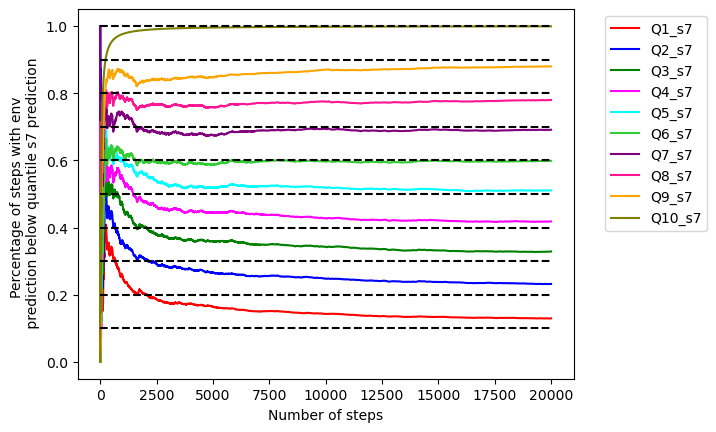

In [53]:
# s7 
variable = "s7"
nb_belowq1_list_s7, nb_belowq2_list_s7, nb_belowq3_list_s7, nb_belowq4_list_s7, nb_belowq5_list_s7, nb_belowq6_list_s7, nb_belowq7_list_s7, nb_belowq8_list_s7, nb_belowq9_list_s7, nb_belowq10_list_s7 = nb_below_quantile(env_s7, quantile0_s7, quantile1_s7, quantile2_s7, quantile3_s7, quantile4_s7, quantile5_s7, quantile6_s7, quantile7_s7, quantile8_s7, quantile9_s7, quantile10_s7)
plot_nb_below_quantiles(prob, nb_belowq1_list_s7, nb_belowq2_list_s7, nb_belowq3_list_s7, nb_belowq4_list_s7, nb_belowq5_list_s7, nb_belowq6_list_s7, nb_belowq7_list_s7, nb_belowq8_list_s7, nb_belowq9_list_s7, nb_belowq10_list_s7, variable)


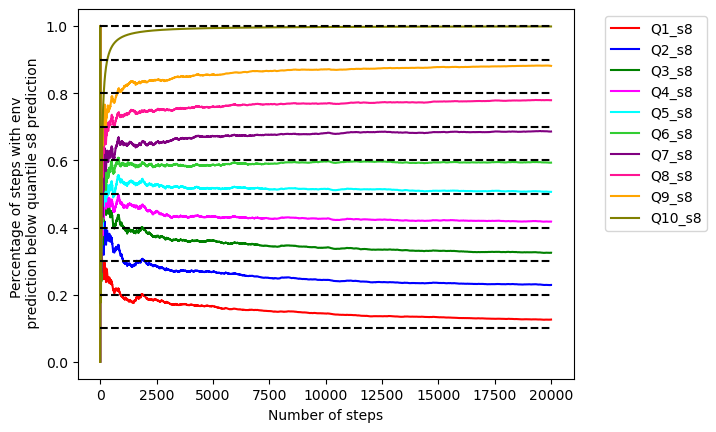

In [54]:
# s8 
variable = "s8"
nb_belowq1_list_s8, nb_belowq2_list_s8, nb_belowq3_list_s8, nb_belowq4_list_s8, nb_belowq5_list_s8, nb_belowq6_list_s8, nb_belowq7_list_s8, nb_belowq8_list_s8, nb_belowq9_list_s8, nb_belowq10_list_s8 = nb_below_quantile(env_s8, quantile0_s8, quantile1_s8, quantile2_s8, quantile3_s8, quantile4_s8, quantile5_s8, quantile6_s8, quantile7_s8, quantile8_s8, quantile9_s8, quantile10_s8)
plot_nb_below_quantiles(prob, nb_belowq1_list_s8, nb_belowq2_list_s8, nb_belowq3_list_s8, nb_belowq4_list_s8, nb_belowq5_list_s8, nb_belowq6_list_s8, nb_belowq7_list_s8, nb_belowq8_list_s8, nb_belowq9_list_s8, nb_belowq10_list_s8, variable)


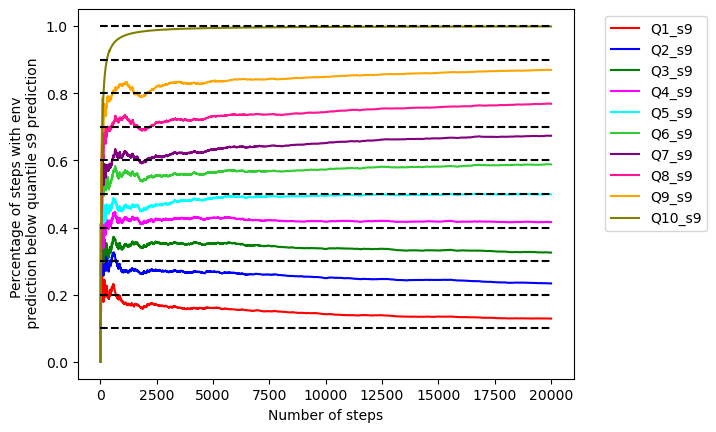

In [55]:
# s9 
variable = "s9"
nb_belowq1_list_s9, nb_belowq2_list_s9, nb_belowq3_list_s9, nb_belowq4_list_s9, nb_belowq5_list_s9, nb_belowq6_list_s9, nb_belowq7_list_s9, nb_belowq8_list_s9, nb_belowq9_list_s9, nb_belowq10_list_s9 = nb_below_quantile(env_s9, quantile0_s9, quantile1_s9, quantile2_s9, quantile3_s9, quantile4_s9, quantile5_s9, quantile6_s9, quantile7_s9, quantile8_s9, quantile9_s9, quantile10_s9)
plot_nb_below_quantiles(prob, nb_belowq1_list_s9, nb_belowq2_list_s9, nb_belowq3_list_s9, nb_belowq4_list_s9, nb_belowq5_list_s9, nb_belowq6_list_s9, nb_belowq7_list_s9, nb_belowq8_list_s9, nb_belowq9_list_s9, nb_belowq10_list_s9, variable)


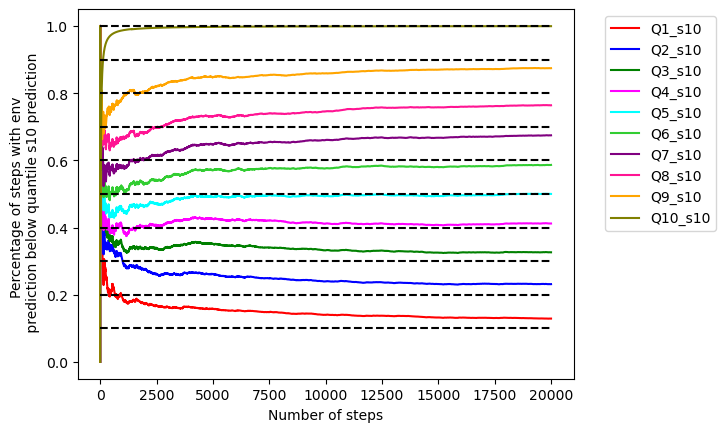

In [56]:
# s10 
variable = "s10"
nb_belowq1_list_s10, nb_belowq2_list_s10, nb_belowq3_list_s10, nb_belowq4_list_s10, nb_belowq5_list_s10, nb_belowq6_list_s10, nb_belowq7_list_s10, nb_belowq8_list_s10, nb_belowq9_list_s10, nb_belowq10_list_s10 = nb_below_quantile(env_s10, quantile0_s10, quantile1_s10, quantile2_s10, quantile3_s10, quantile4_s10, quantile5_s10, quantile6_s10, quantile7_s10, quantile8_s10, quantile9_s10, quantile10_s10)
plot_nb_below_quantiles(prob, nb_belowq1_list_s10, nb_belowq2_list_s10, nb_belowq3_list_s10, nb_belowq4_list_s10, nb_belowq5_list_s10, nb_belowq6_list_s10, nb_belowq7_list_s10, nb_belowq8_list_s10, nb_belowq9_list_s10, nb_belowq10_list_s10, variable)


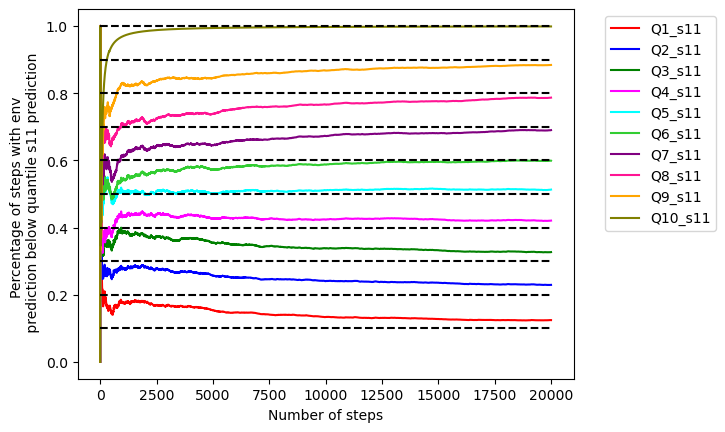

In [57]:
# s11 
variable = "s11"
nb_belowq1_list_s11, nb_belowq2_list_s11, nb_belowq3_list_s11, nb_belowq4_list_s11, nb_belowq5_list_s11, nb_belowq6_list_s11, nb_belowq7_list_s11, nb_belowq8_list_s11, nb_belowq9_list_s11, nb_belowq10_list_s11 = nb_below_quantile(env_s11, quantile0_s11, quantile1_s11, quantile2_s11, quantile3_s11, quantile4_s11, quantile5_s11, quantile6_s11, quantile7_s11, quantile8_s11, quantile9_s11, quantile10_s11)
plot_nb_below_quantiles(prob, nb_belowq1_list_s11, nb_belowq2_list_s11, nb_belowq3_list_s11, nb_belowq4_list_s11, nb_belowq5_list_s11, nb_belowq6_list_s11, nb_belowq7_list_s11, nb_belowq8_list_s11, nb_belowq9_list_s11, nb_belowq10_list_s11, variable)


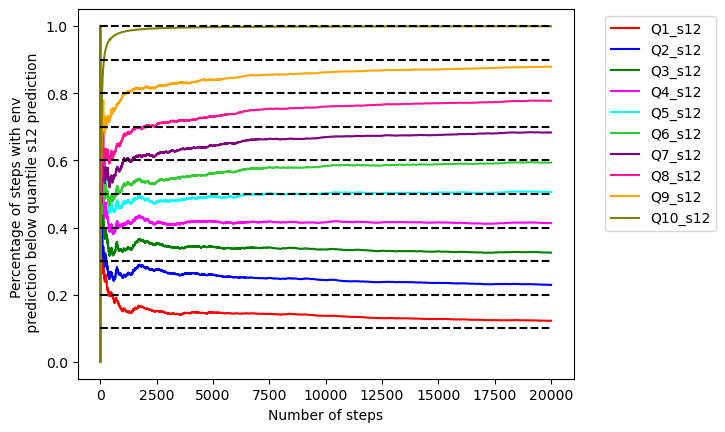

In [58]:
# s12 
variable = "s12"
nb_belowq1_list_s12, nb_belowq2_list_s12, nb_belowq3_list_s12, nb_belowq4_list_s12, nb_belowq5_list_s12, nb_belowq6_list_s12, nb_belowq7_list_s12, nb_belowq8_list_s12, nb_belowq9_list_s12, nb_belowq10_list_s12 = nb_below_quantile(env_s12, quantile0_s12, quantile1_s12, quantile2_s12, quantile3_s12, quantile4_s12, quantile5_s12, quantile6_s12, quantile7_s12, quantile8_s12, quantile9_s12, quantile10_s12)
plot_nb_below_quantiles(prob, nb_belowq1_list_s12, nb_belowq2_list_s12, nb_belowq3_list_s12, nb_belowq4_list_s12, nb_belowq5_list_s12, nb_belowq6_list_s12, nb_belowq7_list_s12, nb_belowq8_list_s12, nb_belowq9_list_s12, nb_belowq10_list_s12, variable)


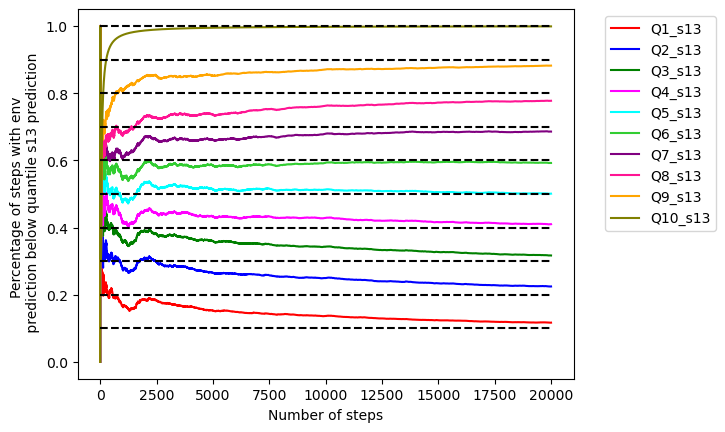

In [59]:
# s13 
variable = "s13"
nb_belowq1_list_s13, nb_belowq2_list_s13, nb_belowq3_list_s13, nb_belowq4_list_s13, nb_belowq5_list_s13, nb_belowq6_list_s13, nb_belowq7_list_s13, nb_belowq8_list_s13, nb_belowq9_list_s13, nb_belowq10_list_s13 = nb_below_quantile(env_s13, quantile0_s13, quantile1_s13, quantile2_s13, quantile3_s13, quantile4_s13, quantile5_s13, quantile6_s13, quantile7_s13, quantile8_s13, quantile9_s13, quantile10_s13)
plot_nb_below_quantiles(prob, nb_belowq1_list_s13, nb_belowq2_list_s13, nb_belowq3_list_s13, nb_belowq4_list_s13, nb_belowq5_list_s13, nb_belowq6_list_s13, nb_belowq7_list_s13, nb_belowq8_list_s13, nb_belowq9_list_s13, nb_belowq10_list_s13, variable)


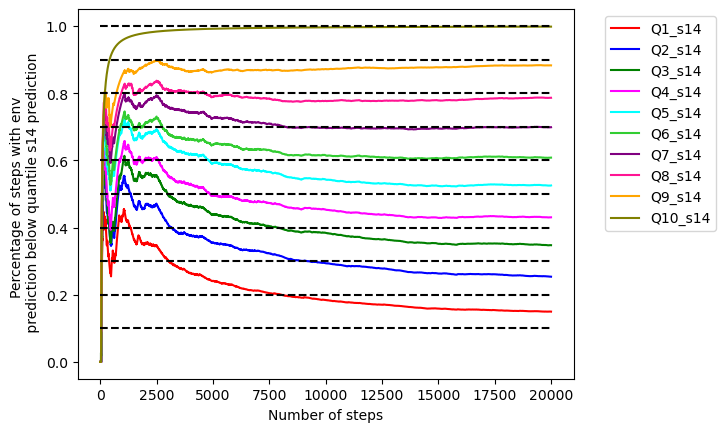

In [60]:
# s14 
variable = "s14"
nb_belowq1_list_s14, nb_belowq2_list_s14, nb_belowq3_list_s14, nb_belowq4_list_s14, nb_belowq5_list_s14, nb_belowq6_list_s14, nb_belowq7_list_s14, nb_belowq8_list_s14, nb_belowq9_list_s14, nb_belowq10_list_s14 = nb_below_quantile(env_s14, quantile0_s14, quantile1_s14, quantile2_s14, quantile3_s14, quantile4_s14, quantile5_s14, quantile6_s14, quantile7_s14, quantile8_s14, quantile9_s14, quantile10_s14)
plot_nb_below_quantiles(prob, nb_belowq1_list_s14, nb_belowq2_list_s14, nb_belowq3_list_s14, nb_belowq4_list_s14, nb_belowq5_list_s14, nb_belowq6_list_s14, nb_belowq7_list_s14, nb_belowq8_list_s14, nb_belowq9_list_s14, nb_belowq10_list_s14, variable)


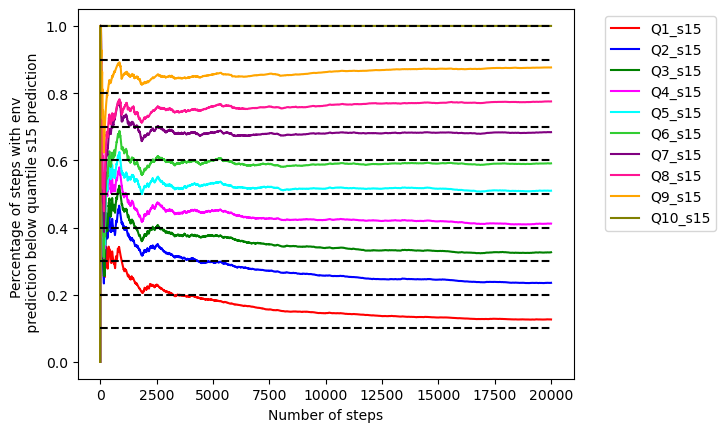

In [61]:
# s15 
variable = "s15"
nb_belowq1_list_s15, nb_belowq2_list_s15, nb_belowq3_list_s15, nb_belowq4_list_s15, nb_belowq5_list_s15, nb_belowq6_list_s15, nb_belowq7_list_s15, nb_belowq8_list_s15, nb_belowq9_list_s15, nb_belowq10_list_s15 = nb_below_quantile(env_s15, quantile0_s15, quantile1_s15, quantile2_s15, quantile3_s15, quantile4_s15, quantile5_s15, quantile6_s15, quantile7_s15, quantile8_s15, quantile9_s15, quantile10_s15)
plot_nb_below_quantiles(prob, nb_belowq1_list_s15, nb_belowq2_list_s15, nb_belowq3_list_s15, nb_belowq4_list_s15, nb_belowq5_list_s15, nb_belowq6_list_s15, nb_belowq7_list_s15, nb_belowq8_list_s15, nb_belowq9_list_s15, nb_belowq10_list_s15, variable)


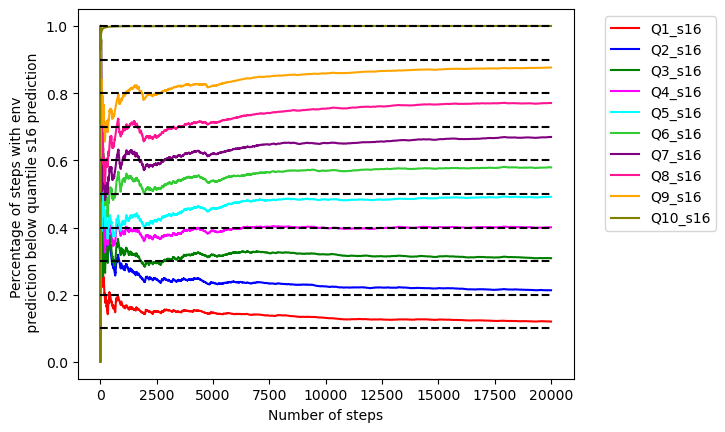

In [62]:
# s16 
variable = "s16"
nb_belowq1_list_s16, nb_belowq2_list_s16, nb_belowq3_list_s16, nb_belowq4_list_s16, nb_belowq5_list_s16, nb_belowq6_list_s16, nb_belowq7_list_s16, nb_belowq8_list_s16, nb_belowq9_list_s16, nb_belowq10_list_s16 = nb_below_quantile(env_s16, quantile0_s16, quantile1_s16, quantile2_s16, quantile3_s16, quantile4_s16, quantile5_s16, quantile6_s16, quantile7_s16, quantile8_s16, quantile9_s16, quantile10_s16)
plot_nb_below_quantiles(prob, nb_belowq1_list_s16, nb_belowq2_list_s16, nb_belowq3_list_s16, nb_belowq4_list_s16, nb_belowq5_list_s16, nb_belowq6_list_s16, nb_belowq7_list_s16, nb_belowq8_list_s16, nb_belowq9_list_s16, nb_belowq10_list_s16, variable)


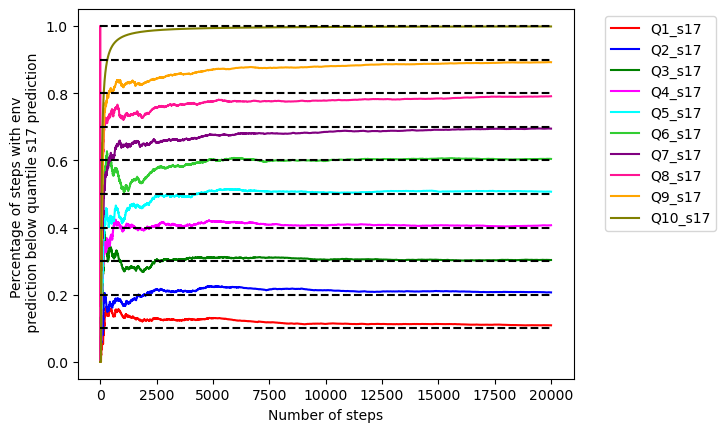

In [63]:
# s17 
variable = "s17"
nb_belowq1_list_s17, nb_belowq2_list_s17, nb_belowq3_list_s17, nb_belowq4_list_s17, nb_belowq5_list_s17, nb_belowq6_list_s17, nb_belowq7_list_s17, nb_belowq8_list_s17, nb_belowq9_list_s17, nb_belowq10_list_s17 = nb_below_quantile(env_s17, quantile0_s17, quantile1_s17, quantile2_s17, quantile3_s17, quantile4_s17, quantile5_s17, quantile6_s17, quantile7_s17, quantile8_s17, quantile9_s17, quantile10_s17)
plot_nb_below_quantiles(prob, nb_belowq1_list_s17, nb_belowq2_list_s17, nb_belowq3_list_s17, nb_belowq4_list_s17, nb_belowq5_list_s17, nb_belowq6_list_s17, nb_belowq7_list_s17, nb_belowq8_list_s17, nb_belowq9_list_s17, nb_belowq10_list_s17, variable)


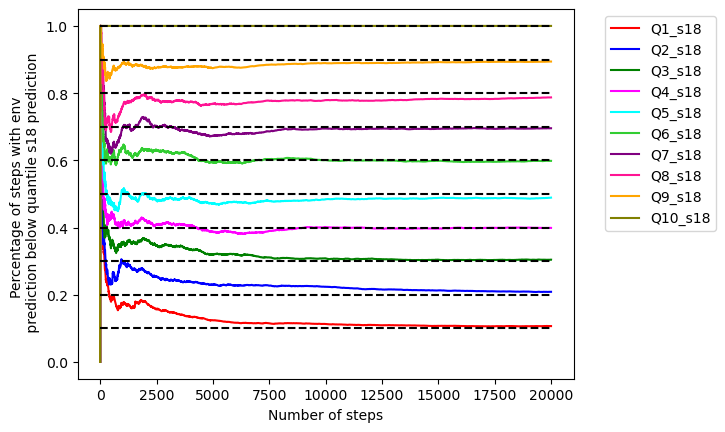

In [64]:
# s18
variable = "s18"
nb_belowq1_list_s18, nb_belowq2_list_s18, nb_belowq3_list_s18, nb_belowq4_list_s18, nb_belowq5_list_s18, nb_belowq6_list_s18, nb_belowq7_list_s18, nb_belowq8_list_s18, nb_belowq9_list_s18, nb_belowq10_list_s18 = nb_below_quantile(env_s18, quantile0_s18, quantile1_s18, quantile2_s18, quantile3_s18, quantile4_s18, quantile5_s18, quantile6_s18, quantile7_s18, quantile8_s18, quantile9_s18, quantile10_s18)
plot_nb_below_quantiles(prob, nb_belowq1_list_s18, nb_belowq2_list_s18, nb_belowq3_list_s18, nb_belowq4_list_s18, nb_belowq5_list_s18, nb_belowq6_list_s18, nb_belowq7_list_s18, nb_belowq8_list_s18, nb_belowq9_list_s18, nb_belowq10_list_s18, variable)


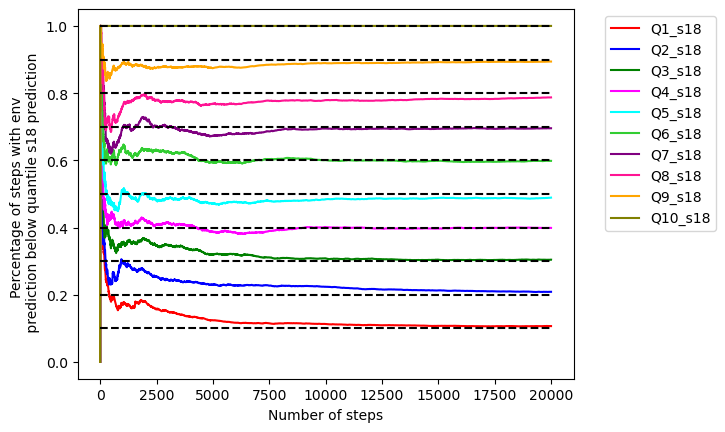

In [65]:
# s18
variable = "s18"
nb_belowq1_list_s18, nb_belowq2_list_s18, nb_belowq3_list_s18, nb_belowq4_list_s18, nb_belowq5_list_s18, nb_belowq6_list_s18, nb_belowq7_list_s18, nb_belowq8_list_s18, nb_belowq9_list_s18, nb_belowq10_list_s18 = nb_below_quantile(env_s18, quantile0_s18, quantile1_s18, quantile2_s18, quantile3_s18, quantile4_s18, quantile5_s18, quantile6_s18, quantile7_s18, quantile8_s18, quantile9_s18, quantile10_s18)
plot_nb_below_quantiles(prob, nb_belowq1_list_s18, nb_belowq2_list_s18, nb_belowq3_list_s18, nb_belowq4_list_s18, nb_belowq5_list_s18, nb_belowq6_list_s18, nb_belowq7_list_s18, nb_belowq8_list_s18, nb_belowq9_list_s18, nb_belowq10_list_s18, variable)


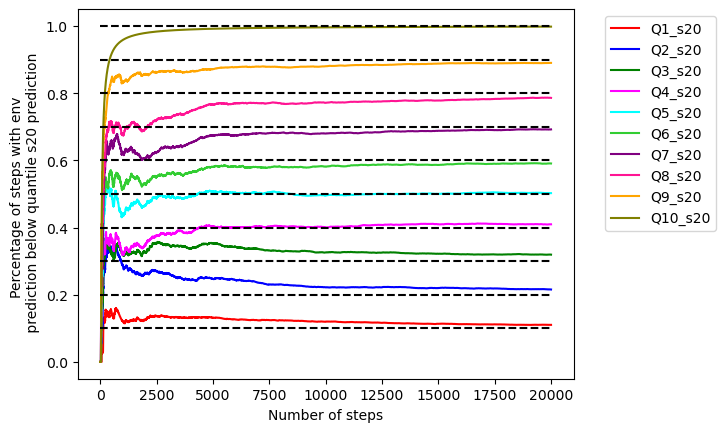

In [66]:
# s20
variable = "s20"
nb_belowq1_list_s20, nb_belowq2_list_s20, nb_belowq3_list_s20, nb_belowq4_list_s20, nb_belowq5_list_s20, nb_belowq6_list_s20, nb_belowq7_list_s20, nb_belowq8_list_s20, nb_belowq9_list_s20, nb_belowq10_list_s20 = nb_below_quantile(env_s20, quantile0_s20, quantile1_s20, quantile2_s20, quantile3_s20, quantile4_s20, quantile5_s20, quantile6_s20, quantile7_s20, quantile8_s20, quantile9_s20, quantile10_s20)
plot_nb_below_quantiles(prob, nb_belowq1_list_s20, nb_belowq2_list_s20, nb_belowq3_list_s20, nb_belowq4_list_s20, nb_belowq5_list_s20, nb_belowq6_list_s20, nb_belowq7_list_s20, nb_belowq8_list_s20, nb_belowq9_list_s20, nb_belowq10_list_s20, variable)


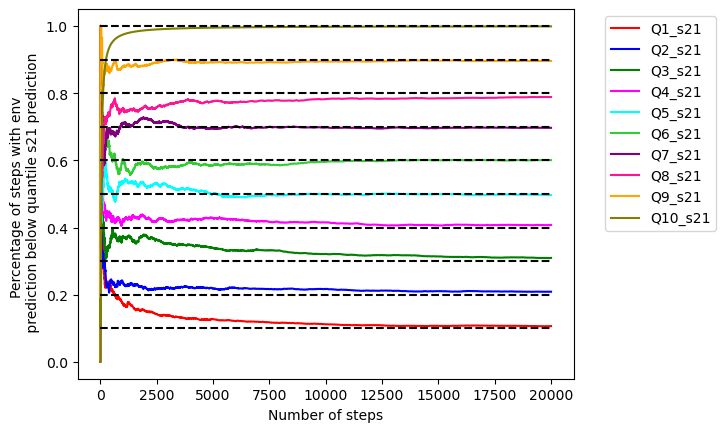

In [67]:
# s21
variable = "s21"
nb_belowq1_list_s21, nb_belowq2_list_s21, nb_belowq3_list_s21, nb_belowq4_list_s21, nb_belowq5_list_s21, nb_belowq6_list_s21, nb_belowq7_list_s21, nb_belowq8_list_s21, nb_belowq9_list_s21, nb_belowq10_list_s21 = nb_below_quantile(env_s21, quantile0_s21, quantile1_s21, quantile2_s21, quantile3_s21, quantile4_s21, quantile5_s21, quantile6_s21, quantile7_s21, quantile8_s21, quantile9_s21, quantile10_s21)
plot_nb_below_quantiles(prob, nb_belowq1_list_s21, nb_belowq2_list_s21, nb_belowq3_list_s21, nb_belowq4_list_s21, nb_belowq5_list_s21, nb_belowq6_list_s21, nb_belowq7_list_s21, nb_belowq8_list_s21, nb_belowq9_list_s21, nb_belowq10_list_s21, variable)


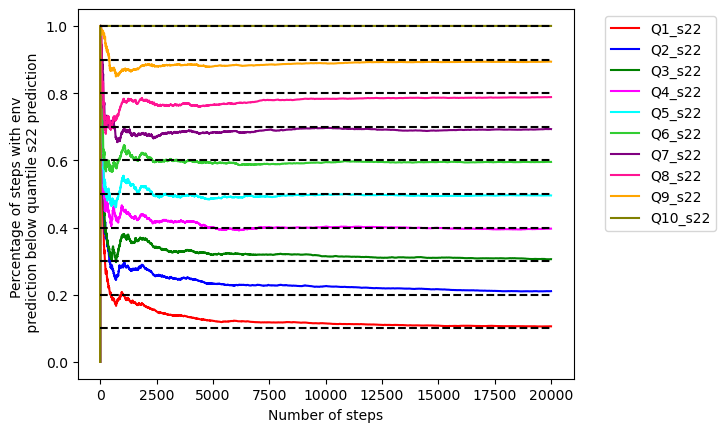

In [68]:
# s22
variable = "s22"
nb_belowq1_list_s22, nb_belowq2_list_s22, nb_belowq3_list_s22, nb_belowq4_list_s22, nb_belowq5_list_s22, nb_belowq6_list_s22, nb_belowq7_list_s22, nb_belowq8_list_s22, nb_belowq9_list_s22, nb_belowq10_list_s22 = nb_below_quantile(env_s22, quantile0_s22, quantile1_s22, quantile2_s22, quantile3_s22, quantile4_s22, quantile5_s22, quantile6_s22, quantile7_s22, quantile8_s22, quantile9_s22, quantile10_s22)
plot_nb_below_quantiles(prob, nb_belowq1_list_s22, nb_belowq2_list_s22, nb_belowq3_list_s22, nb_belowq4_list_s22, nb_belowq5_list_s22, nb_belowq6_list_s22, nb_belowq7_list_s22, nb_belowq8_list_s22, nb_belowq9_list_s22, nb_belowq10_list_s22, variable)
